In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

In [2]:
def SignalFileLoop(fileList):
    for i in range(len(fileList)):
        fileList[i]["signal"] = 1
    print(mass_points[i])
    fileList[i]

In [3]:
def SignalPlotLoop(signalFileList, bkgFileList):
    #overlay signal and background for variables list
    for i in range(len(signalFileList)):
        for var in signalFileList[i].columns:
            print(mass_points[i])
            print(var)
            plt.figure()
            plt.hist(signalFileList[i][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
            plt.hist(bkgFileList[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
            plt.legend(loc='upper right')
            plt.show()

In [4]:
def DefineTrainTest(fileSig, fileBkg):
    df_train = pd.concat([fileBkg.iloc[::2],fileSig.iloc[1::2]])
    df_test =  pd.concat([fileBkg.iloc[1::2],fileSig.iloc[::2]])
#    df_train = pd.concat([fileSig.iloc[:n_sig],fileBkg.iloc[:n_bkg]])
#    df_test =  pd.concat([fileSig.iloc[n_sig:],fileBkg.iloc[n_bkg:]])

    #shuffle rows
    df_train = sklearn.utils.shuffle(df_train)
    df_test = sklearn.utils.shuffle(df_test)

    #Reindex [0:n]
    x_train = df_train[variable].reset_index(drop=True)
    y_train = df_train["signal"].reset_index(drop=True)

    x_test = df_test[variable].reset_index(drop=True)
    y_test = df_test["signal"].reset_index(drop=True)
    return df_train, df_test, x_train, y_train, x_test, y_test

In [5]:
def DefineModel(trainFile):
    #Defining sequential or linearly stack layers as model
    #Adding 5 dense layers to network
    model = Sequential()
    model.add(Dense(22, input_dim=trainFile.shape[1], kernel_initializer="random_uniform", activation='tanh'))
    model.add(Dense(36, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(72, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(36, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))
    return model

In [6]:
def NetworkLoop(xTrainFile, yTrainFile, xTestFile, yTestFile, model, labels, epochs):
    print ('\n', labels, '\n')
    history = model.fit(xTrainFile.values,yTrainFile.values,validation_data=(xTestFile.values,yTestFile.values), epochs=epochs, batch_size=128)
    return history

In [7]:
'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

#sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag.csv"
sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag-extended-dataset.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600-allvar-btag-extended-dataset.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700-allvar-btag-extended-dataset.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800-allvar-btag-extended-dataset.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000-allvar-btag-extended-dataset.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-allvar-btag-extended-dataset.csv"


In [8]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#3 leptons or more, first highest pt lepton pt requirement > 30 GeV, 
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
#add DR, check lepton pt for bkg

In [9]:
#read signal files
#for sig in sig_file:
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [10]:
#tagging signal as 1
SignalFileLoop(df_sig)

1000GeV


In [11]:
sig_file = [sig500_file, sig600_file, sig700_file, sig800_file, sig1000_file]
array_sig = ['df_array500','df_array600','df_array700','df_array800','df_array1000']
def Make2DArray(cvsFile):
    array = np.genfromtxt(cvsFile, delimiter=",")
    return array
for i in range(len(array_sig)):
    array_sig[i] = Make2DArray(sig_file[i])
    print (array_sig[i], len(array_sig[i][:]))

[[           nan            nan            nan ...            nan
             nan            nan]
 [0.00000000e+00 4.47056349e+04 8.08104153e+03 ... 1.21655989e+05
  3.03999791e+04 1.60358964e+00]
 [1.00000000e+00 5.91942730e+04 2.54105267e+04 ... 2.38241231e+05
  4.88902699e+04 1.33773477e+00]
 ...
 [8.80550000e+04 3.05711425e+04 2.22836969e+04 ... 2.44098984e+05
  3.92246072e+04 2.18000064e+00]
 [8.80560000e+04 7.89046780e+04 6.96986162e+04 ... 4.95597799e+05
  7.59299048e+04 3.77253117e+00]
 [8.80570000e+04 4.98886702e+04 4.38485059e+03 ... 2.16212757e+05
  3.35306380e+04 2.14071418e+00]] 88059
[[           nan            nan            nan ...            nan
             nan            nan]
 [0.00000000e+00 2.23180442e+04 1.43100400e+04 ... 2.21993271e+05
  3.38769018e+04 2.43459240e+00]
 [1.00000000e+00 5.90286436e+04 1.79354512e+04 ... 4.68061947e+05
  4.53842953e+04 2.57483839e+00]
 ...
 [8.81670000e+04 3.50970963e+04 2.53647828e+04 ... 3.79553868e+05
  2.27090051e+04 1.3223826

In [12]:
print(mass_points[0])
df_sig[0]

500GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0       44705.634885   8081.041525   3119.727681     0.426680     1.534157   
1       59194.273039  25410.526656   4806.871481     1.525033     1.955397   
2       38001.242798  30504.076713   3625.299762    -0.057152     0.798901   
3       57506.004791  28250.213123  12606.214887    -1.416398     0.339540   
4       22739.754670  20377.323404  14471.842793    -0.275140    -0.936719   
...              ...           ...           ...          ...          ...   
88053   75172.369425  13975.694430  13398.533885    -1.593534    -0.123382   
88054  160450.633377  79009.882260  32065.381685    -0.514354     1.338118   
88055   30571.142534  22283.696925  13152.824057    -0.122290     0.343163   
88056   78904.677984  69698.616214   7355.072290     0.458423    -2.108039   
88057   49888.670170   4384.850594   1679.591047     0.834769    -0.870733   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0         2.653591     2.834563     1.674824    -3.090351   44745.013220  ...   
1        -1.802017    -1.339392    -0.072773    -2.637401   64248.205243  ...   
2        -0.775093     2.336460     2.664271    -0.573252  199036.512468  ...   
3        -0.875545    -0.617817     0.165278    -2.817043  182431.589930  ...   
4         2.282476    -2.361912    -0.817098    -0.567445  282579.719573  ...   
...            ...          ...          ...          ...            ...  ...   
88053    -1.610457     2.016968    -2.662107    -0.544156  189238.723185  ...   
88054     0.774256     3.015526     0.419003     0.969865  116725.630721  ...   
88055    -1.139316    -0.821925     1.929415     1.106302  167460.504407  ...   
88056     0.105117     2.879129    -3.081036    -0.025887  166740.050891  ...   
88057     2.153379     0.921635     2.215436    -0.451976  140008.971850  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  13              11               1              -1   
1                  13              13              -1               1   
2                  11              11              -1               1   
3                  13              11               1               1   
4                  13              13              -1               1   
...               ...             ...             ...             ...   
88053              13              13               1               1   
88054              11              11              -1               1   
88055              13              11              -1               1   
88056              11              11               1              -1   
88057              13              11               1              -1   

       lepton3_charge     visible_pt  transverse_mass     dilep_mass  \
0                  -1   51246.731103    121655.988593   30399.979106   
1                  -1   70868.573903    238241.230955   48890.269873   
2                   1   63987.128113    281797.295634   32032.830261   
3                  -1   70789.164916    336719.372136   50194.478365   
4                  -1   39891.888296    405681.610964   33362.251507   
...               ...            ...              ...            ...   
88053              -1   63847.055706    375443.017079   60821.265169   
88054              -1  104630.743821    495348.120762  323253.577324   
88055               1   21478.578373    244098.984218   39224.607165   
88056               1  139349.759702    495597.799025   75929.904794   
88057              -1   51481.054328    216212.757288   33530.637980   

       dilep_DR  signal  
0      1.603590       1  
1      1.337735       1  
2      0.916671       1  
3      2.264755       1  
4      1.680518       1  
...         ...     ...  
88053  2.561180       1  
88054  3.189606       1  
88055  2.180001       1  
88056  3.772531       1  
88057  2.140714       1  

[88058 rows x 22 columns]

In [13]:
print(mass_points[1])
df_sig[1]

600GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0       22318.044220  14310.040045   4658.476296     1.036819     0.722535   
1       59028.643598  17935.451159  15108.260644     1.174103     1.264971   
2       86196.905068  21779.714004   4096.401723    -0.215927     0.052056   
3       54358.706687  23593.755362  10471.066766     0.415002    -0.428775   
4       68001.624722  54636.763485  10391.163230     0.728222     0.879271   
...              ...           ...           ...          ...          ...   
88165  162284.646989  16070.725617   9616.940254    -0.235090    -0.148933   
88166   70456.484130  27813.380674  11818.475919    -0.562098    -0.128428   
88167   35097.096259  25364.782790   9392.682282    -1.197320    -0.441305   
88168  169196.811571  17465.828877  12451.827289     0.593068    -0.174966   
88169   59690.738386  18508.200733  14030.767996     0.048140     0.781298   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0        -0.735931     2.747910     0.333689    -2.390910  165123.760865  ...   
1         3.259703    -2.309815     1.165126     2.793265  226612.649741  ...   
2         1.310662     2.340225    -0.810919     3.082652  277445.523971  ...   
3        -0.335304     3.139138    -0.990181     2.768339  191194.944956  ...   
4         2.230554    -0.419446     2.095013     2.342163   50636.252205  ...   
...            ...          ...          ...          ...            ...  ...   
88165    -0.452283    -2.011764    -1.857375     0.413885  467383.248556  ...   
88166    -0.178493     1.657116    -1.720592    -0.337031  114031.001211  ...   
88167    -0.741420    -0.830360     2.833079     0.410951  282943.360173  ...   
88168     1.734107     2.637982    -0.164499     2.599766  213882.472648  ...   
88169     0.404839     0.786640     2.312614     0.050374  113887.833999  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  11              11              -1               1   
1                  13              13              -1              -1   
2                  11              11              -1              -1   
3                  11              13               1              -1   
4                  13              13              -1              -1   
...               ...             ...             ...             ...   
88165              11              11              -1               1   
88166              11              11               1               1   
88167              13              11              -1               1   
88168              11              11              -1              -1   
88169              13              11               1              -1   

       lepton3_charge     visible_pt  transverse_mass    dilep_mass  dilep_DR  \
0                   1   14545.993616    221993.271243  33876.901765  2.434592   
1                   1   51784.822835    468061.947286  45384.295348  2.574838   
2                   1   67502.237444    395475.748539  34372.765891  1.697549   
3                  -1   53543.320267    287016.487876  20327.351019  0.836929   
4                   1   38589.178664    212201.610984  68146.923396  3.143802   
...               ...            ...              ...           ...       ...   
88165               1  171134.026161    659478.584666   9023.081448  0.176802   
88166              -1   38795.148152    231149.658917  23148.931882  1.384467   
88167               1   16578.590411    379553.868296  22709.005108  1.322383   
88168               1  165287.948289    447173.342266  55289.258222  1.141678   
88169              -1   71493.930667    211861.107970  23271.299641  0.818120   

       signal  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
88165       1  
88166       1  
88167       1  
88168       1  
88169       1  

[88170 rows x 22 columns]

In [14]:
print(mass_points[2])
df_sig[2]

700GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0       45493.938590  12080.284537   3577.513056    -0.862445    -0.176137   
1      174131.687646  12357.718321  11889.952066    -0.215031    -0.524551   
2       52499.270638   7443.094084   6929.486523     2.116298     1.934332   
3       19690.464932  16040.837411  10736.571887    -1.250370    -1.144872   
4       25865.133228  12085.563943   5603.908026    -1.047793     0.241777   
...              ...           ...           ...          ...          ...   
88280   44087.257746   5730.848768   3502.818706     1.368433     2.138056   
88281   21588.911975  17310.112595  11370.238272    -1.844860    -0.855437   
88282  143640.600512  68024.945329  13469.006161     0.457860     1.150763   
88283   76149.656231   9966.631164   9799.093030     0.873434     0.140576   
88284   20078.313195   8174.754204   4509.090303    -1.076810    -1.925095   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0         0.697423    -2.001729    -0.595385     1.497382   25844.926501  ...   
1         1.870509     2.882572     2.683232    -0.471479  111105.771038  ...   
2        -1.059858    -0.627302     0.778325    -0.589617  205304.670148  ...   
3        -1.578551     2.479783     1.133501    -1.118742   54176.615682  ...   
4         0.577336     0.425636     2.968071    -0.248229  121204.362922  ...   
...            ...          ...          ...          ...            ...  ...   
88280    -1.586765    -0.297937     2.980955     0.187869   80897.152986  ...   
88281    -0.074826     0.049644    -0.946804     2.220498  128746.774476  ...   
88282     1.075449     2.796763    -2.929494     0.148407  172924.350328  ...   
88283     1.209756     2.498233     0.035759     2.866364  289747.528275  ...   
88284    -0.191342    -1.281944     2.380161    -0.949469   52312.132915  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  13              11              -1               1   
1                  11              13              -1               1   
2                  13              11               1              -1   
3                  13              13               1              -1   
4                  13              13              -1              -1   
...               ...             ...             ...             ...   
88280              11              11               1              -1   
88281              13              13              -1               1   
88282              11              11              -1              -1   
88283              13              13              -1              -1   
88284              13              13              -1               1   

       lepton3_charge     visible_pt  transverse_mass    dilep_mass  dilep_DR  \
0                  -1   45391.111791     96657.307913  34474.323867  1.564871   
1                   1  174622.090157    342816.065268  17118.179835  0.368156   
2                  -1   61122.316855    402146.964096  25809.082265  1.417357   
3                   1   17450.553674    123008.796651  24379.646238  2.293616   
4                   1   20533.697336    179754.811426  23201.228344  1.759300   
...               ...            ...              ...           ...       ...   
88280              -1   41516.605609    182631.275370  34103.716860  3.101306   
88281              -1   25106.252472    218562.815324  30221.677579  3.212178   
88282               1  191816.640528    435587.443379  60550.785735  3.078822   
88283               1   77585.098272    414783.718548  13611.806820  0.498631   
88284               1   17442.285956    105206.420143  27174.909082  2.754932   

       signal  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
88280       1  
88281       1  
88282       1  
88283       1  
88284       1  

[88285 rows x 22 columns]

In [15]:
print(mass_points[3])
df_sig[3]

800GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0       73777.691824   7066.997943   4919.152333    -0.762530     0.271985   
1      167327.241254  33658.413905  14596.303145     0.061915     0.878053   
2      244301.311903  48264.123317  11884.297063     0.280517     0.606144   
3       76271.553737  18469.618137   9876.865892     0.155625     0.372892   
4       81936.096232  21490.716626  12587.222707     0.173132     0.608238   
...              ...           ...           ...          ...          ...   
88485  129592.788560  87234.679273  37886.447191    -0.811665    -0.108649   
88486   31665.833229   9558.182885   3437.614269     1.063953    -0.330531   
88487   65600.991400  13306.206943   2875.296457     1.810396     1.344261   
88488  184261.169205  38713.305344  13611.233046    -1.330700    -2.263691   
88489   30164.115148   6178.407149   1482.614641    -0.041088     1.072495   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0         0.178912    -0.190853    -2.989611     0.277136  174652.894502  ...   
1         0.848173    -0.828828    -0.067047     1.922855  110261.893545  ...   
2         0.724651     2.625407     1.184319     2.209881  808988.170963  ...   
3         0.715019    -2.924078    -0.057259     0.368213   87528.684092  ...   
4         0.995153     1.285271    -1.043484     0.871175   43690.727853  ...   
...            ...          ...          ...          ...            ...  ...   
88485    -1.356553     1.359052     2.874493    -0.627393  339889.254850  ...   
88486     1.686179    -2.798974    -0.620947    -1.390804  146518.083016  ...   
88487    -0.390150     2.574365     2.887536    -0.851832  103616.317867  ...   
88488    -1.749972    -0.917579     2.843380    -1.462120  133503.437475  ...   
88489     2.257964    -1.385721     1.415630     0.940109  307486.762180  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  11              11               1              -1   
1                  13              13              -1               1   
2                  11              13               1               1   
3                  13              11              -1              -1   
4                  13              13              -1               1   
...               ...             ...             ...             ...   
88485              13              11              -1              -1   
88486              13              13               1              -1   
88487              13              13               1              -1   
88488              11              11               1              -1   
88489              13              13              -1              -1   

       lepton3_charge     visible_pt  transverse_mass     dilep_mass  \
0                  -1   71512.356255     2.770465e+05   51326.783211   
1                  -1  180491.219886     3.407023e+05   84128.345733   
2                  -1  266667.442058     1.130183e+06   32810.258173   
3                   1   48857.447095     1.951955e+05   56904.851181   
4                   1   81355.989467     1.663712e+05   79255.462033   
...               ...            ...              ...            ...   
88485               1  130153.377292     6.521329e+05  123607.406265   
88486               1   29033.303256     2.125928e+05   14286.700607   
88487              -1   75659.644516     2.608937e+05   16677.606994   
88488              -1  167012.019843     4.915879e+05  180434.050767   
88489               1   23534.454106     3.546644e+05   22616.309296   

       dilep_DR  signal  
0      2.983835       1  
1      1.116419       1  
2      0.608208       1  
3      3.042756       1  
4      2.369055       1  
...         ...     ...  
88485  2.059822       1  
88486  2.158657       1  
88487  0.561567       1  
88488  2.689256       1  
88489  3.270341       1  

[88490 rows x 22 columns]

In [16]:
print(mass_points[4])
df_sig[4]

1000GeV


lepton1_pt    lepton2_pt    lepton3_pt  lepton1_eta  lepton2_eta  \
0       55524.913883  12395.836779  10697.442524     0.206573     0.072086   
1      114810.134586  86896.830186  33385.170192    -0.988335     0.413053   
2      127043.354501  36497.517400  16542.019517    -1.224464    -0.648318   
3       32497.252010  24336.069110  22948.264741     0.005695     2.640911   
4       42824.454864  16726.187920  15987.000895     0.320030    -1.853425   
...              ...           ...           ...          ...          ...   
88776   33606.683399  25367.980158  23291.944568     0.354297     0.631388   
88777   22801.487244  18034.639094  11807.334509     1.163437     1.039929   
88778  113616.866146  29303.330339  14440.080780    -0.388061    -0.543392   
88779   62640.493143  23470.703149  21358.806905    -1.760100     0.805994   
88780   88755.859257  16372.132583   7277.451961     0.129520     0.049558   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0         0.568146    -2.479506     2.592169    -1.113669  366305.954907  ...   
1         0.138160     0.804426    -1.976987    -1.692819   40148.213836  ...   
2        -0.629037     2.244230    -0.178419     2.736063  438324.190079  ...   
3        -1.017453    -1.095867    -1.505146    -0.523344  330378.125900  ...   
4         0.511553    -2.285315     1.035999    -0.919126  141169.445072  ...   
...            ...          ...          ...          ...            ...  ...   
88776    -0.875799     1.799134     2.702354    -2.136443  377796.018335  ...   
88777     1.011835     2.447586    -0.850770    -1.282342   48003.129741  ...   
88778    -0.618892    -2.587040     1.110310    -1.980356   54095.948263  ...   
88779     0.602012    -2.385540     1.980909     1.274669   66889.020839  ...   
88780     1.412555     0.369734    -0.117610    -3.079146  254750.241437  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  11              11              -1               1   
1                  13              13               1               1   
2                  13              13              -1               1   
3                  13              13               1              -1   
4                  11              11               1               1   
...               ...             ...             ...             ...   
88776              13              13               1              -1   
88777              11              13              -1               1   
88778              13              11              -1               1   
88779              13              11               1              -1   
88780              13              13              -1               1   

       lepton3_charge     visible_pt  transverse_mass     dilep_mass  \
0                   1   62070.881713    447521.674638   30083.530669   
1                  -1   51133.716805    331520.957269  138547.583984   
2                   1  115307.421789    699402.343075  133544.631091   
3                  -1   74163.132939    552236.486259   98159.306340   
4                  -1   32209.804097    257316.659864   33410.298810   
...               ...            ...              ...            ...   
88776               1   49219.616940    476900.105092   26747.124644   
88777               1   10542.086187    115991.766959   40510.026761   
88778               1  100846.109319    215894.272760   25949.447089   
88779               1   48709.959435    276923.290083  142284.217820   
88780               1   96440.386674    375546.417388   18647.407946   

       dilep_DR  signal  
0      1.218953       1  
1      2.739566       1  
2      2.490215       1  
3      2.666810       1  
4      1.379549       1  
...         ...     ...  
88776  0.944767       1  
88777  2.987384       1  
88778  0.649114       1  
88779  3.202923       1  
88780  0.493860       1  

[88781 rows x 22 columns]

In [17]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

lepton1_pt   lepton2_pt   lepton3_pt  lepton1_eta  lepton2_eta  \
0       60432.759206  1772.358160   159.131793     0.138424     0.075263   
1      114977.920099   134.964779    36.187926    -1.523502    -5.123272   
2        4705.184257   726.458014   673.851346    -0.449780     3.488534   
3       74073.895915   166.976275    95.919963     0.319539     0.923414   
4       50060.002820  4525.579193    58.276269     0.792675    -0.967320   
...              ...          ...          ...          ...          ...   
55557     974.166550   591.858507   199.531892    -0.815564    -1.387519   
55558   85452.524343  2531.264571  1677.046119    -1.483099    -0.103916   
55559   28299.548391  6492.247470   139.069522     0.345898    -0.104237   
55560   89680.494117   547.161770   390.007781     0.269715     1.927532   
55561    1254.940305   736.783991   297.348254    -1.158975     0.982332   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi            MET  ...  \
0         0.077342     2.575995     0.972738     0.949069   80650.155730  ...   
1        -5.141090    -1.039730     1.693699     1.697745   31730.719436  ...   
2         3.488479    -3.129180     0.522366     0.517251  101448.067016  ...   
3         0.742593    -0.594181     0.105200    -0.050175   24368.822529  ...   
4        -5.273124     2.920075     0.348961    -2.743055   15714.489978  ...   
...            ...          ...          ...          ...            ...  ...   
55557    -0.961595     0.723124     0.062925     0.828102  133951.320716  ...   
55558    -0.112697    -0.791903     2.764265     2.779897   21603.180035  ...   
55559     0.226545    -0.207850    -0.077490    -0.446810   61243.067061  ...   
55560     1.953457     0.240000    -0.324600    -0.311818   35986.690690  ...   
55561    -4.483385    -0.653769    -2.746113     2.890635   46212.700050  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                  11              11               1              -1   
1                  11              11              -1               1   
2                  11              11              -1               1   
3                  11              11               1               1   
4                  11              11               1              -1   
...               ...             ...             ...             ...   
55557              11              11              -1               1   
55558              11              11               1              -1   
55559              13              11              -1               1   
55560              11              11               1              -1   
55561              11              11               1              -1   

       lepton3_charge     visible_pt  transverse_mass    dilep_mass  dilep_DR  \
0                   1   60397.163158    143345.864336     12.753173  0.023759   
1                  -1  114820.789565    182756.715142  24427.829852  4.519953   
2                  -1    3547.255981    127913.767353  13471.895051  4.736649   
3                  -1   74283.912383     99698.087175     30.201797  0.238406   
4                  -1   46361.199462     88839.959338  41678.897949  3.115800   
...               ...            ...              ...           ...       ...   
55557               1    1675.382776    136807.997036    660.395687  0.873496   
55558               1   81629.558765    134302.788928  36187.058810  3.055940   
55559              -1   34881.257632     97477.417918   6407.326819  0.468631   
55560               1   90476.224447    129345.392717     13.395916  0.028905   
55561               1     973.648220     61085.120682   2983.120373  2.993843   

       signal  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
55557       0  
55558       0  
55559       0  
55560       0  
55561       0  

[55562 rows x 22 columns]

500GeV
lepton1_pt


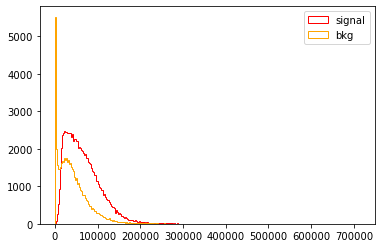

500GeV
lepton2_pt


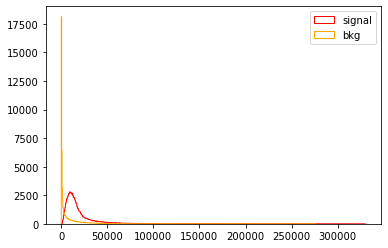

500GeV
lepton3_pt


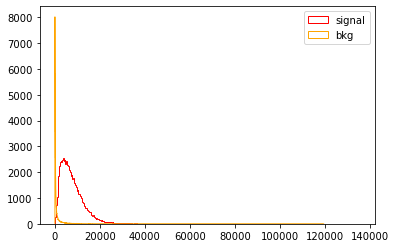

500GeV
lepton1_eta


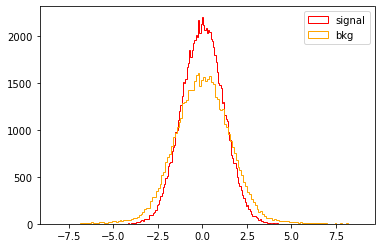

500GeV
lepton2_eta


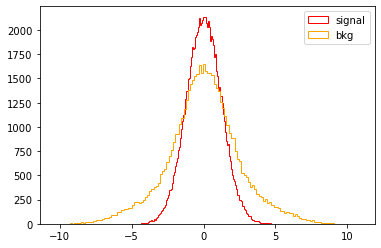

500GeV
lepton3_eta


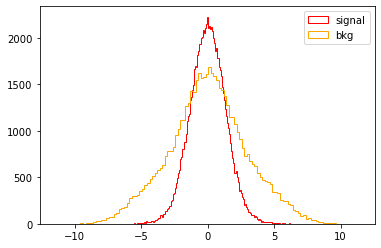

500GeV
lepton1_phi


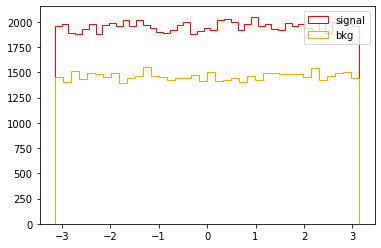

500GeV
lepton2_phi


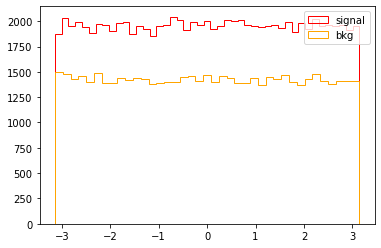

500GeV
lepton3_phi


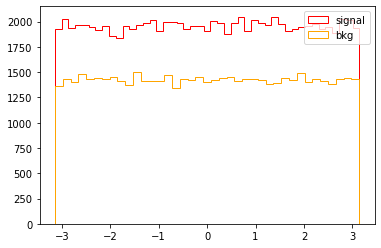

500GeV
MET


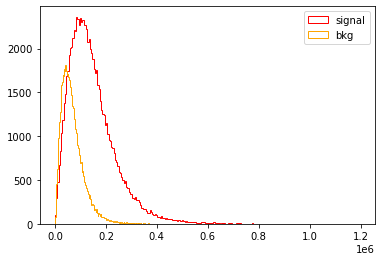

500GeV
MET_phi


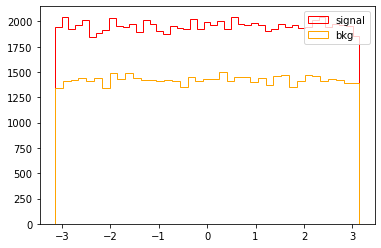

500GeV
lepton1_flavor


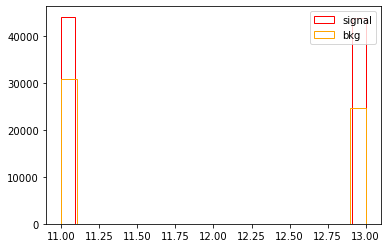

500GeV
lepton2_flavor


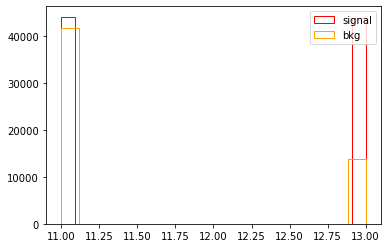

500GeV
lepton3_flavor


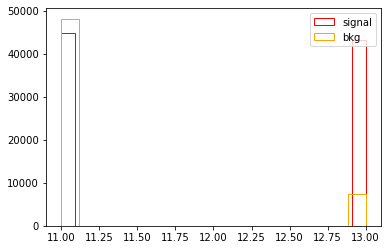

500GeV
lepton1_charge


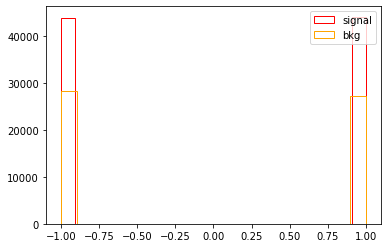

500GeV
lepton2_charge


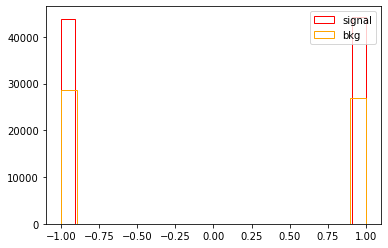

500GeV
lepton3_charge


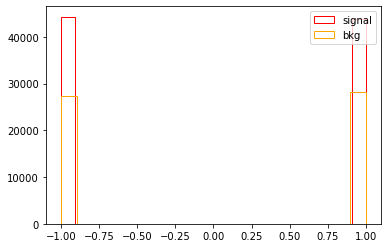

500GeV
visible_pt


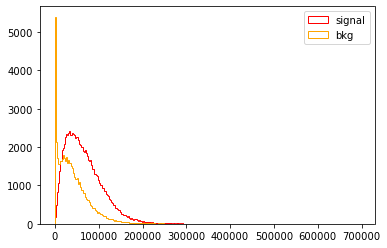

500GeV
transverse_mass


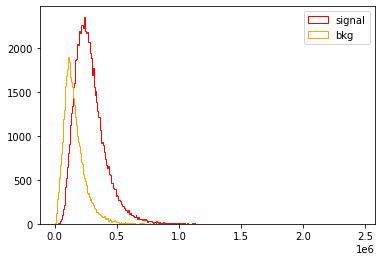

500GeV
dilep_mass


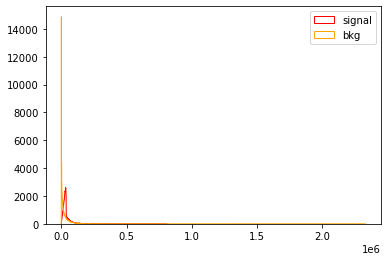

500GeV
dilep_DR


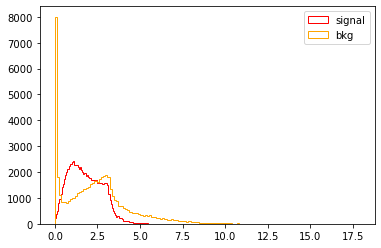

500GeV
signal


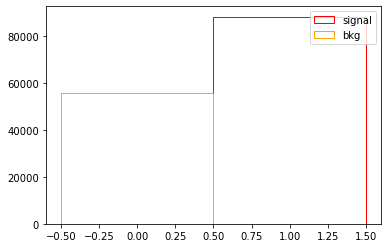

600GeV
lepton1_pt


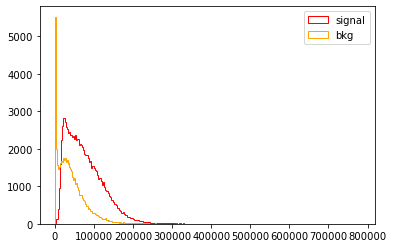

600GeV
lepton2_pt


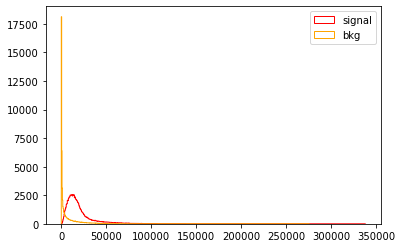

600GeV
lepton3_pt


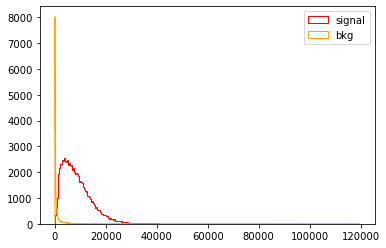

600GeV
lepton1_eta


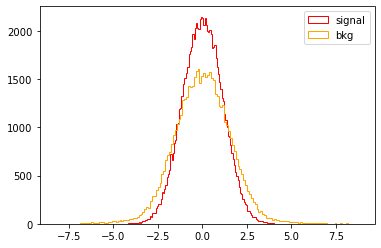

600GeV
lepton2_eta


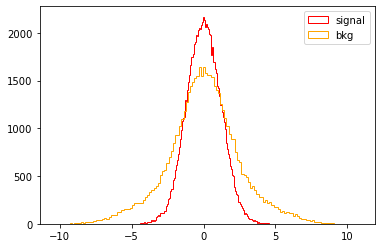

600GeV
lepton3_eta


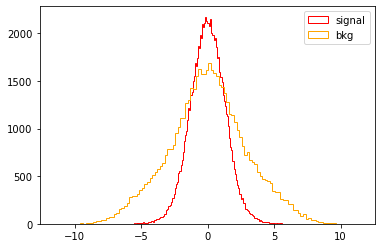

600GeV
lepton1_phi


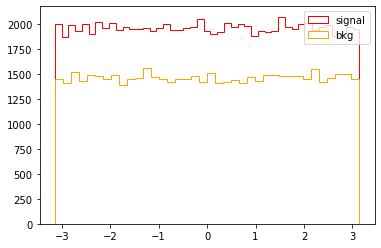

600GeV
lepton2_phi


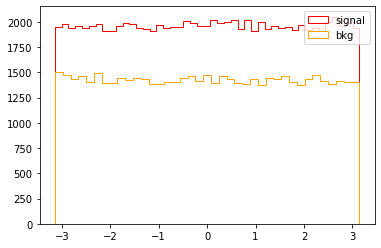

600GeV
lepton3_phi


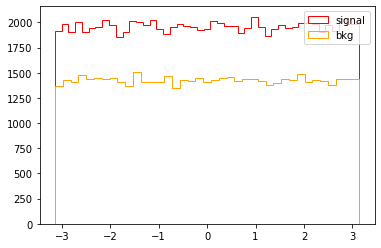

600GeV
MET


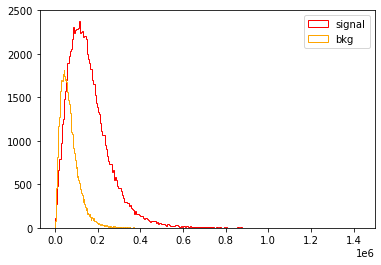

600GeV
MET_phi


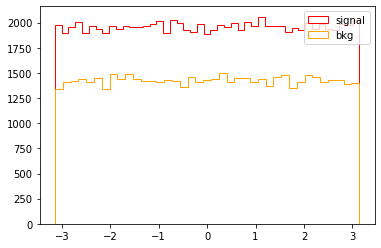

600GeV
lepton1_flavor


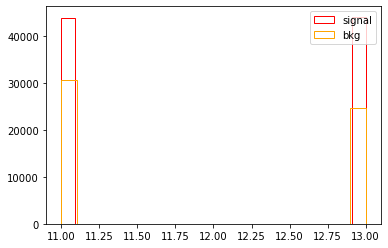

600GeV
lepton2_flavor


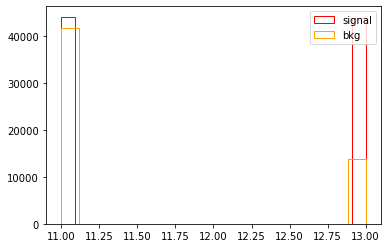

600GeV
lepton3_flavor


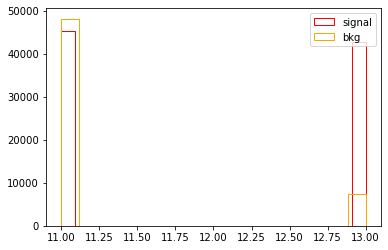

600GeV
lepton1_charge


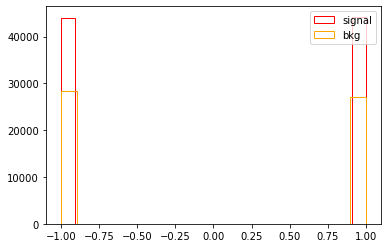

600GeV
lepton2_charge


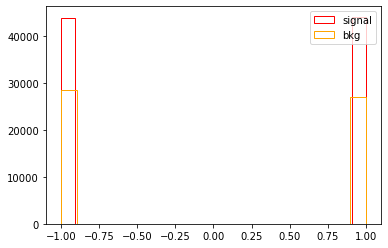

600GeV
lepton3_charge


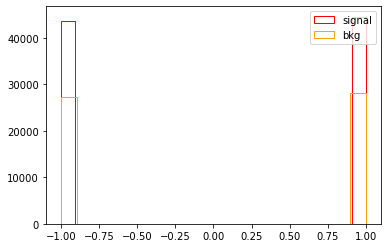

600GeV
visible_pt


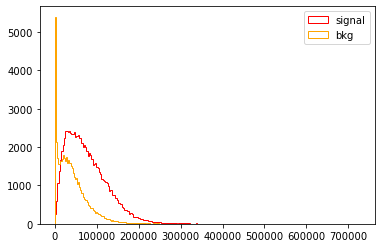

600GeV
transverse_mass


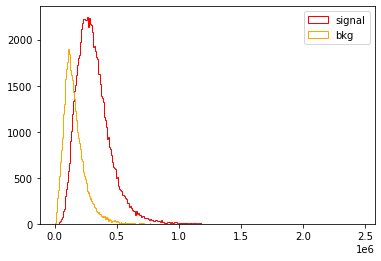

600GeV
dilep_mass


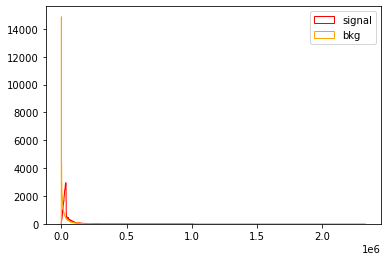

600GeV
dilep_DR


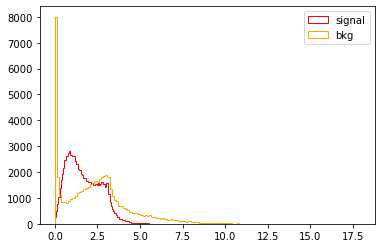

600GeV
signal


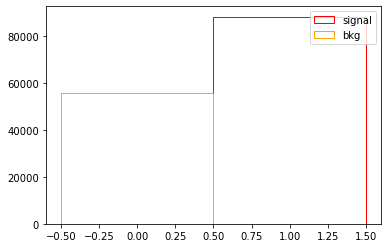

700GeV
lepton1_pt


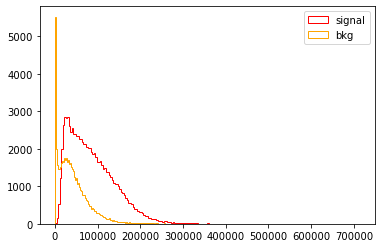

700GeV
lepton2_pt


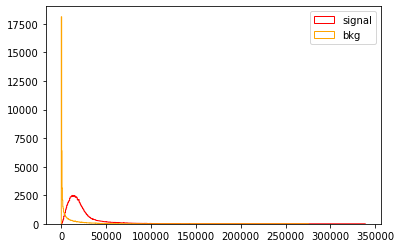

700GeV
lepton3_pt


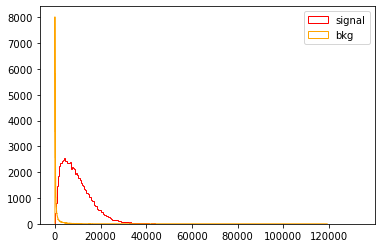

700GeV
lepton1_eta


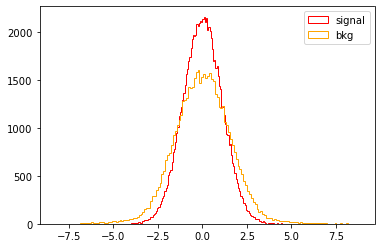

700GeV
lepton2_eta


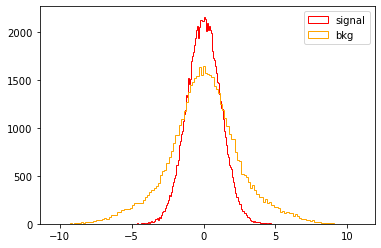

700GeV
lepton3_eta


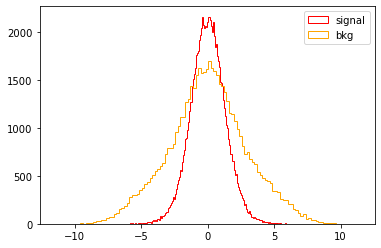

700GeV
lepton1_phi


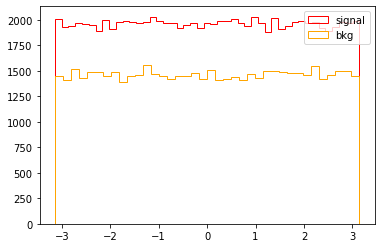

700GeV
lepton2_phi


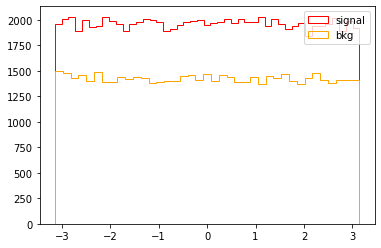

700GeV
lepton3_phi


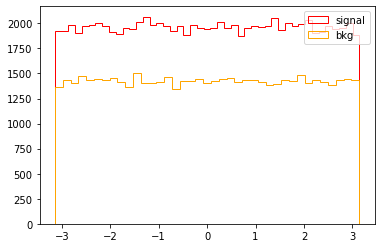

700GeV
MET


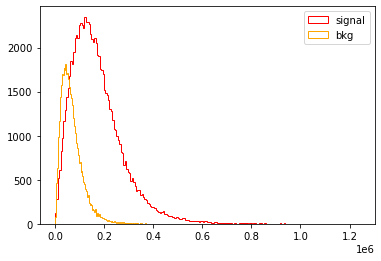

700GeV
MET_phi


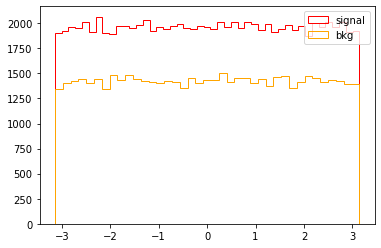

700GeV
lepton1_flavor


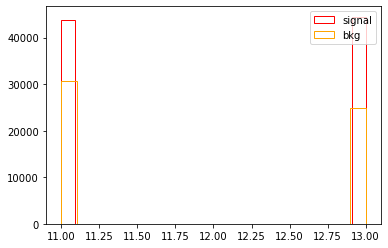

700GeV
lepton2_flavor


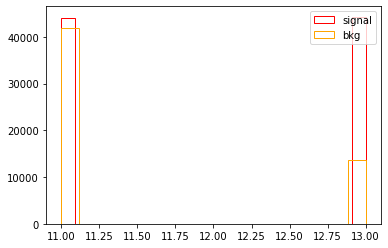

700GeV
lepton3_flavor


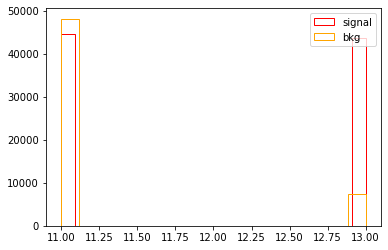

700GeV
lepton1_charge


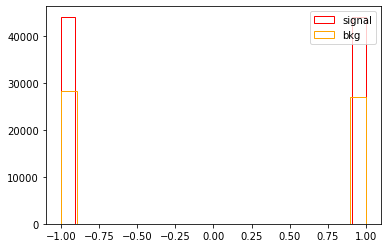

700GeV
lepton2_charge


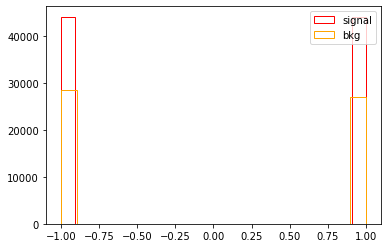

700GeV
lepton3_charge


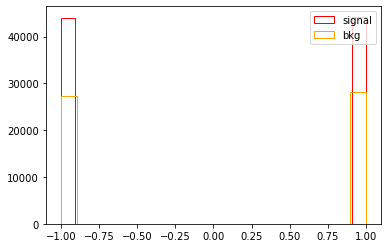

700GeV
visible_pt


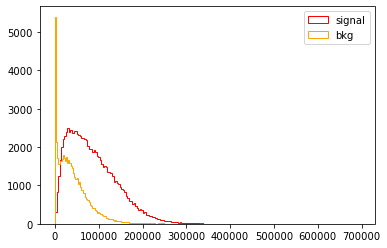

700GeV
transverse_mass


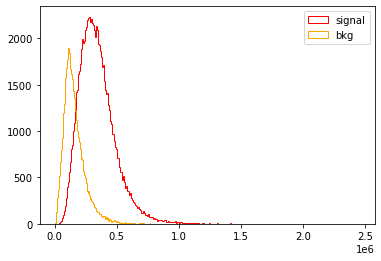

700GeV
dilep_mass


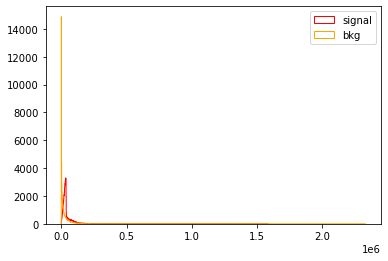

700GeV
dilep_DR


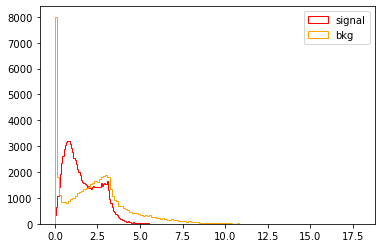

700GeV
signal


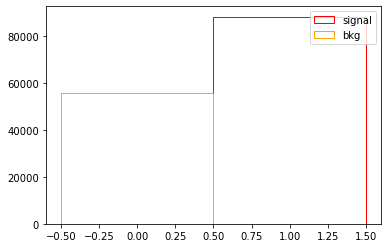

800GeV
lepton1_pt


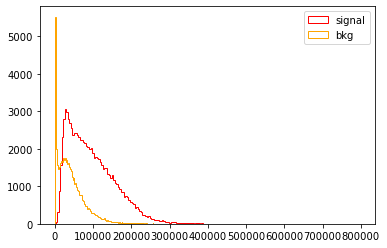

800GeV
lepton2_pt


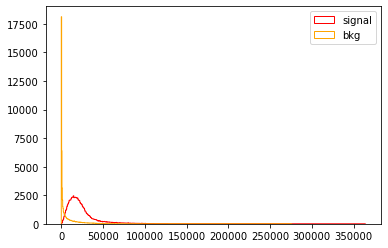

800GeV
lepton3_pt


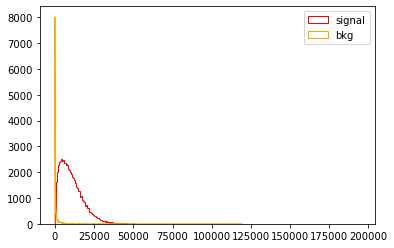

800GeV
lepton1_eta


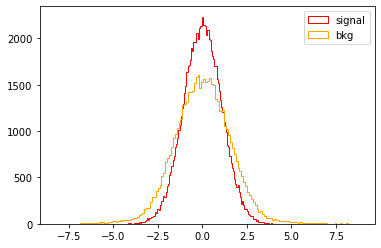

800GeV
lepton2_eta


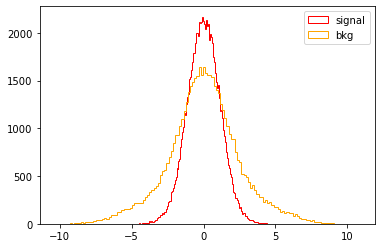

800GeV
lepton3_eta


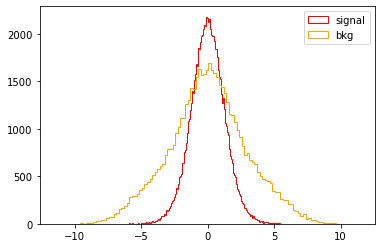

800GeV
lepton1_phi


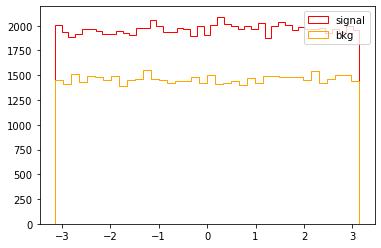

800GeV
lepton2_phi


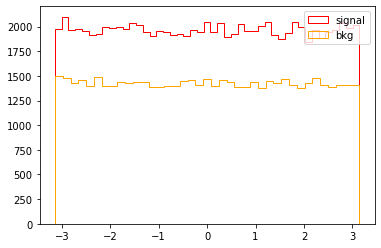

800GeV
lepton3_phi


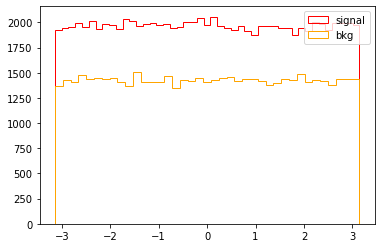

800GeV
MET


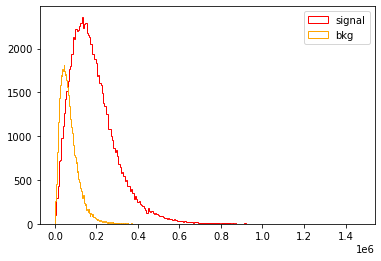

800GeV
MET_phi


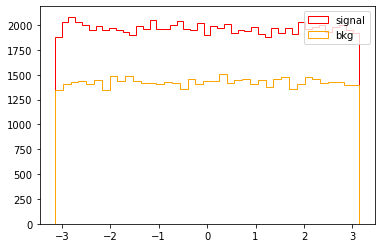

800GeV
lepton1_flavor


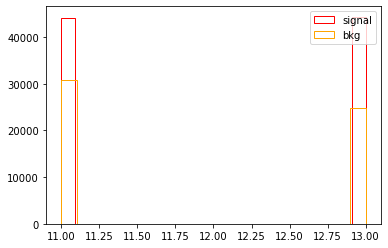

800GeV
lepton2_flavor


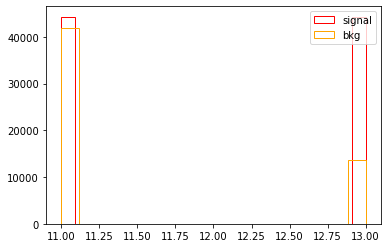

800GeV
lepton3_flavor


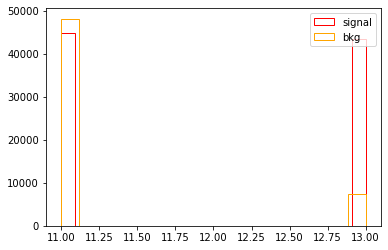

800GeV
lepton1_charge


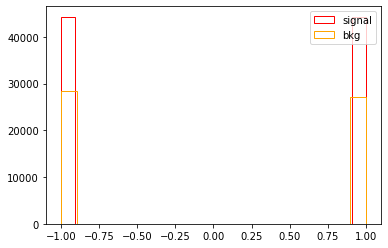

800GeV
lepton2_charge


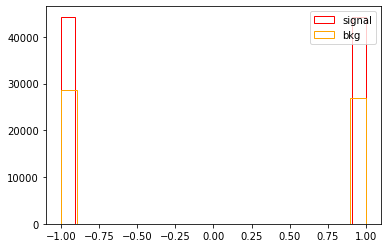

800GeV
lepton3_charge


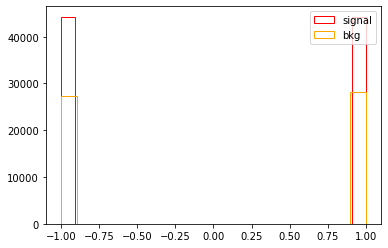

800GeV
visible_pt


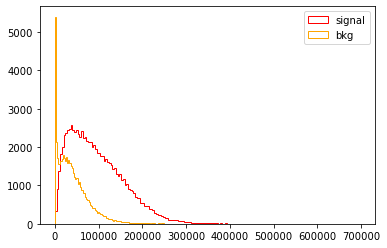

800GeV
transverse_mass


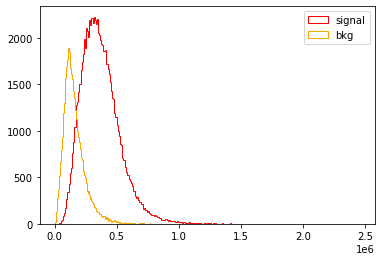

800GeV
dilep_mass


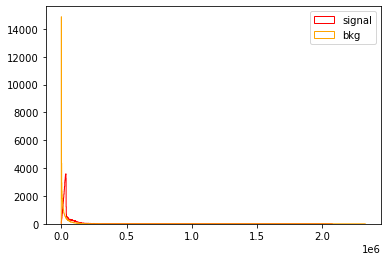

800GeV
dilep_DR


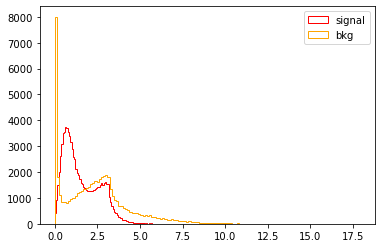

800GeV
signal


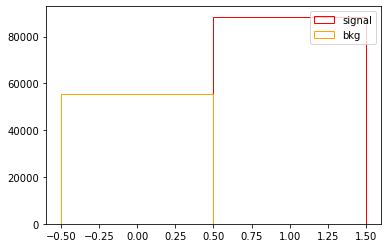

1000GeV
lepton1_pt


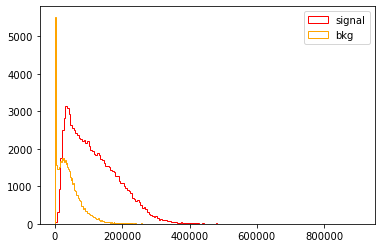

1000GeV
lepton2_pt


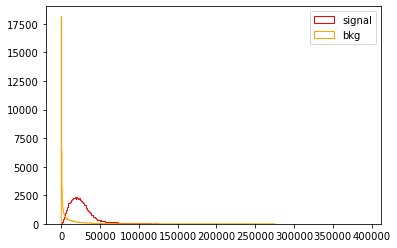

1000GeV
lepton3_pt


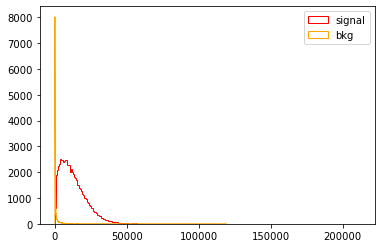

1000GeV
lepton1_eta


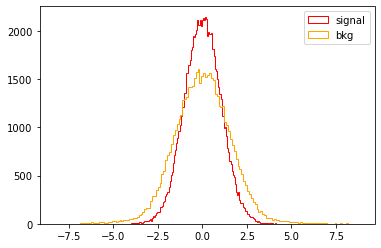

1000GeV
lepton2_eta


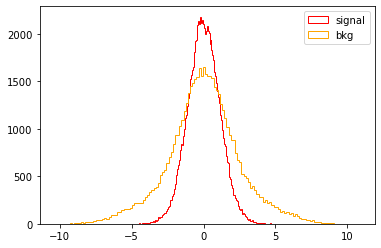

1000GeV
lepton3_eta


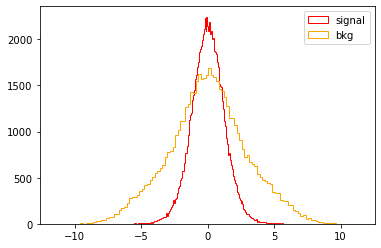

1000GeV
lepton1_phi


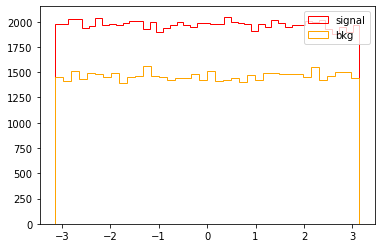

1000GeV
lepton2_phi


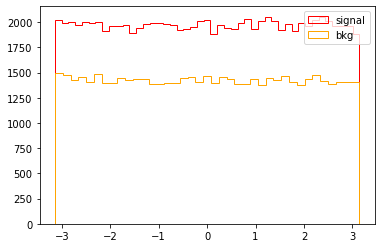

1000GeV
lepton3_phi


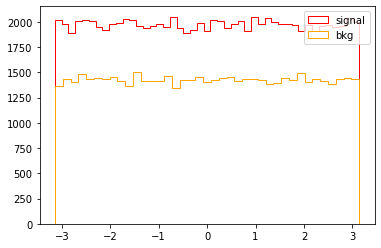

1000GeV
MET


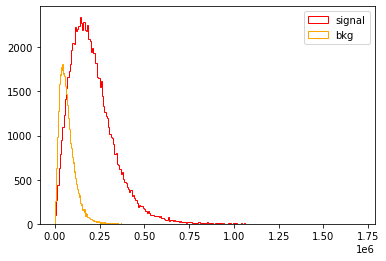

1000GeV
MET_phi


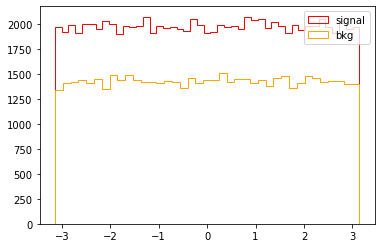

1000GeV
lepton1_flavor


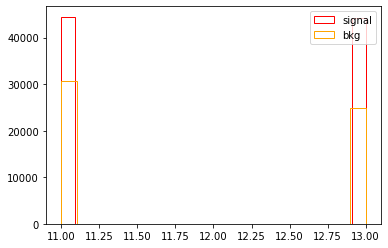

1000GeV
lepton2_flavor


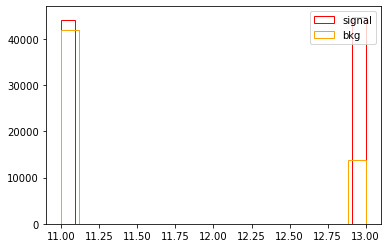

1000GeV
lepton3_flavor


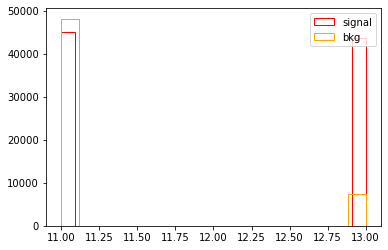

1000GeV
lepton1_charge


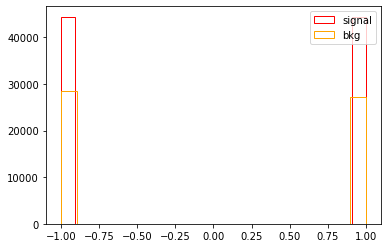

1000GeV
lepton2_charge


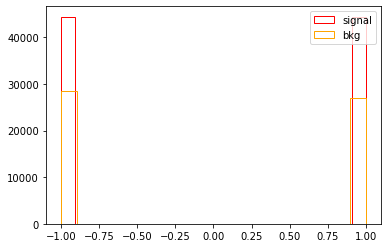

1000GeV
lepton3_charge


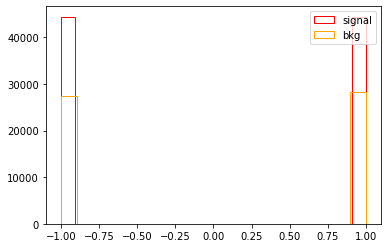

1000GeV
visible_pt


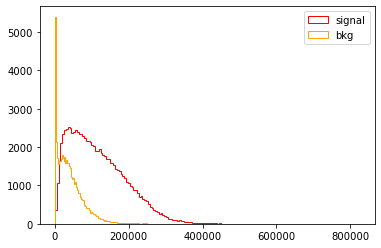

1000GeV
transverse_mass


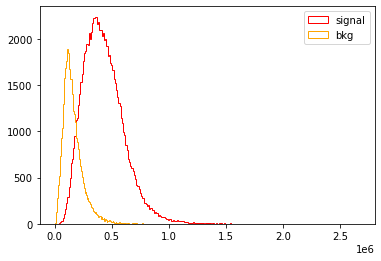

1000GeV
dilep_mass


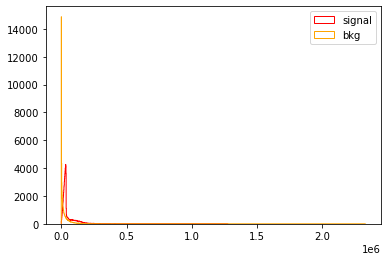

1000GeV
dilep_DR


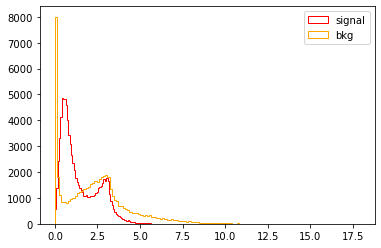

1000GeV
signal


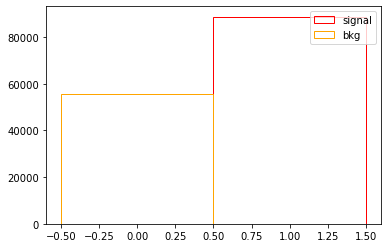

In [18]:
SignalPlotLoop(df_sig, df_bkg)

In [19]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()
 
def standardize_stuff(n):
    print ("HI", n, n.min(),n.max())
    return (n - n.min())/(n.max() - n.min())

In [20]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [21]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        #    if "flavor" or "charge" in var:
        #        series_list.append(df_sig[var])
        #        continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_pt
0         44705.634885
1         59194.273039
2         38001.242798
3         57506.004791
4         22739.754670
             ...      
88053     75172.369425
88054    160450.633377
88055     30571.142534
88056     78904.677984
88057     49888.670170
Name: lepton1_pt, Length: 88058, dtype: float64
212.7367329555459
555526.0328581288
HI 0         44705.634885
1         59194.273039
2         38001.242798
3         57506.004791
4         22739.754670
             ...      
88053     75172.369425
88054    160450.633377
88055     30571.142534
88056     78904.677984
88057     49888.670170
Name: lepton1_pt, Length: 88058, dtype: float64 212.7367329555459 555526.0328581288
0        0.080122
1        0.106213
2        0.068049
3        0.103173
4        0.040566
           ...   
88053    0.134986
88054    0.288554
88055    0.054669
88056    0.141707
88057    0.089456
Name: lepton1_pt, Length: 88058, dtype: float64
None
500GeV
lepton2_pt
0         8081.041525
1        25410

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
88053    1.0
88054    0.0
88055    0.0
88056    0.0
88057    0.0
Name: lepton3_flavor, Length: 88058, dtype: float64
None
500GeV
lepton1_charge
0        1
1       -1
2       -1
3        1
4       -1
        ..
88053    1
88054   -1
88055   -1
88056    1
88057    1
Name: lepton1_charge, Length: 88058, dtype: int64
-1
1
HI 0        1
1       -1
2       -1
3        1
4       -1
        ..
88053    1
88054   -1
88055   -1
88056    1
88057    1
Name: lepton1_charge, Length: 88058, dtype: int64 -1 1
0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
88053    1.0
88054    0.0
88055    0.0
88056    1.0
88057    1.0
Name: lepton1_charge, Length: 88058, dtype: float64
None
500GeV
lepton2_charge
0       -1
1        1
2        1
3        1
4        1
        ..
88053    1
88054    1
88055    1
88056   -1
88057   -1
Name: lepton2_charge, Length: 88058, dtype: int64
-1
1
HI 0       -1
1        1


0        0.019861
1        0.071137
2        0.092779
3        0.073558
4        0.052967
           ...   
88165    0.235475
88166    0.053251
88167    0.022660
88168    0.227425
88169    0.098275
Name: visible_pt, Length: 88170, dtype: float64
None
600GeV
transverse_mass
0        221993.271243
1        468061.947286
2        395475.748539
3        287016.487876
4        212201.610984
             ...      
88165    659478.584666
88166    231149.658917
88167    379553.868296
88168    447173.342266
88169    211861.107970
Name: transverse_mass, Length: 88170, dtype: float64
31304.339210444723
1662009.9422927017
HI 0        221993.271243
1        468061.947286
2        395475.748539
3        287016.487876
4        212201.610984
             ...      
88165    659478.584666
88166    231149.658917
88167    379553.868296
88168    447173.342266
88169    211861.107970
Name: transverse_mass, Length: 88170, dtype: float64 31304.339210444723 1662009.9422927017
0        0.116936
1        0.267834

0        0.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
88280    0.0
88281    0.0
88282    1.0
88283    1.0
88284    1.0
Name: lepton3_charge, Length: 88285, dtype: float64
None
700GeV
visible_pt
0         45391.111791
1        174622.090157
2         61122.316855
3         17450.553674
4         20533.697336
             ...      
88280     41516.605609
88281     25106.252472
88282    191816.640528
88283     77585.098272
88284     17442.285956
Name: visible_pt, Length: 88285, dtype: float64
306.67090452511326
643567.5631571508
HI 0         45391.111791
1        174622.090157
2         61122.316855
3         17450.553674
4         20533.697336
             ...      
88280     41516.605609
88281     25106.252472
88282    191816.640528
88283     77585.098272
88284     17442.285956
Name: visible_pt, Length: 88285, dtype: float64 306.67090452511326 643567.5631571508
0        0.070087
1        0.270987
2        0.094543
3        0.026652
4        0.031445
           ..

0        0.105922
1        0.133551
2        0.476215
3        0.070396
4        0.057885
           ...   
88485    0.268724
88486    0.077947
88487    0.098912
88488    0.199041
88489    0.139611
Name: transverse_mass, Length: 88490, dtype: float64
None
800GeV
dilep_mass
0         51326.783211
1         84128.345733
2         32810.258173
3         56904.851181
4         79255.462033
             ...      
88485    123607.406265
88486     14286.700607
88487     16677.606994
88488    180434.050767
88489     22616.309296
Name: dilep_mass, Length: 88490, dtype: float64
-124.47136974905928
2079965.202773884
HI 0         51326.783211
1         84128.345733
2         32810.258173
3         56904.851181
4         79255.462033
             ...      
88485    123607.406265
88486     14286.700607
88487     16677.606994
88488    180434.050767
88489     22616.309296
Name: dilep_mass, Length: 88490, dtype: float64 -124.47136974905928 2079965.202773884
0        0.024735
1        0.040504
2        

None
1000GeV
transverse_mass
0        447521.674638
1        331520.957269
2        699402.343075
3        552236.486259
4        257316.659864
             ...      
88776    476900.105092
88777    115991.766959
88778    215894.272760
88779    276923.290083
88780    375546.417388
Name: transverse_mass, Length: 88781, dtype: float64
38315.48257980492
2664706.483192638
HI 0        447521.674638
1        331520.957269
2        699402.343075
3        552236.486259
4        257316.659864
             ...      
88776    476900.105092
88777    115991.766959
88778    215894.272760
88779    276923.290083
88780    375546.417388
Name: transverse_mass, Length: 88781, dtype: float64 38315.48257980492 2664706.483192638
0        0.155806
1        0.111638
2        0.251709
3        0.195676
4        0.083385
           ...   
88776    0.166991
88777    0.029575
88778    0.067613
88779    0.090850
88780    0.128401
Name: transverse_mass, Length: 88781, dtype: float64
None
1000GeV
dilep_mass
0        

In [22]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
9.941882709527304
712731.1922377755
HI 0         60432.759206
1        114977.920099
2          4705.184257
3         74073.895915
4         50060.002820
             ...      
55557       974.166550
55558     85452.524343
55559     28299.548391
55560     89680.494117
55561      1254.940305
Name: lepton1_pt, Length: 55562, dtype: float64 9.941882709527304 712731.1922377755
0        0.084778
1        0.161308
2        0.006588
3        0.103917
4        0.070224
           ...   
55557    0.001353
55558    0.119882
55559    0.039692
55560    0.125814
55561    0.001747
Name: lepton1_pt, Length: 55562, dtype: float64
None
lepton2_pt
1.2794186037349944
276077.6508794311
HI 0        1772.358160
1         134.964779
2         726.458014
3         166.976275
4        4525.579193
            ...     
55557     591.858507
55558    2531.264571
55559    6492.247470
55560     547.161770
55561     736.783991
Name: lepton2_pt, Length: 55562, dtype: float64 1.2794186037349944 276077.650879

In [23]:
df_norm_bkg

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.084778    0.006415    0.001331     0.492199     0.491744   
1        0.161308    0.000484    0.000302     0.394888     0.245981   
2        0.006588    0.002627    0.005640     0.457758     0.653108   
3        0.103917    0.000600    0.000802     0.502804     0.531841   
4        0.070224    0.016388    0.000487     0.530508     0.442456   
...           ...         ...         ...          ...          ...   
55557    0.001353    0.002139    0.001669     0.436340     0.422591   
55558    0.119882    0.009164    0.014038     0.397253     0.483274   
55559    0.039692    0.023511    0.001163     0.504347     0.483259   
55560    0.125814    0.001977    0.003264     0.499887     0.579311   
55561    0.001747    0.002664    0.002488     0.416232     0.534627   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET  ...  \
0         0.504878     0.909986     0.654823     0.651049  0.124338  ...   
1         0.276935     0.334502     0.769570     0.770207  0.048811  ...   
2         0.653878     0.001942     0.583143     0.582321  0.156449  ...   
3         0.533936     0.405416     0.516748     0.492010  0.037444  ...   
4         0.271168     0.964750     0.555544     0.063415  0.024083  ...   
...            ...          ...          ...          ...       ...  ...   
55557     0.459497     0.615080     0.510020     0.631796  0.206631  ...   
55558     0.496577     0.373947     0.939959     0.942441  0.033174  ...   
55559     0.511395     0.466905     0.487671     0.428882  0.094375  ...   
55560     0.586827     0.538186     0.448342     0.450368  0.055381  ...   
55561     0.305664     0.395932     0.062939     0.960066  0.071170  ...   

       lepton2_flavor  lepton3_flavor  lepton1_charge  lepton2_charge  \
0                 0.0             0.0             1.0             0.0   
1                 0.0             0.0             0.0             1.0   
2                 0.0             0.0             0.0             1.0   
3                 0.0             0.0             1.0             1.0   
4                 0.0             0.0             1.0             0.0   
...               ...             ...             ...             ...   
55557             0.0             0.0             0.0             1.0   
55558             0.0             0.0             1.0             0.0   
55559             1.0             0.0             0.0             1.0   
55560             0.0             0.0             1.0             0.0   
55561             0.0             0.0             1.0             0.0   

       lepton3_charge  visible_pt  transverse_mass  dilep_mass  dilep_DR  \
0                 1.0    0.086914         0.057460    0.000203  0.001328   
1                 0.0    0.165240         0.073525    0.010666  0.252720   
2                 0.0    0.005096         0.051170    0.005971  0.264836   
3                 0.0    0.106900         0.039668    0.000211  0.013330   
4                 0.0    0.066714         0.035242    0.018058  0.174211   
...               ...         ...              ...         ...       ...   
55557             1.0    0.002402         0.054795    0.000481  0.048839   
55558             1.0    0.117471         0.053774    0.015705  0.170864   
55559             0.0    0.050192         0.038763    0.002944  0.026202   
55560             1.0    0.130203         0.051753    0.000204  0.001616   
55561             1.0    0.001392         0.023928    0.001476  0.167392   

       signal  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
55557     0.0  
55558     0.0  
55559     0.0  
55560     0.0  
55561     0.0  

[55562 rows x 22 columns]

500GeV
lepton1_pt


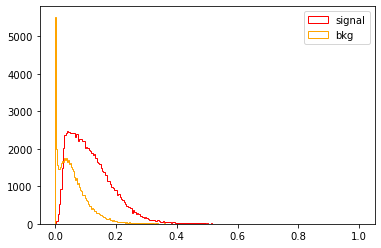

500GeV
lepton2_pt


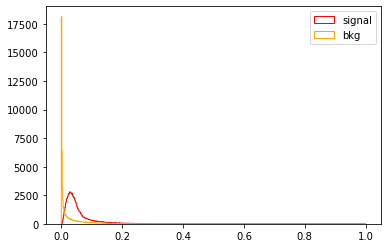

500GeV
lepton3_pt


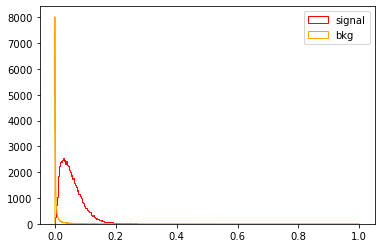

500GeV
lepton1_eta


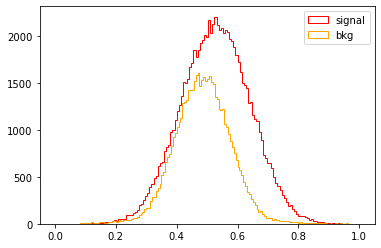

500GeV
lepton2_eta


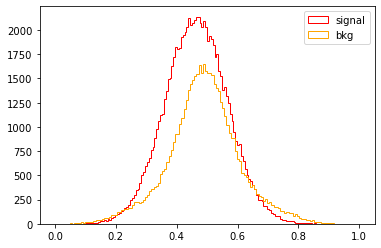

500GeV
lepton3_eta


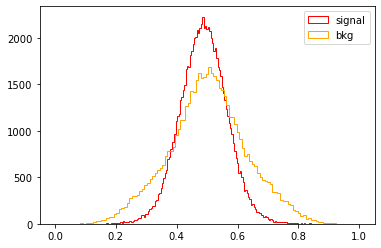

500GeV
lepton1_phi


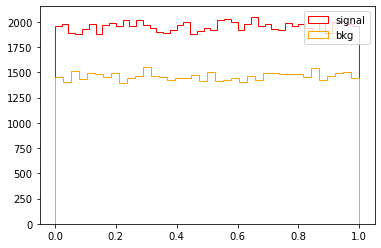

500GeV
lepton2_phi


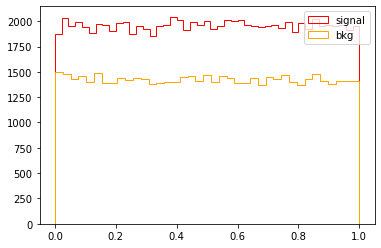

500GeV
lepton3_phi


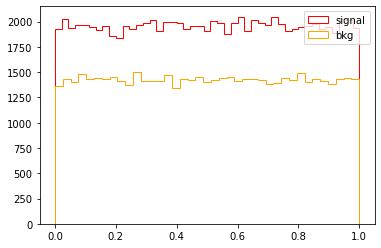

500GeV
MET


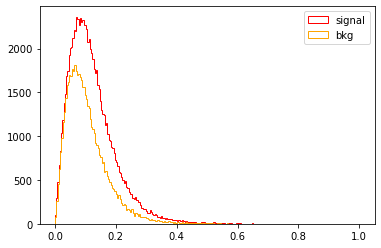

500GeV
MET_phi


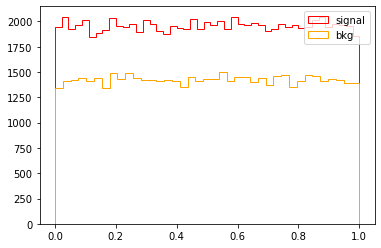

500GeV
lepton1_flavor


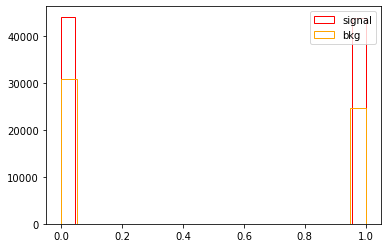

500GeV
lepton2_flavor


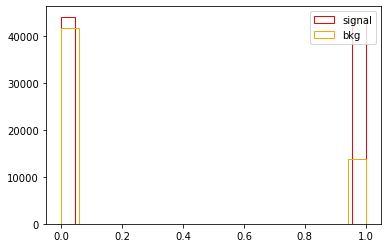

500GeV
lepton3_flavor


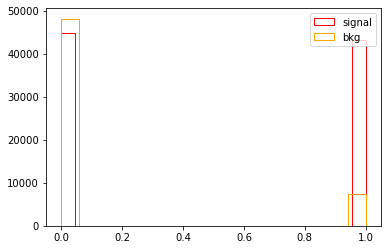

500GeV
lepton1_charge


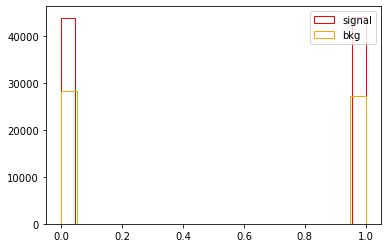

500GeV
lepton2_charge


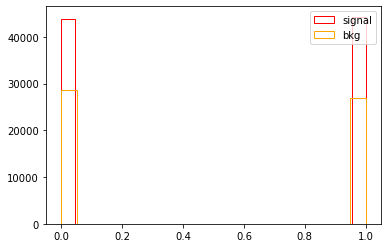

500GeV
lepton3_charge


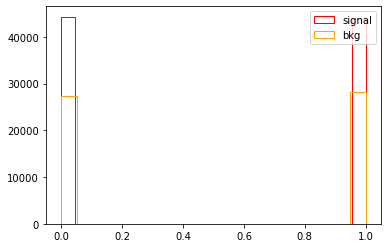

500GeV
visible_pt


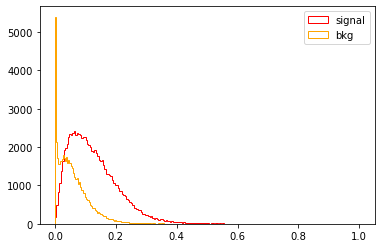

500GeV
transverse_mass


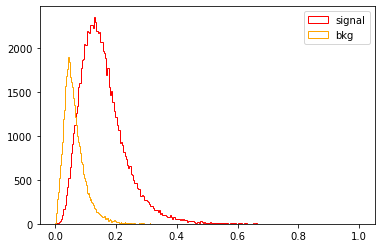

500GeV
dilep_mass


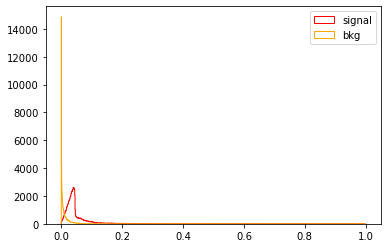

500GeV
dilep_DR


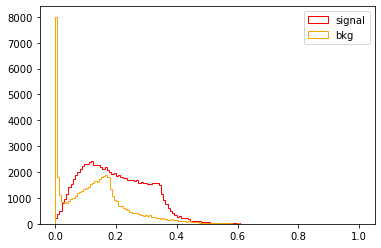

500GeV
signal


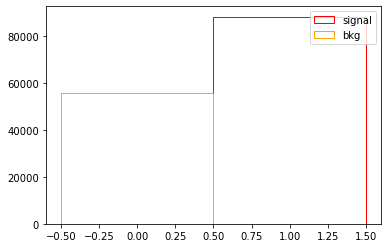

600GeV
lepton1_pt


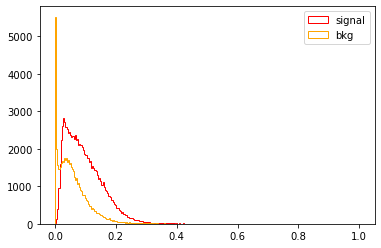

600GeV
lepton2_pt


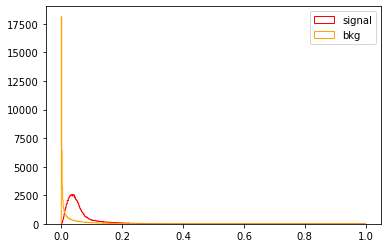

600GeV
lepton3_pt


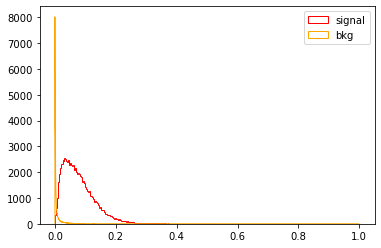

600GeV
lepton1_eta


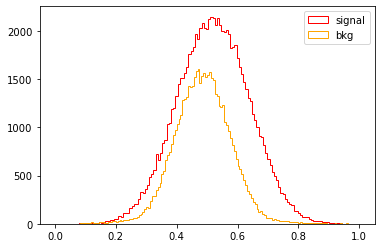

600GeV
lepton2_eta


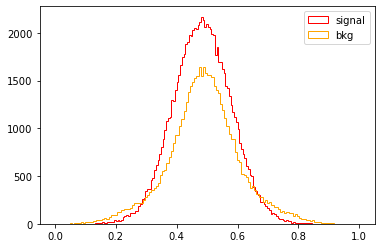

600GeV
lepton3_eta


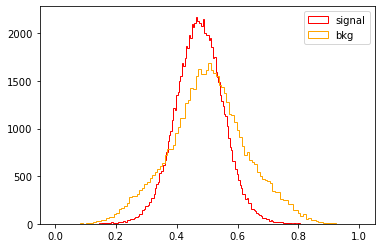

600GeV
lepton1_phi


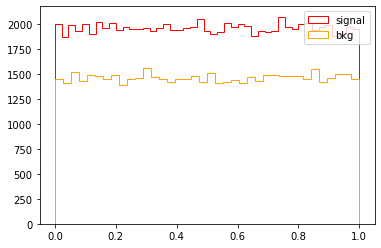

600GeV
lepton2_phi


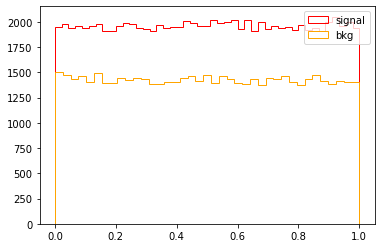

600GeV
lepton3_phi


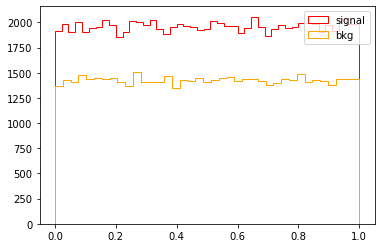

600GeV
MET


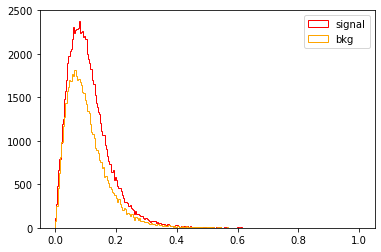

600GeV
MET_phi


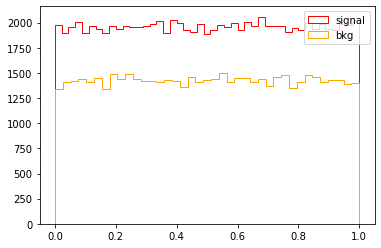

600GeV
lepton1_flavor


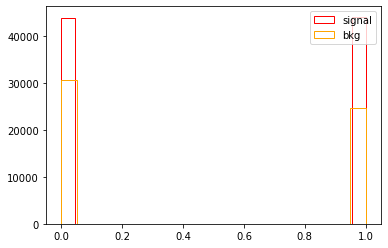

600GeV
lepton2_flavor


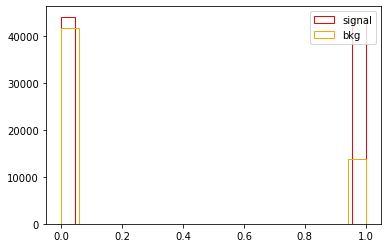

600GeV
lepton3_flavor


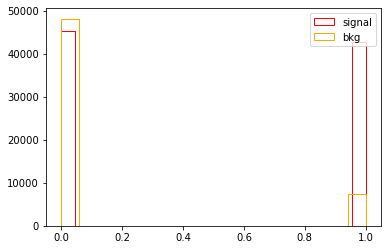

600GeV
lepton1_charge


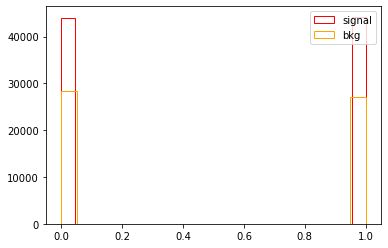

600GeV
lepton2_charge


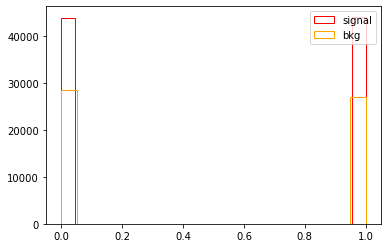

600GeV
lepton3_charge


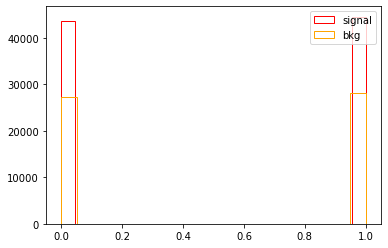

600GeV
visible_pt


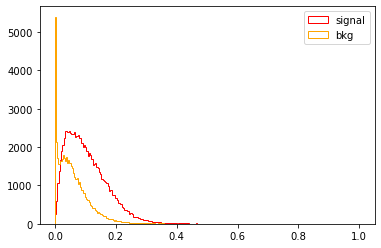

600GeV
transverse_mass


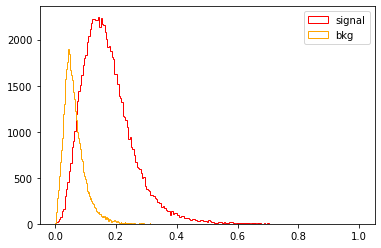

600GeV
dilep_mass


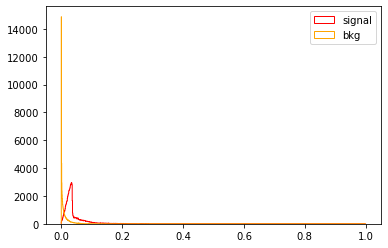

600GeV
dilep_DR


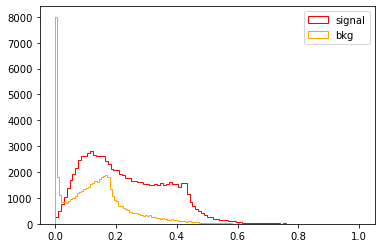

600GeV
signal


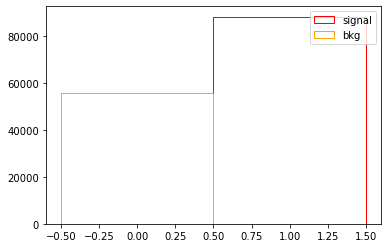

700GeV
lepton1_pt


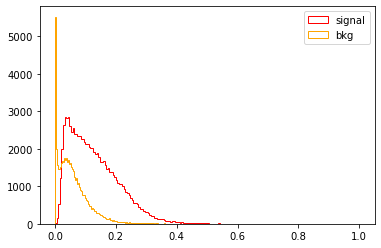

700GeV
lepton2_pt


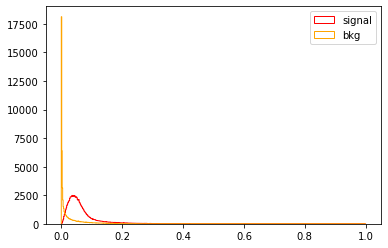

700GeV
lepton3_pt


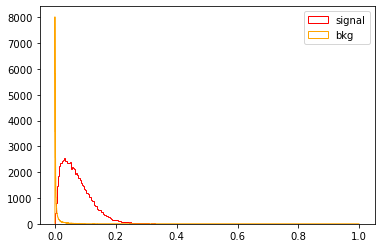

700GeV
lepton1_eta


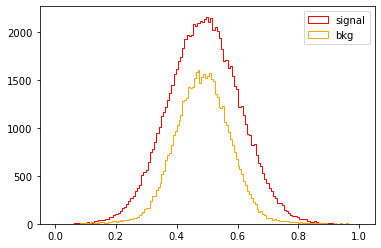

700GeV
lepton2_eta


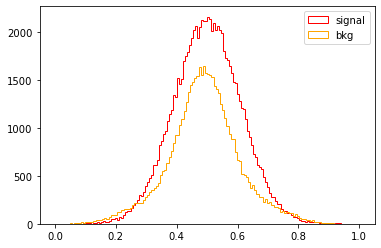

700GeV
lepton3_eta


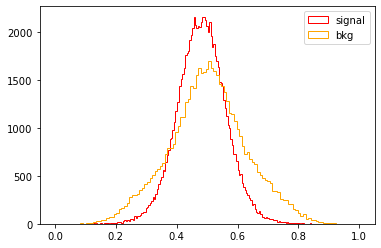

700GeV
lepton1_phi


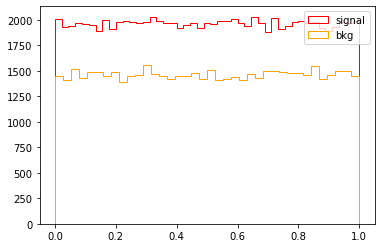

700GeV
lepton2_phi


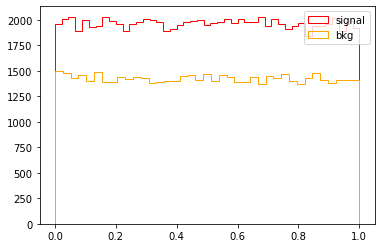

700GeV
lepton3_phi


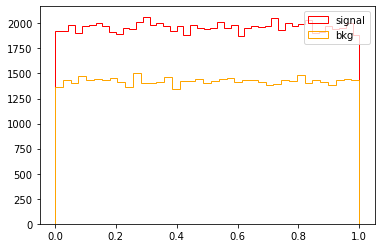

700GeV
MET


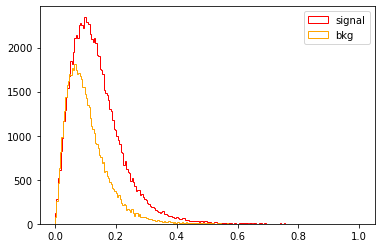

700GeV
MET_phi


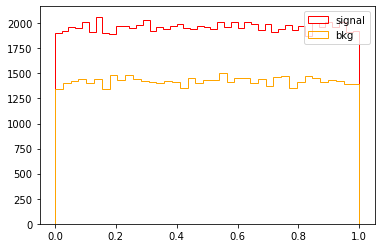

700GeV
lepton1_flavor


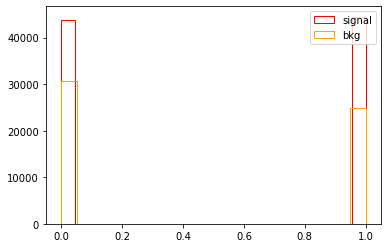

700GeV
lepton2_flavor


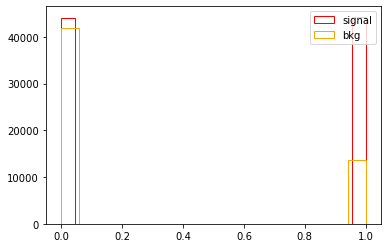

700GeV
lepton3_flavor


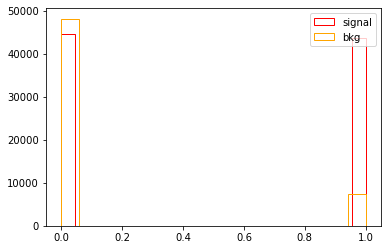

700GeV
lepton1_charge


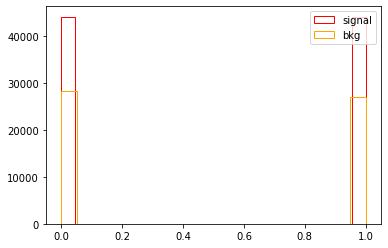

700GeV
lepton2_charge


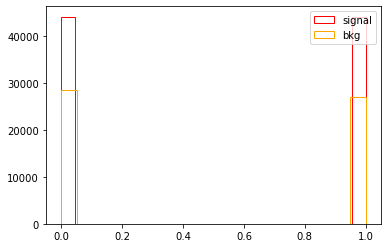

700GeV
lepton3_charge


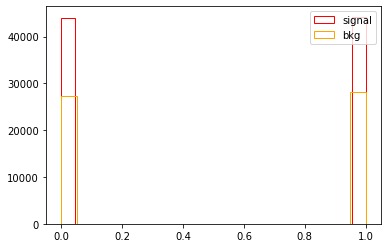

700GeV
visible_pt


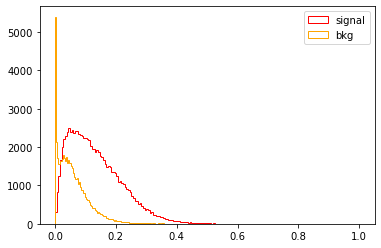

700GeV
transverse_mass


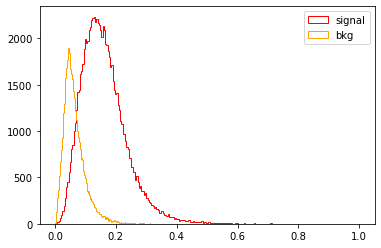

700GeV
dilep_mass


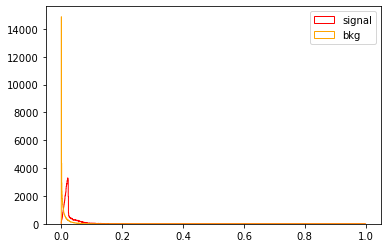

700GeV
dilep_DR


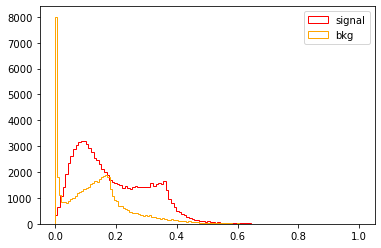

700GeV
signal


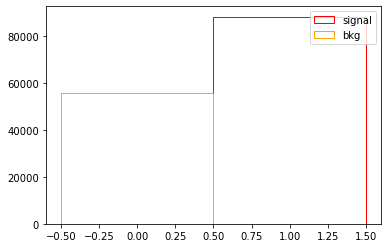

800GeV
lepton1_pt


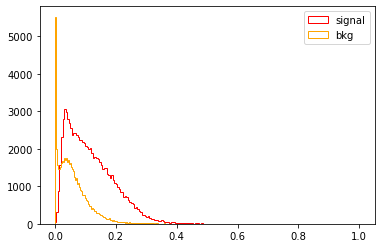

800GeV
lepton2_pt


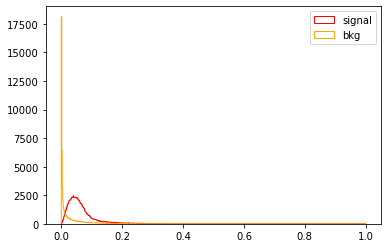

800GeV
lepton3_pt


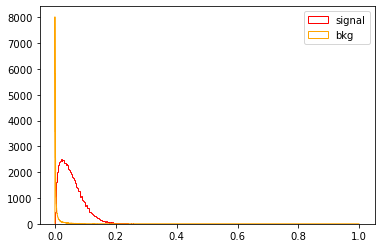

800GeV
lepton1_eta


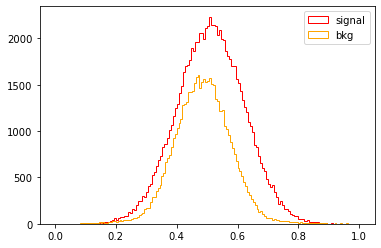

800GeV
lepton2_eta


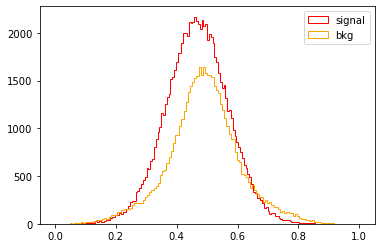

800GeV
lepton3_eta


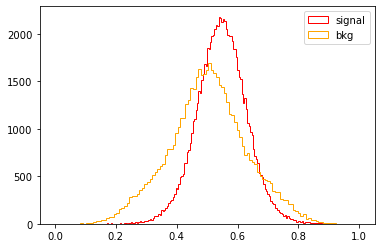

800GeV
lepton1_phi


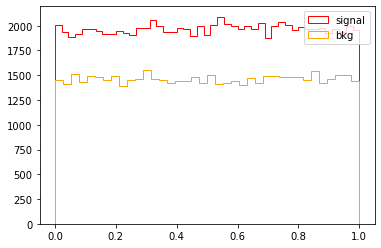

800GeV
lepton2_phi


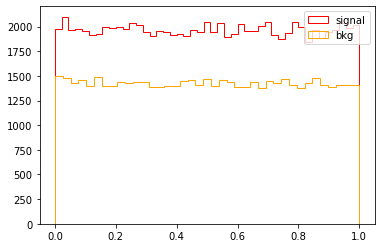

800GeV
lepton3_phi


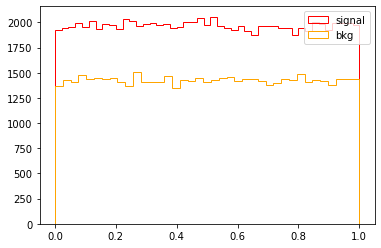

800GeV
MET


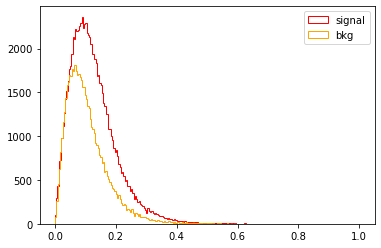

800GeV
MET_phi


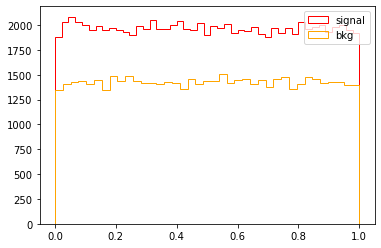

800GeV
lepton1_flavor


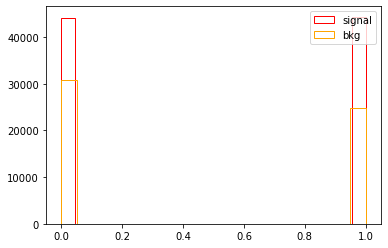

800GeV
lepton2_flavor


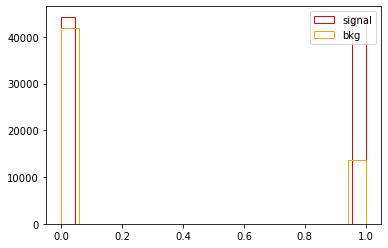

800GeV
lepton3_flavor


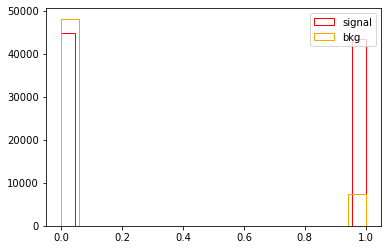

800GeV
lepton1_charge


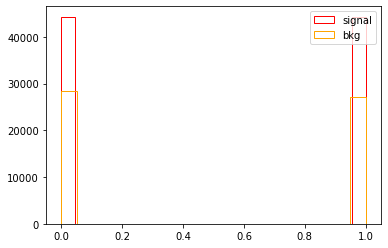

800GeV
lepton2_charge


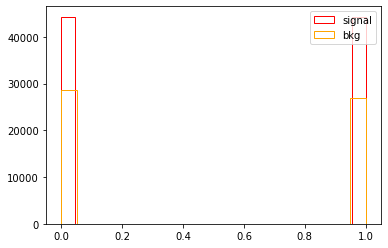

800GeV
lepton3_charge


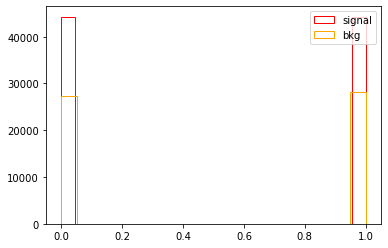

800GeV
visible_pt


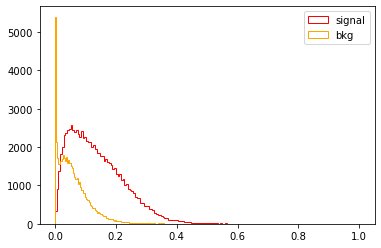

800GeV
transverse_mass


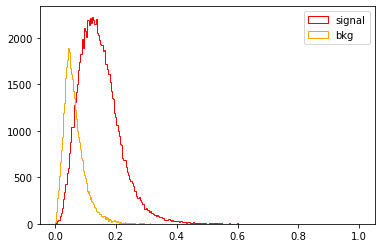

800GeV
dilep_mass


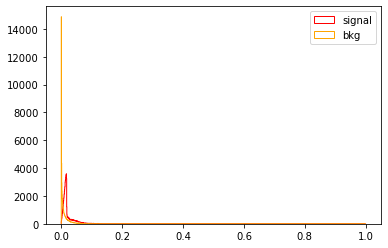

800GeV
dilep_DR


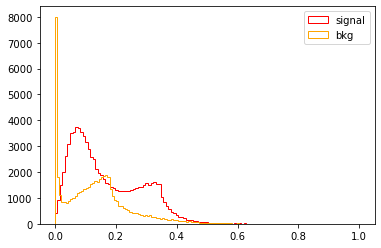

800GeV
signal


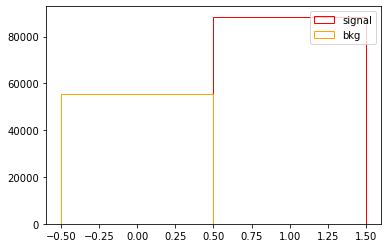

1000GeV
lepton1_pt


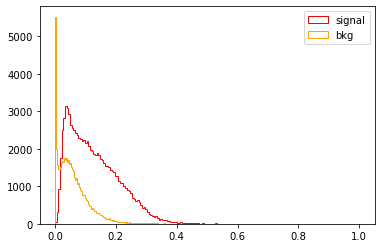

1000GeV
lepton2_pt


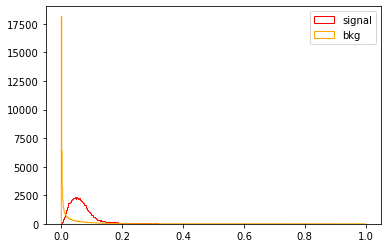

1000GeV
lepton3_pt


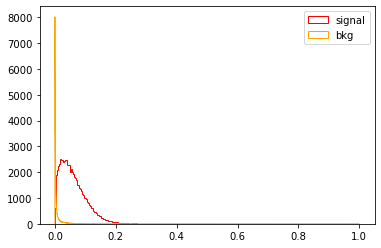

1000GeV
lepton1_eta


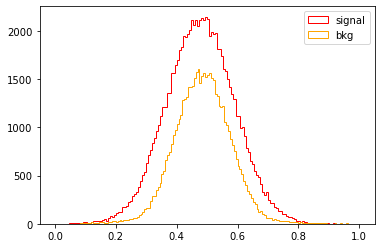

1000GeV
lepton2_eta


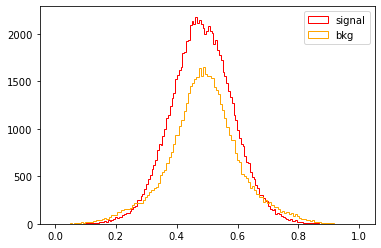

1000GeV
lepton3_eta


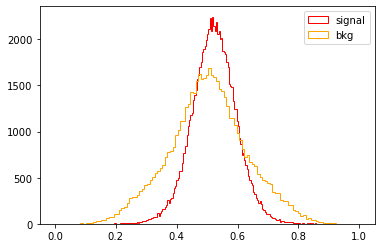

1000GeV
lepton1_phi


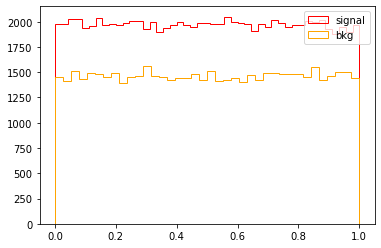

1000GeV
lepton2_phi


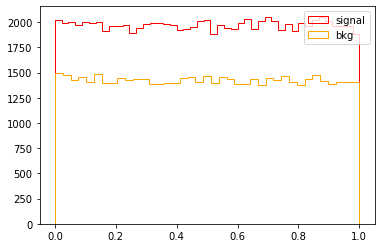

1000GeV
lepton3_phi


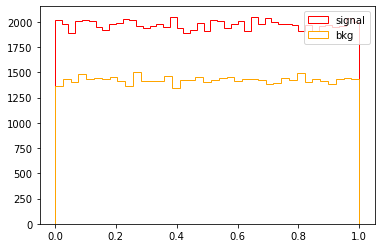

1000GeV
MET


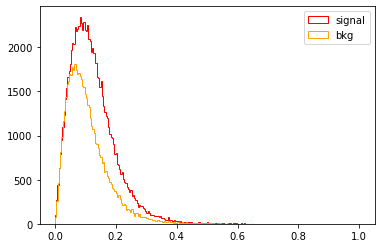

1000GeV
MET_phi


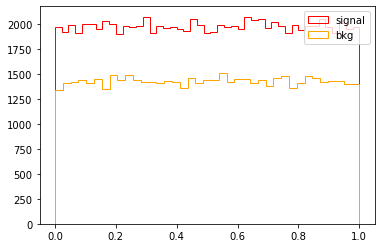

1000GeV
lepton1_flavor


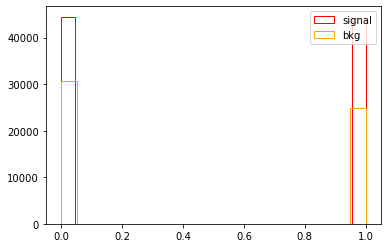

1000GeV
lepton2_flavor


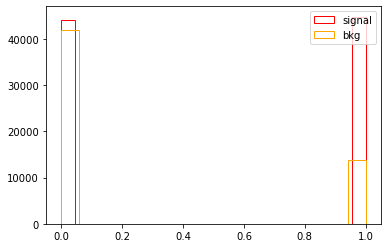

1000GeV
lepton3_flavor


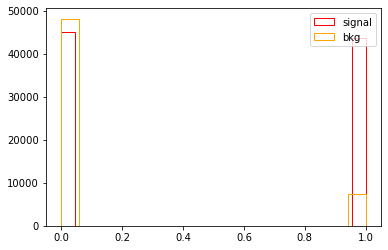

1000GeV
lepton1_charge


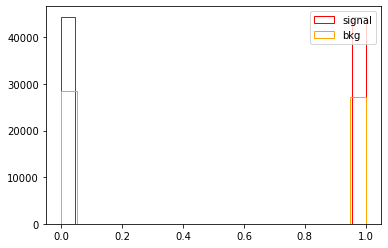

1000GeV
lepton2_charge


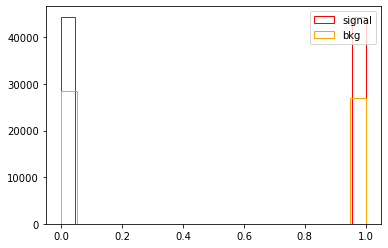

1000GeV
lepton3_charge


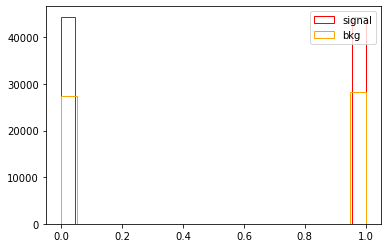

1000GeV
visible_pt


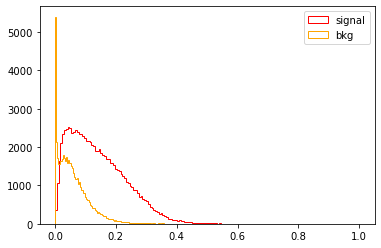

1000GeV
transverse_mass


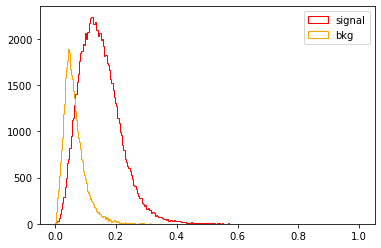

1000GeV
dilep_mass


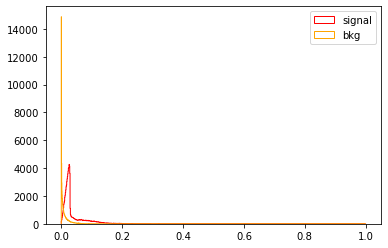

1000GeV
dilep_DR


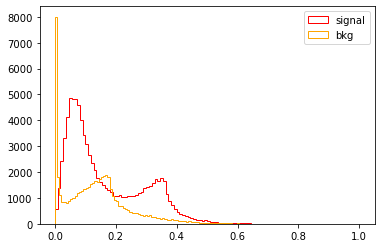

1000GeV
signal


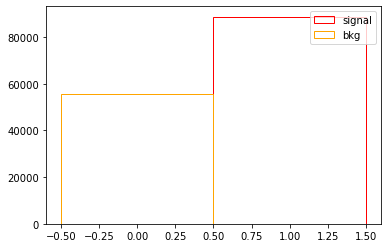

In [24]:
SignalPlotLoop(df_norm_sig, df_norm_bkg)

In [25]:
#using 80% of the (signal + bkg) data for training and the rest for test
#n_sig = [int(7138*80/100),int(7413*80/100),int(7695*80/100),int(7919*80/100),int(8279*80/100)]
#n_bkg = int(31979*80/100)
n_sig = [56570,57366,57129,57494,57905]
#n_sig = [int(56570*80/100),int(57366*80/100),int(57129*80/100),int(57494*80/100),int(57905*80/100)]
#n_bkg = int(55765*80/100)
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

#n_sig = [int(n_sig_scaled[0]*9999*80/100),int(n_sig_scaled[1]*10000*80/100),int(n_sig_scaled[2]*9998*80/100),int(n_sig_scaled[3]*10000*80/100),int(n_sig_scaled[4]*9999*80/100)]
#n_bkg = int(n_bkg_scaled*80473*80/100)

In [26]:
df_train_500, df_test_500, x_train_500, y_train_500, x_test_500, y_test_500 = DefineTrainTest(df_norm_sig[0], df_norm_bkg)
df_train_600, df_test_600, x_train_600, y_train_600, x_test_600, y_test_600 = DefineTrainTest(df_norm_sig[1], df_norm_bkg)
df_train_700, df_test_700, x_train_700, y_train_700, x_test_700, y_test_700 = DefineTrainTest(df_norm_sig[2], df_norm_bkg)
df_train_800, df_test_800, x_train_800, y_train_800, x_test_800, y_test_800 = DefineTrainTest(df_norm_sig[3], df_norm_bkg)
df_train_1000, df_test_1000, x_train_1000, y_train_1000, x_test_1000, y_test_1000 = DefineTrainTest(df_norm_sig[4], df_norm_bkg)

In [27]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

500GeV
lepton1_pt


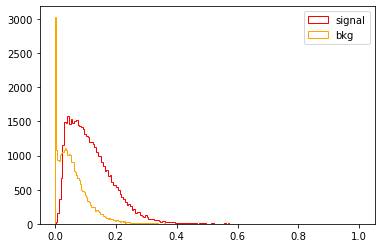

500GeV
lepton2_pt


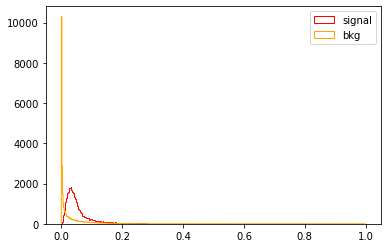

500GeV
lepton3_pt


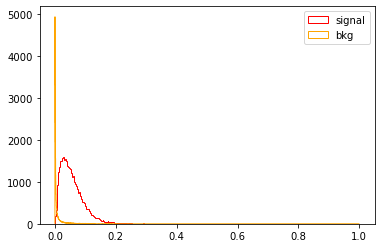

500GeV
lepton1_eta


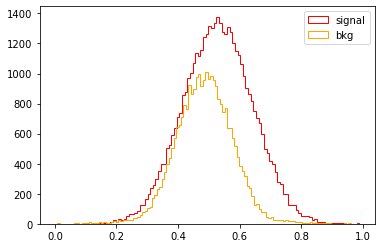

500GeV
lepton2_eta


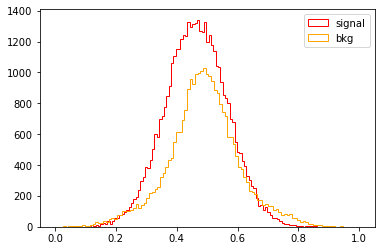

500GeV
lepton3_eta


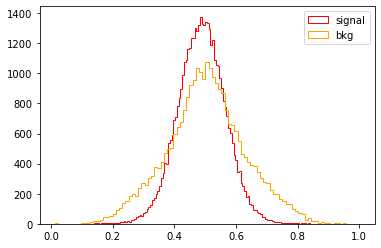

500GeV
lepton1_phi


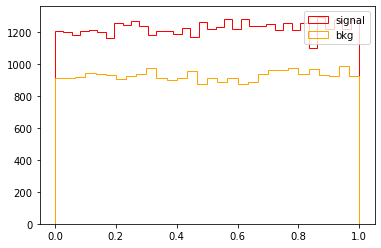

500GeV
lepton2_phi


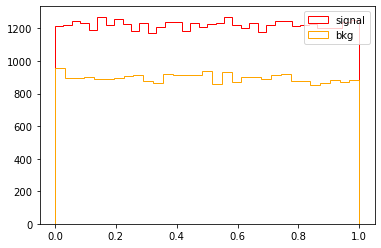

500GeV
lepton3_phi


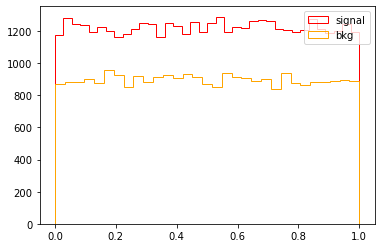

500GeV
MET


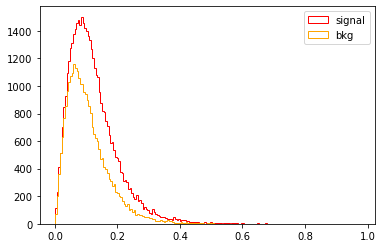

500GeV
MET_phi


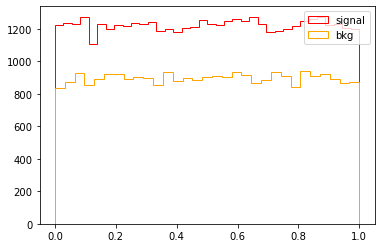

500GeV
lepton1_flavor


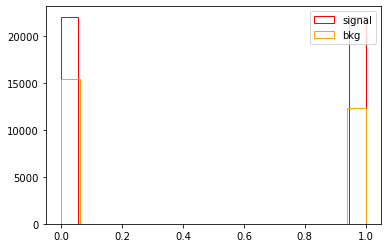

500GeV
lepton2_flavor


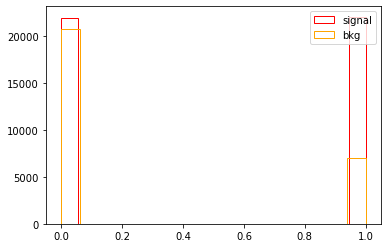

500GeV
lepton3_flavor


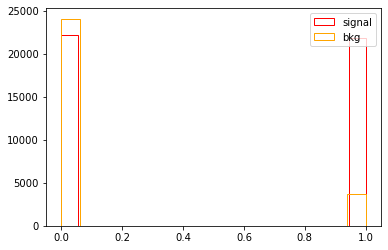

500GeV
lepton1_charge


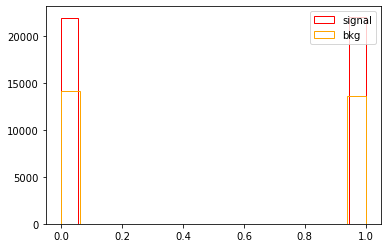

500GeV
lepton2_charge


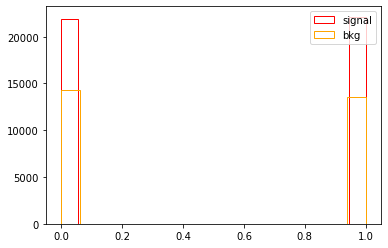

500GeV
lepton3_charge


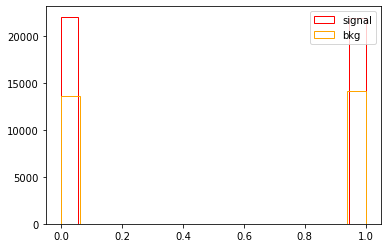

500GeV
visible_pt


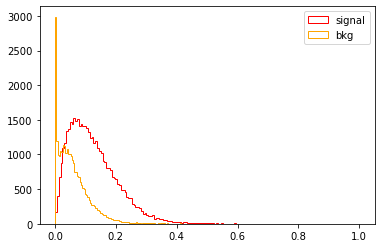

500GeV
transverse_mass


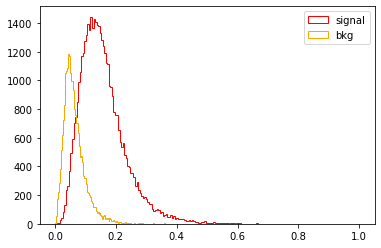

500GeV
dilep_mass


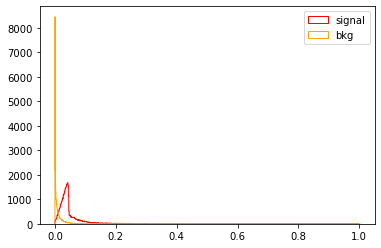

500GeV
dilep_DR


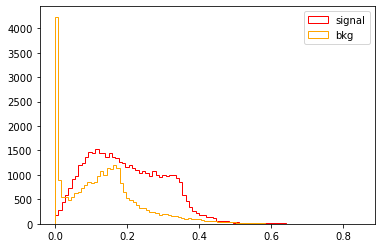

500GeV
signal


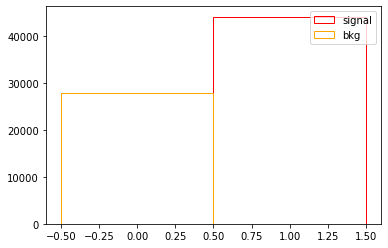

600GeV
lepton1_pt


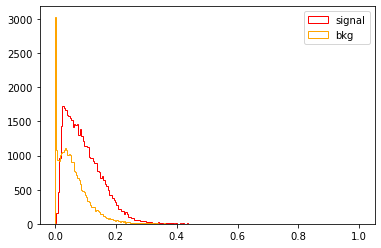

600GeV
lepton2_pt


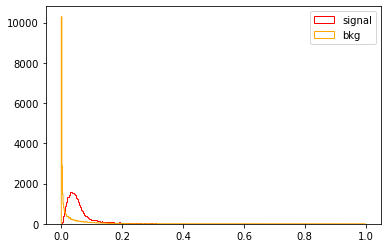

600GeV
lepton3_pt


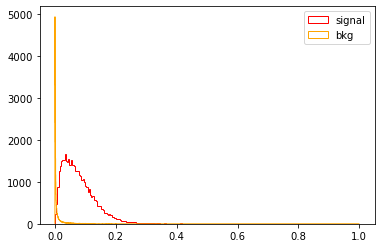

600GeV
lepton1_eta


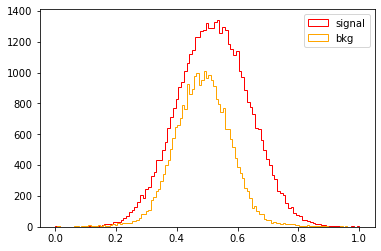

600GeV
lepton2_eta


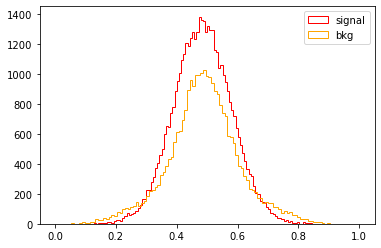

600GeV
lepton3_eta


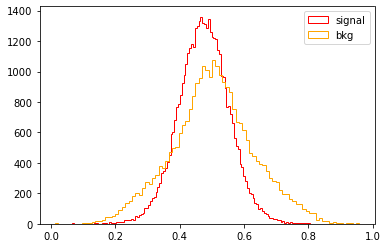

600GeV
lepton1_phi


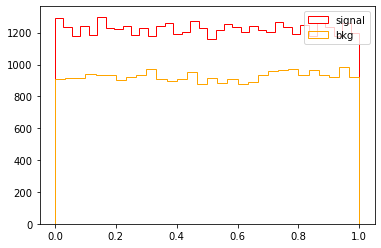

600GeV
lepton2_phi


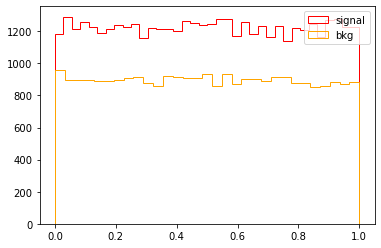

600GeV
lepton3_phi


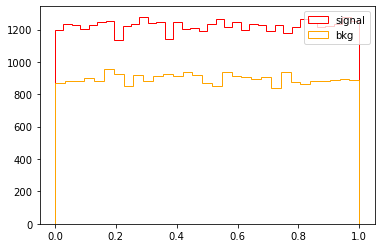

600GeV
MET


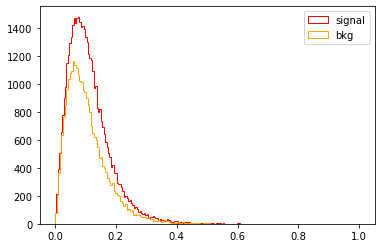

600GeV
MET_phi


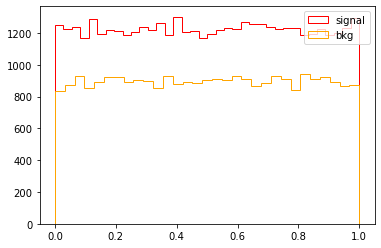

600GeV
lepton1_flavor


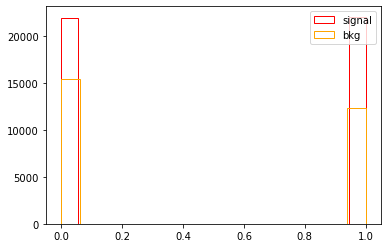

600GeV
lepton2_flavor


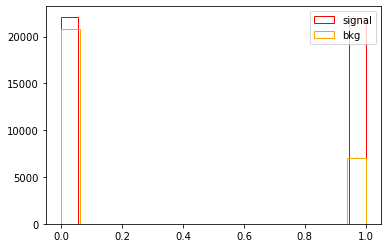

600GeV
lepton3_flavor


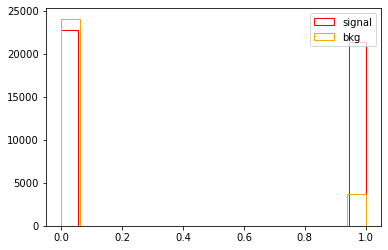

600GeV
lepton1_charge


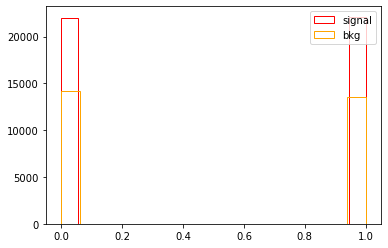

600GeV
lepton2_charge


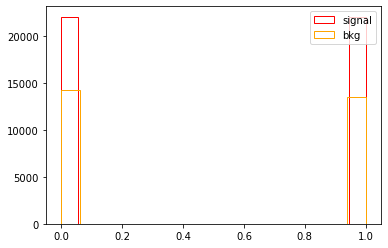

600GeV
lepton3_charge


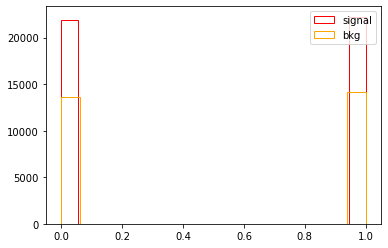

600GeV
visible_pt


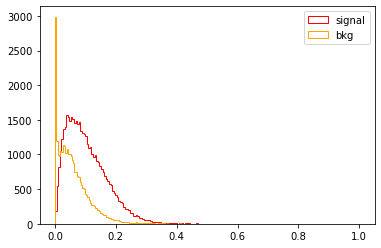

600GeV
transverse_mass


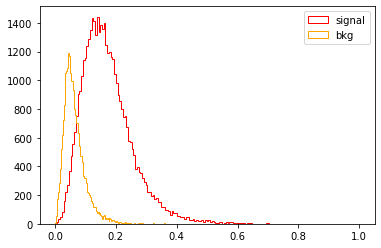

600GeV
dilep_mass


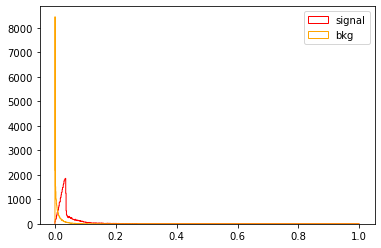

600GeV
dilep_DR


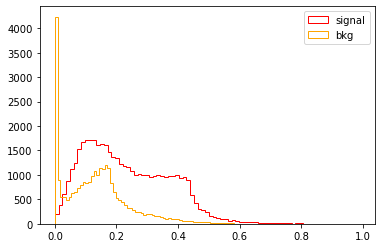

600GeV
signal


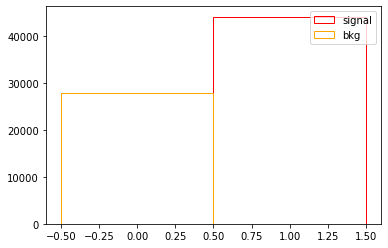

700GeV
lepton1_pt


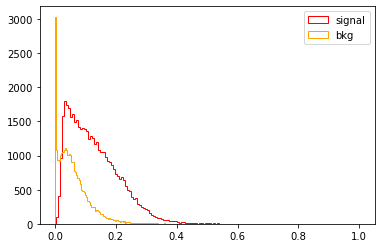

700GeV
lepton2_pt


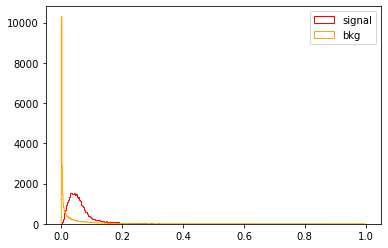

700GeV
lepton3_pt


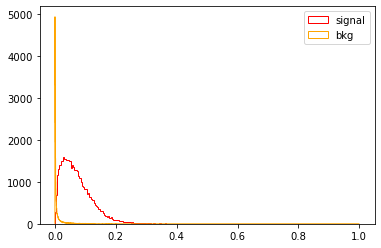

700GeV
lepton1_eta


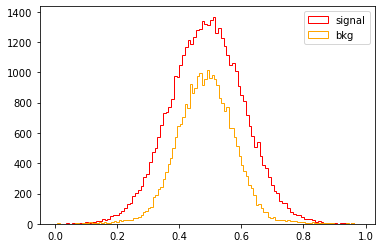

700GeV
lepton2_eta


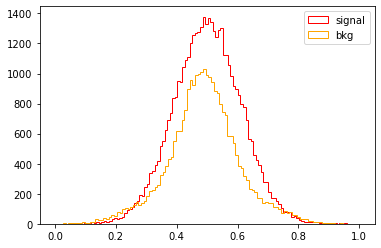

700GeV
lepton3_eta


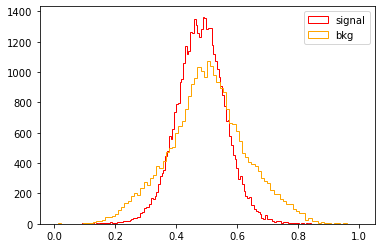

700GeV
lepton1_phi


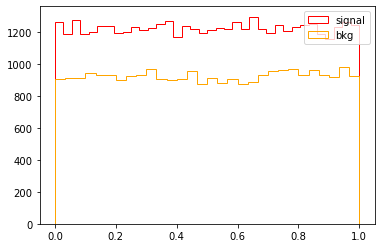

700GeV
lepton2_phi


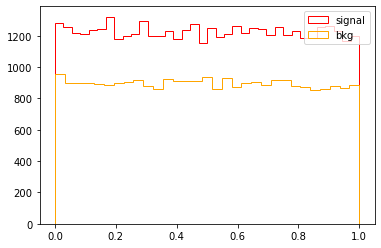

700GeV
lepton3_phi


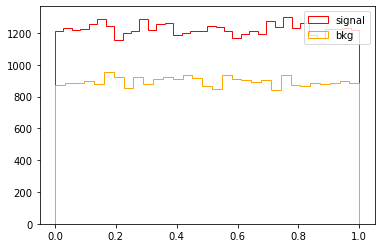

700GeV
MET


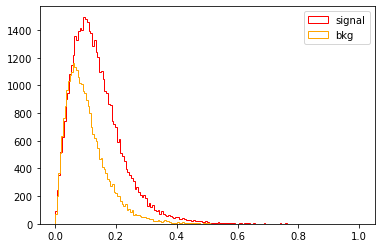

700GeV
MET_phi


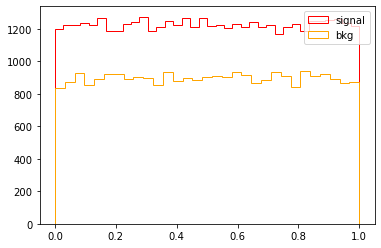

700GeV
lepton1_flavor


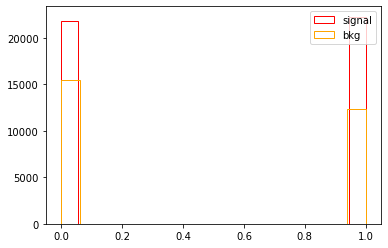

700GeV
lepton2_flavor


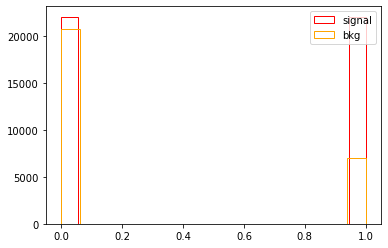

700GeV
lepton3_flavor


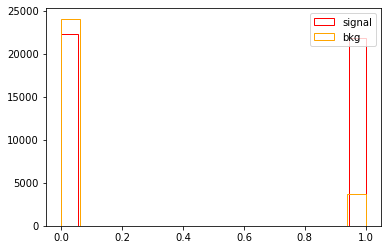

700GeV
lepton1_charge


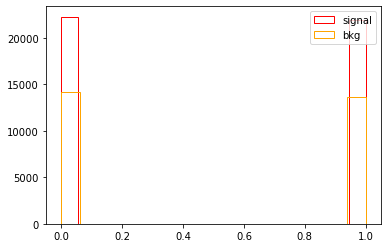

700GeV
lepton2_charge


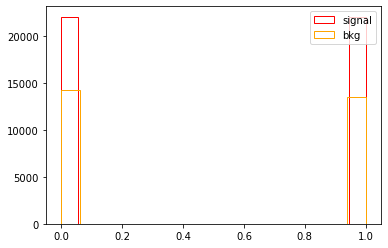

700GeV
lepton3_charge


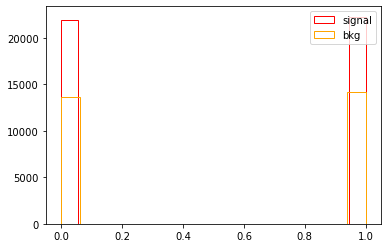

700GeV
visible_pt


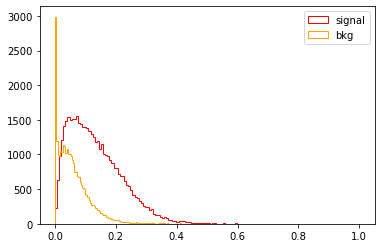

700GeV
transverse_mass


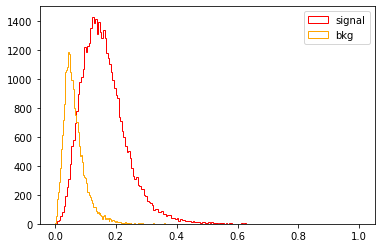

700GeV
dilep_mass


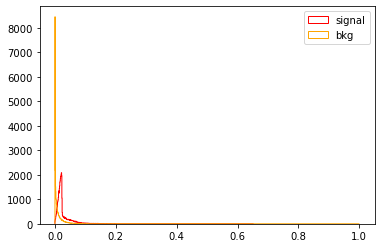

700GeV
dilep_DR


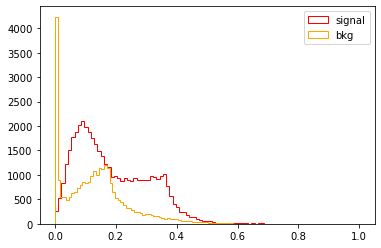

700GeV
signal


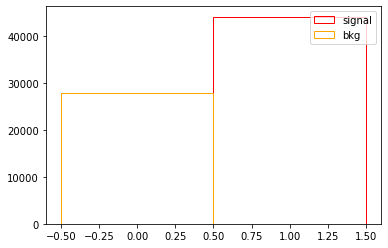

800GeV
lepton1_pt


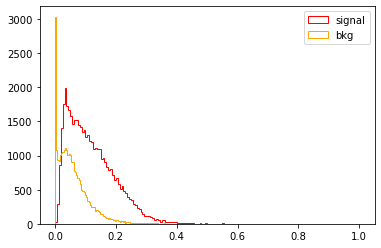

800GeV
lepton2_pt


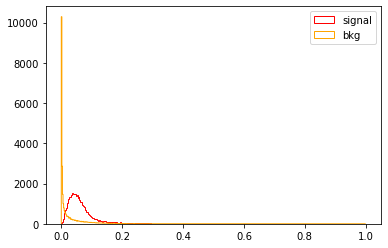

800GeV
lepton3_pt


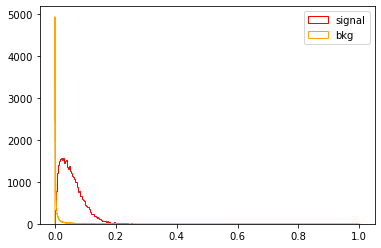

800GeV
lepton1_eta


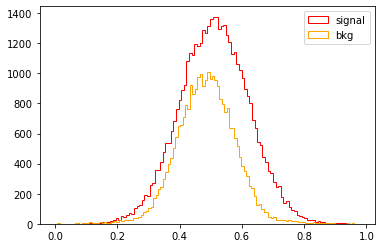

800GeV
lepton2_eta


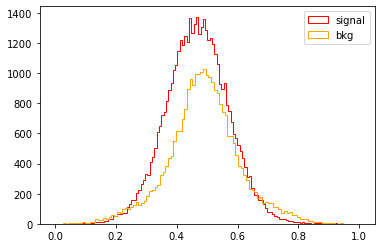

800GeV
lepton3_eta


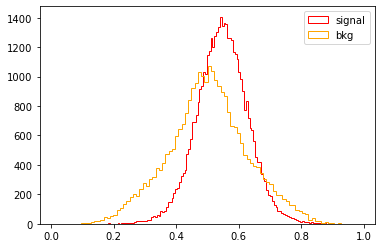

800GeV
lepton1_phi


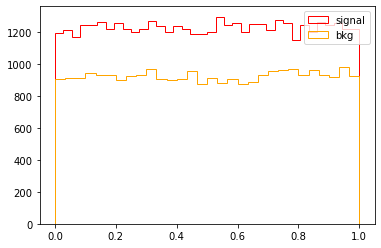

800GeV
lepton2_phi


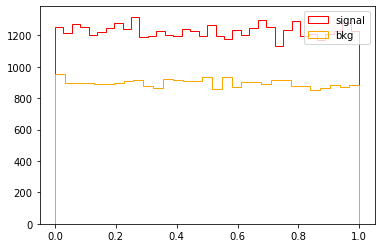

800GeV
lepton3_phi


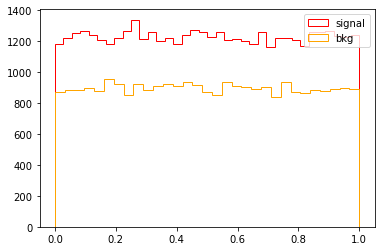

800GeV
MET


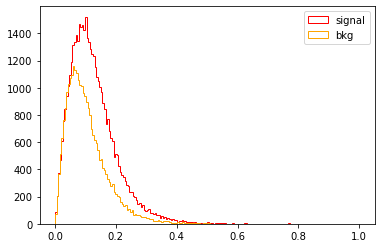

800GeV
MET_phi


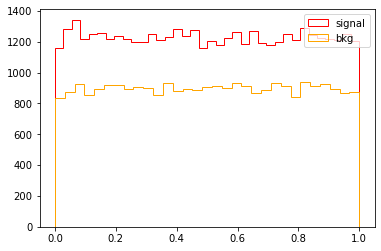

800GeV
lepton1_flavor


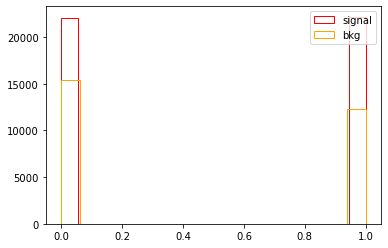

800GeV
lepton2_flavor


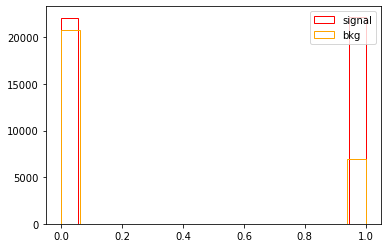

800GeV
lepton3_flavor


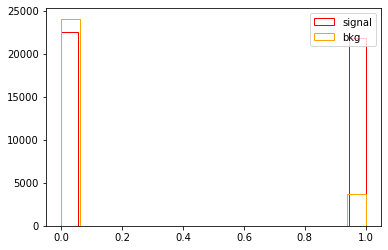

800GeV
lepton1_charge


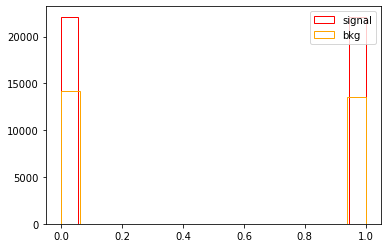

800GeV
lepton2_charge


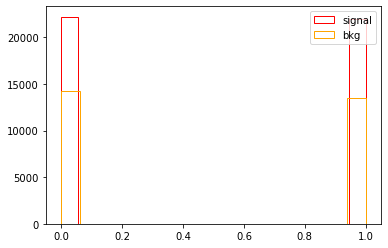

800GeV
lepton3_charge


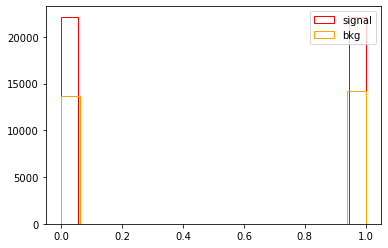

800GeV
visible_pt


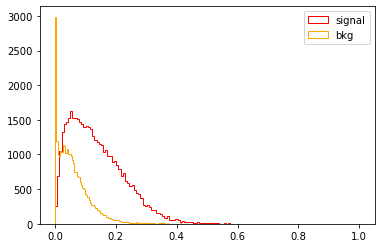

800GeV
transverse_mass


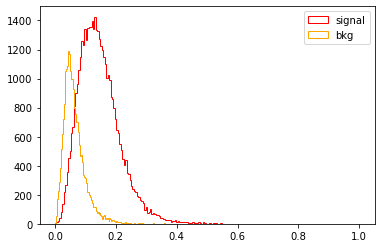

800GeV
dilep_mass


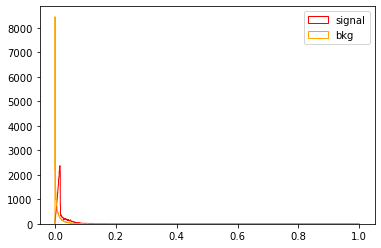

800GeV
dilep_DR


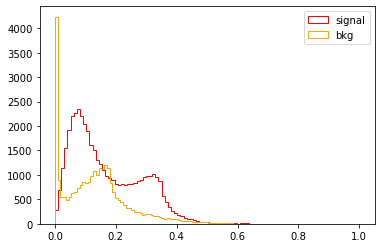

800GeV
signal


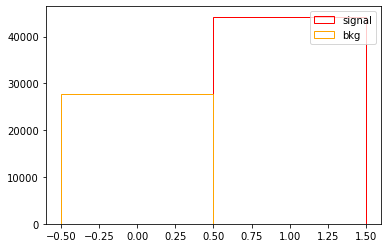

1000GeV
lepton1_pt


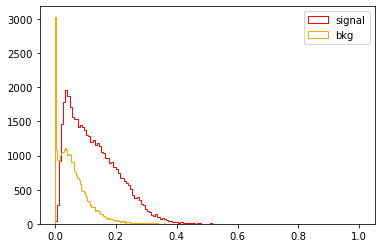

1000GeV
lepton2_pt


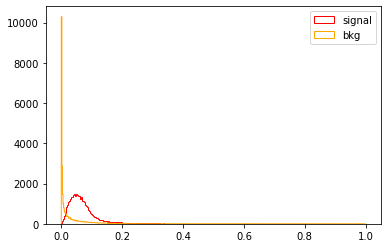

1000GeV
lepton3_pt


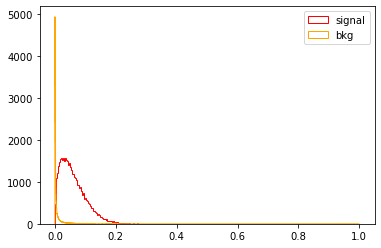

1000GeV
lepton1_eta


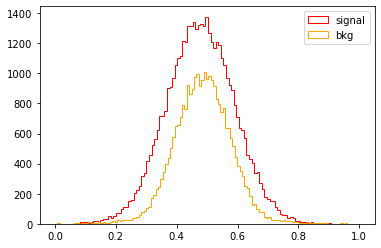

1000GeV
lepton2_eta


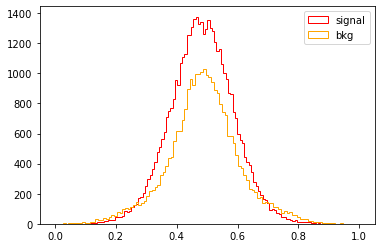

1000GeV
lepton3_eta


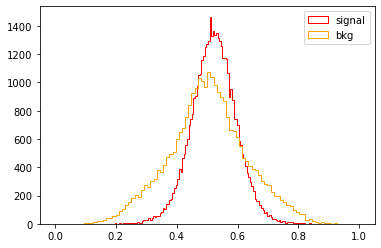

1000GeV
lepton1_phi


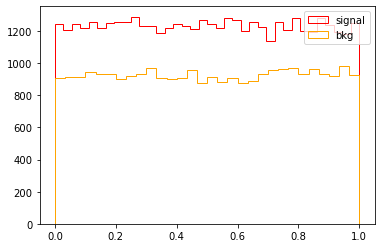

1000GeV
lepton2_phi


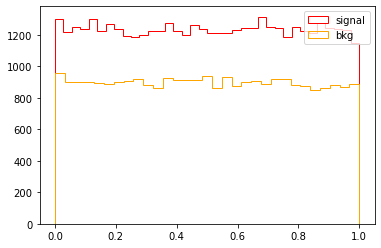

1000GeV
lepton3_phi


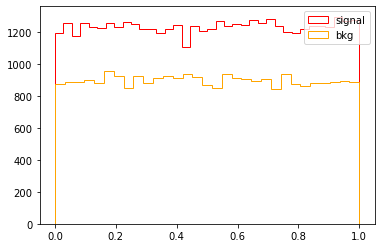

1000GeV
MET


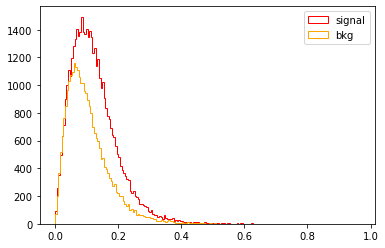

1000GeV
MET_phi


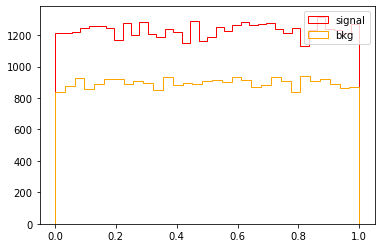

1000GeV
lepton1_flavor


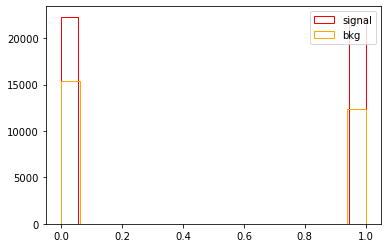

1000GeV
lepton2_flavor


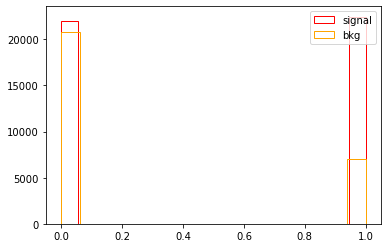

1000GeV
lepton3_flavor


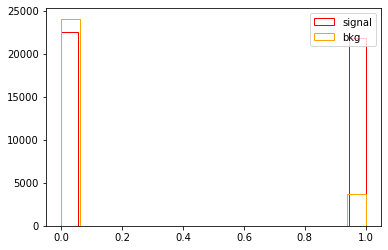

1000GeV
lepton1_charge


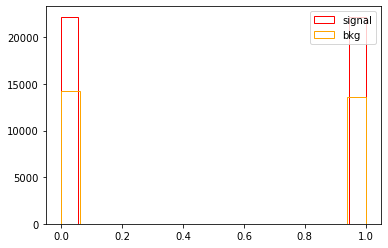

1000GeV
lepton2_charge


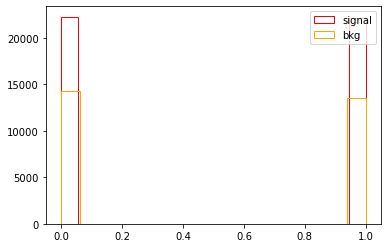

1000GeV
lepton3_charge


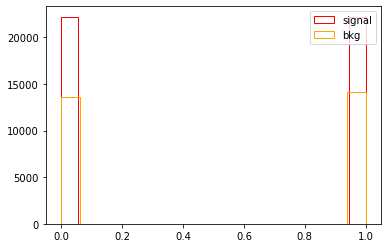

1000GeV
visible_pt


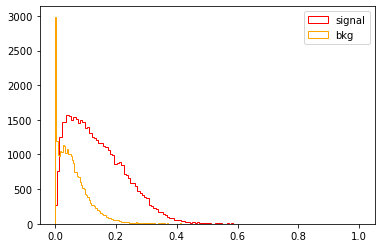

1000GeV
transverse_mass


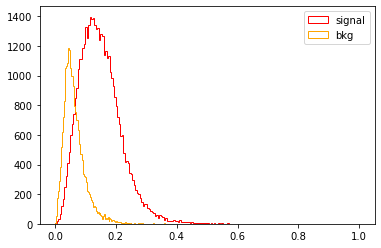

1000GeV
dilep_mass


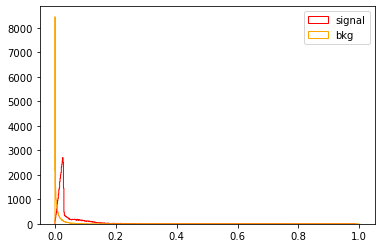

1000GeV
dilep_DR


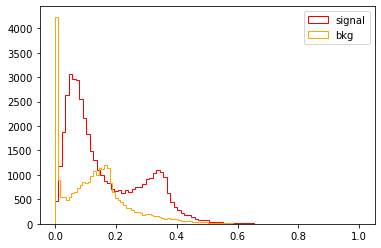

1000GeV
signal


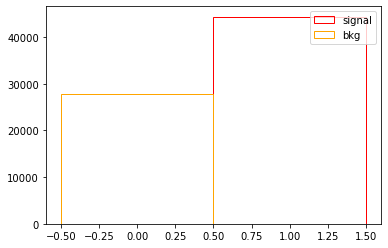

In [28]:
#Plot 50% of new df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
#        plt.hist(df_norm_sig[sig].iloc[:n_sig[sig]][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
#        plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.hist(df_norm_sig[sig].iloc[1::2][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[::2][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

500GeV
lepton1_pt


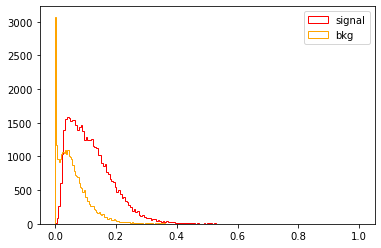

500GeV
lepton2_pt


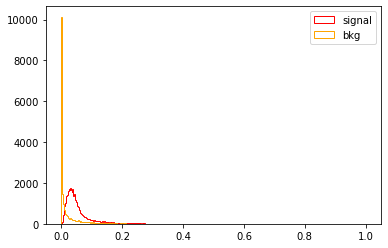

500GeV
lepton3_pt


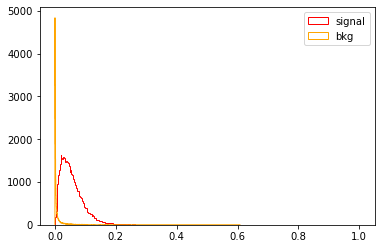

500GeV
lepton1_eta


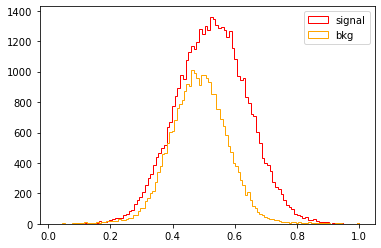

500GeV
lepton2_eta


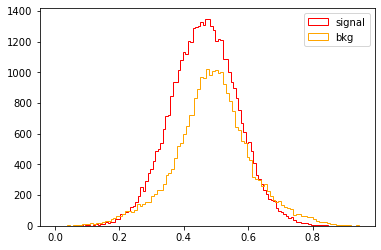

500GeV
lepton3_eta


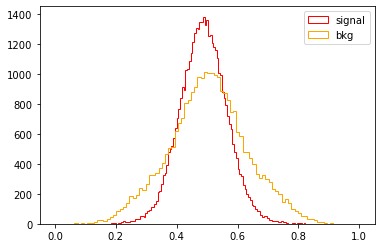

500GeV
lepton1_phi


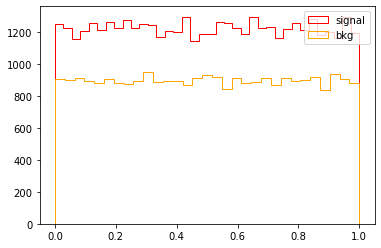

500GeV
lepton2_phi


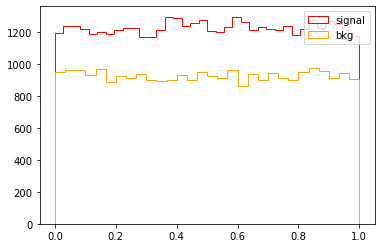

500GeV
lepton3_phi


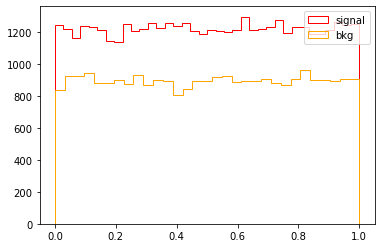

500GeV
MET


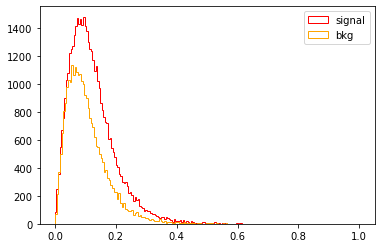

500GeV
MET_phi


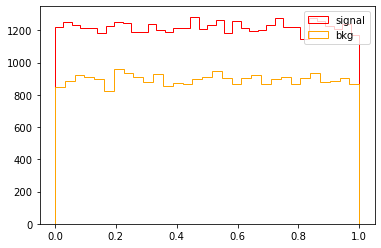

500GeV
lepton1_flavor


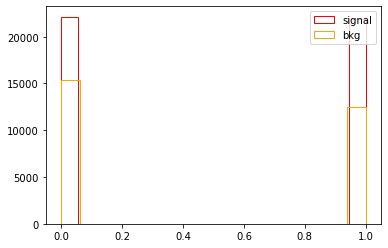

500GeV
lepton2_flavor


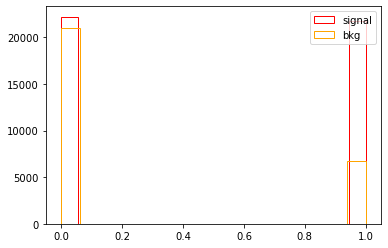

500GeV
lepton3_flavor


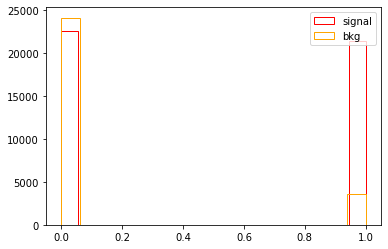

500GeV
lepton1_charge


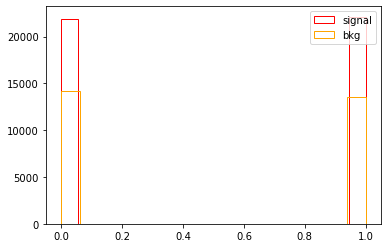

500GeV
lepton2_charge


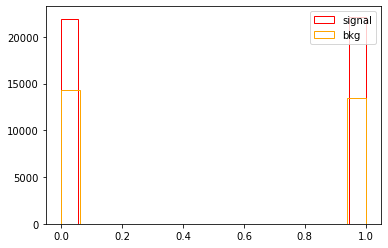

500GeV
lepton3_charge


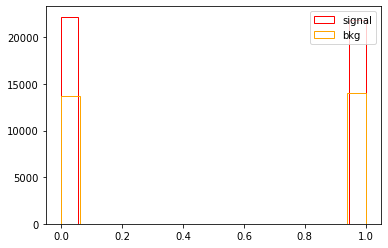

500GeV
visible_pt


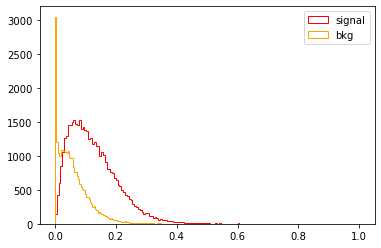

500GeV
transverse_mass


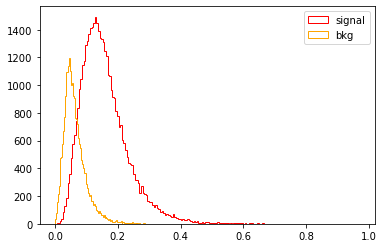

500GeV
dilep_mass


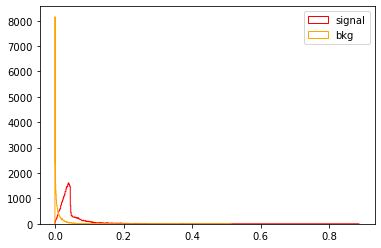

500GeV
dilep_DR


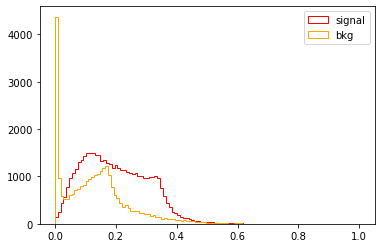

500GeV
signal


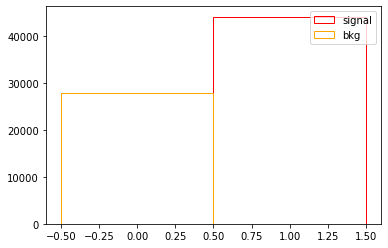

600GeV
lepton1_pt


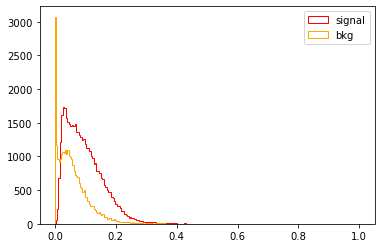

600GeV
lepton2_pt


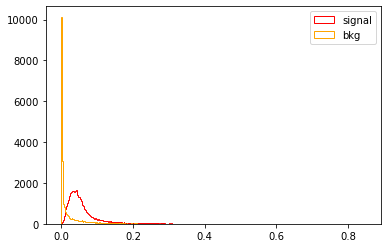

600GeV
lepton3_pt


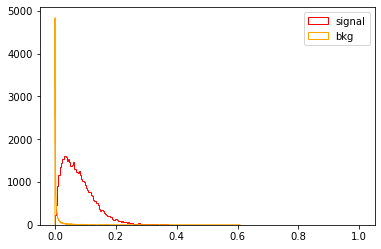

600GeV
lepton1_eta


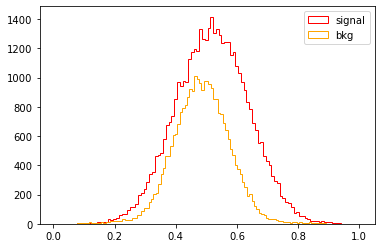

600GeV
lepton2_eta


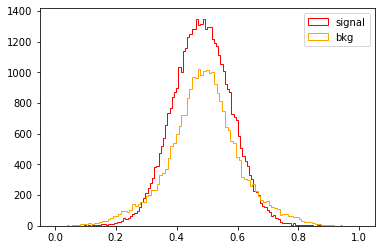

600GeV
lepton3_eta


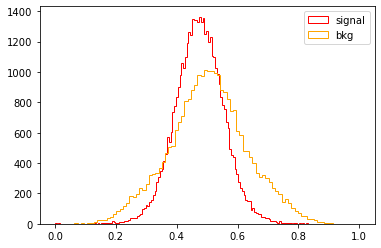

600GeV
lepton1_phi


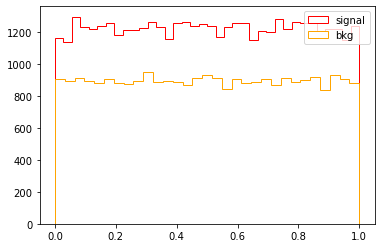

600GeV
lepton2_phi


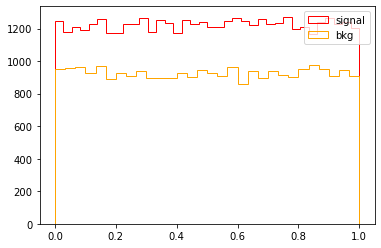

600GeV
lepton3_phi


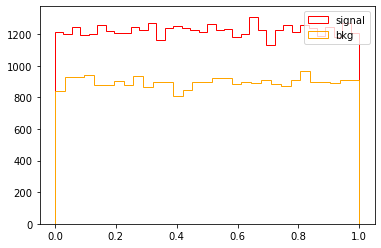

600GeV
MET


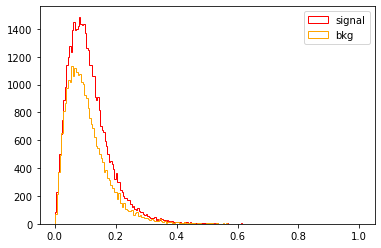

600GeV
MET_phi


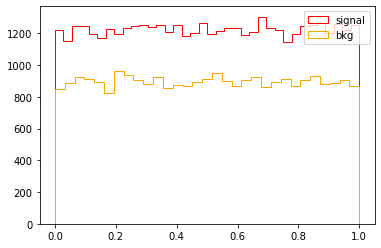

600GeV
lepton1_flavor


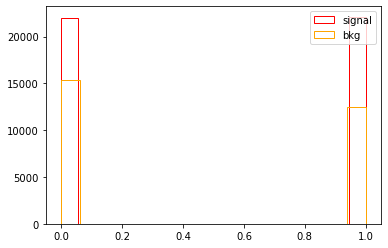

600GeV
lepton2_flavor


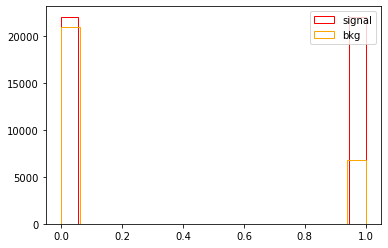

600GeV
lepton3_flavor


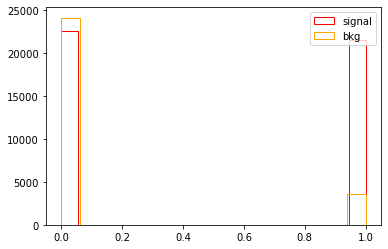

600GeV
lepton1_charge


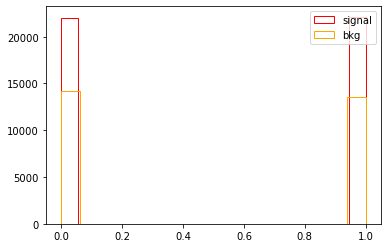

600GeV
lepton2_charge


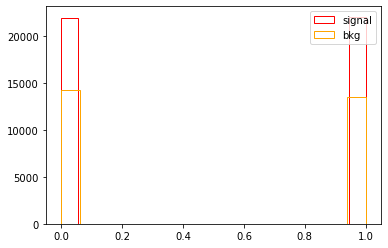

600GeV
lepton3_charge


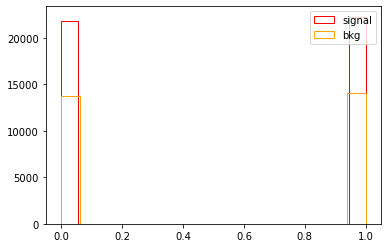

600GeV
visible_pt


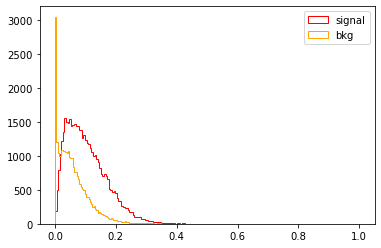

600GeV
transverse_mass


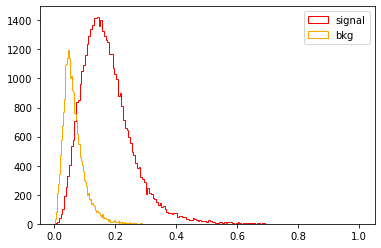

600GeV
dilep_mass


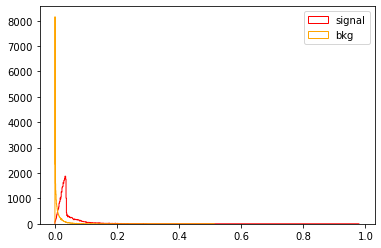

600GeV
dilep_DR


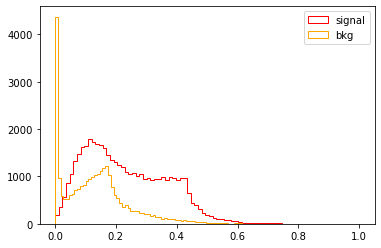

600GeV
signal


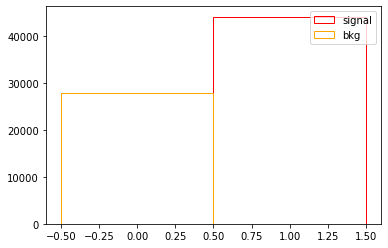

700GeV
lepton1_pt


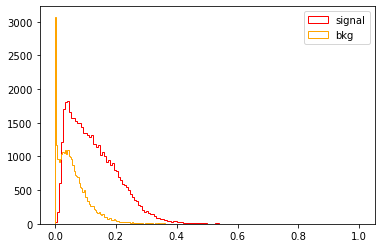

700GeV
lepton2_pt


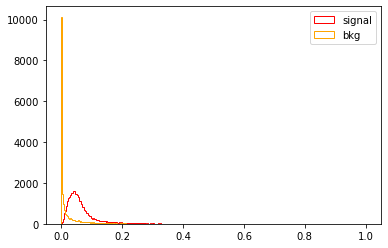

700GeV
lepton3_pt


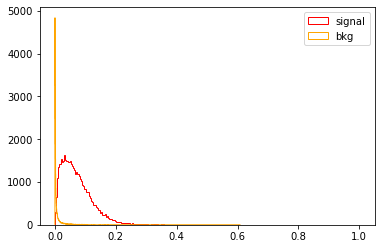

700GeV
lepton1_eta


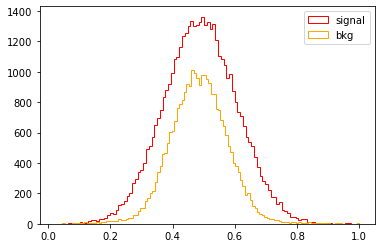

700GeV
lepton2_eta


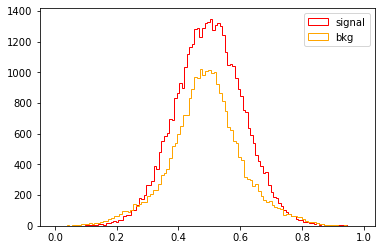

700GeV
lepton3_eta


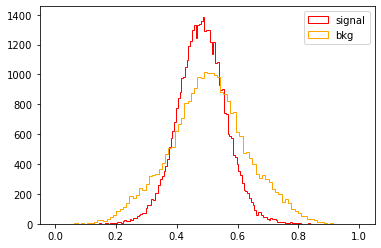

700GeV
lepton1_phi


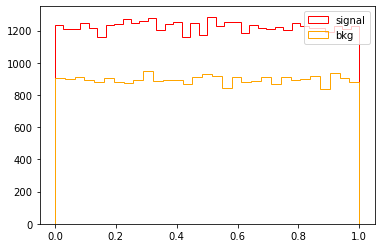

700GeV
lepton2_phi


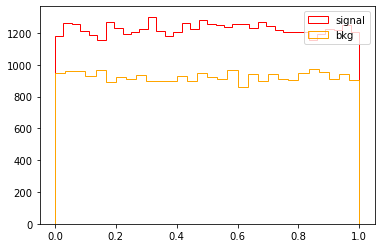

700GeV
lepton3_phi


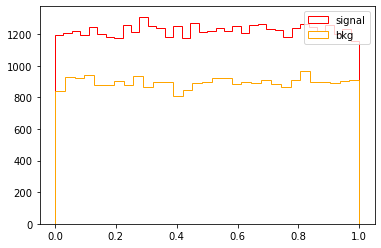

700GeV
MET


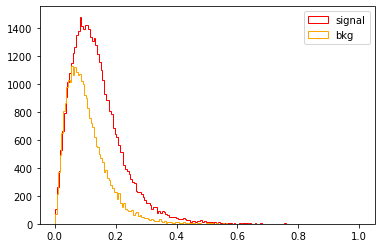

700GeV
MET_phi


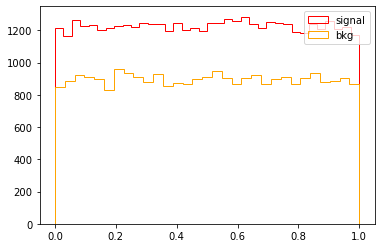

700GeV
lepton1_flavor


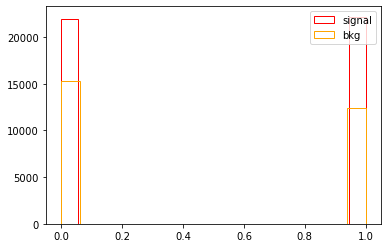

700GeV
lepton2_flavor


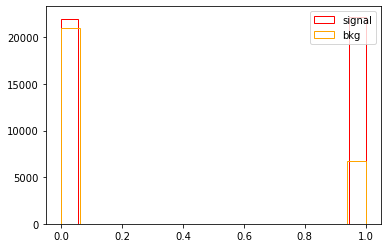

700GeV
lepton3_flavor


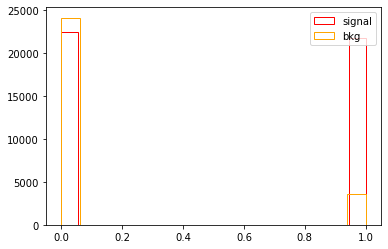

700GeV
lepton1_charge


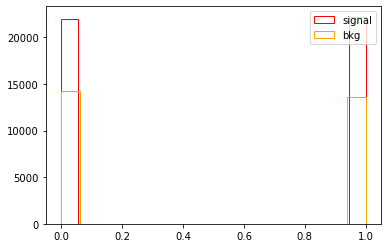

700GeV
lepton2_charge


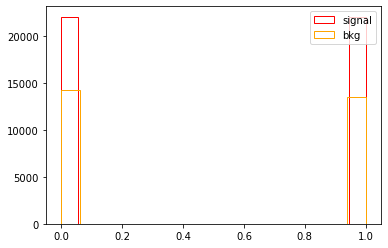

700GeV
lepton3_charge


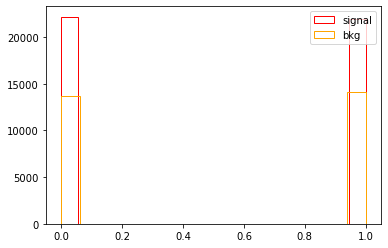

700GeV
visible_pt


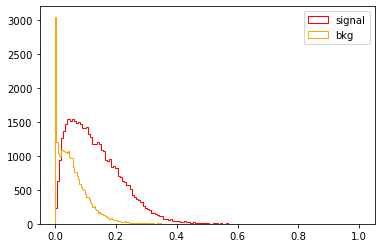

700GeV
transverse_mass


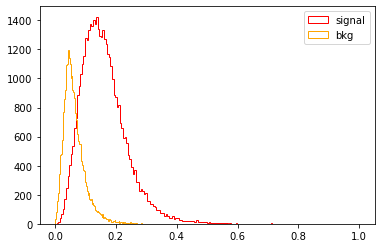

700GeV
dilep_mass


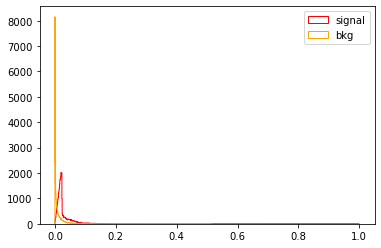

700GeV
dilep_DR


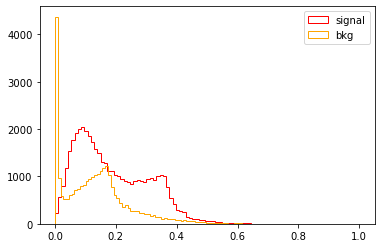

700GeV
signal


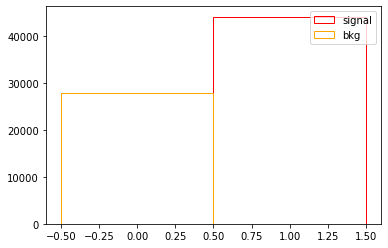

800GeV
lepton1_pt


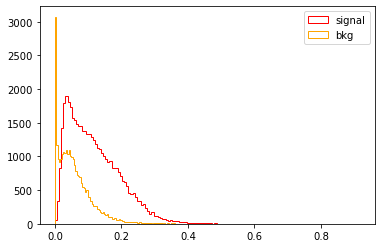

800GeV
lepton2_pt


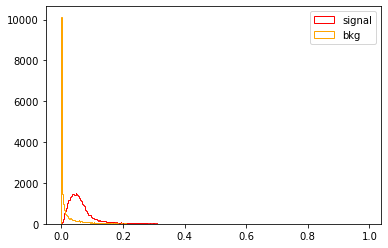

800GeV
lepton3_pt


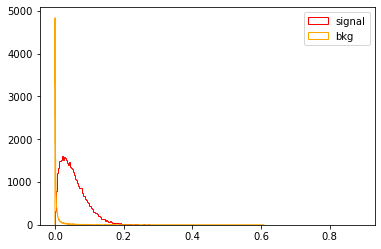

800GeV
lepton1_eta


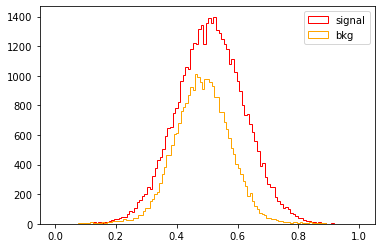

800GeV
lepton2_eta


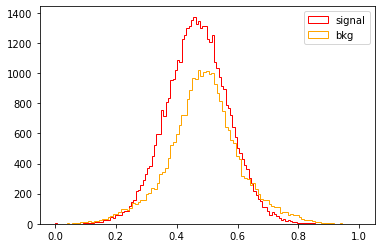

800GeV
lepton3_eta


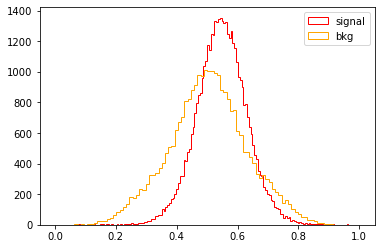

800GeV
lepton1_phi


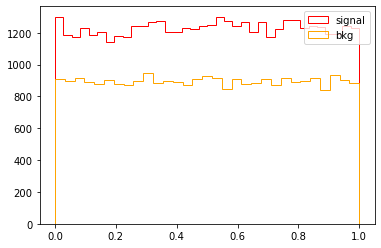

800GeV
lepton2_phi


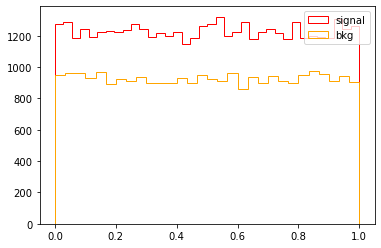

800GeV
lepton3_phi


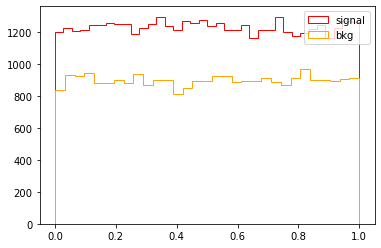

800GeV
MET


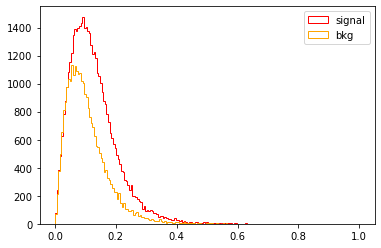

800GeV
MET_phi


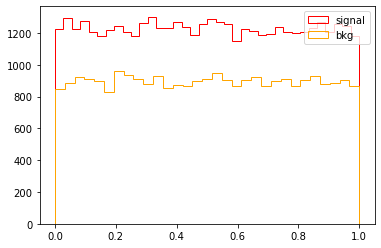

800GeV
lepton1_flavor


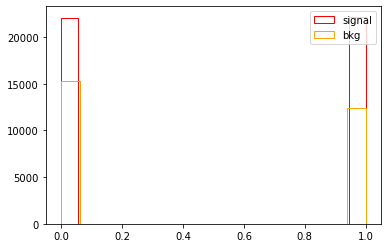

800GeV
lepton2_flavor


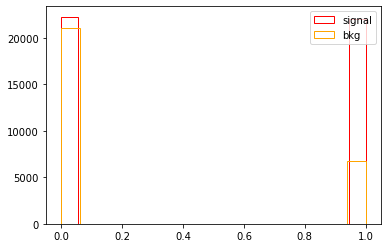

800GeV
lepton3_flavor


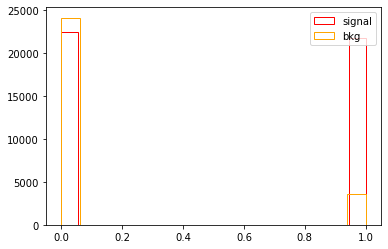

800GeV
lepton1_charge


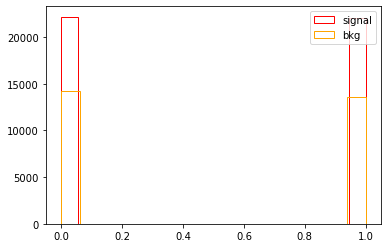

800GeV
lepton2_charge


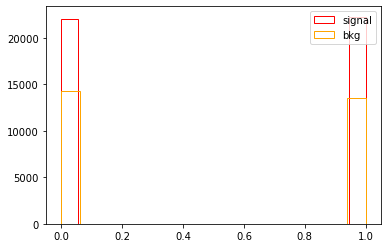

800GeV
lepton3_charge


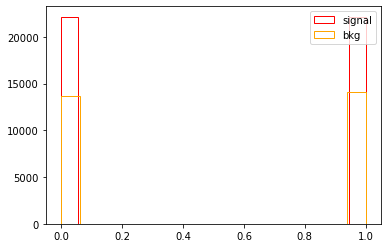

800GeV
visible_pt


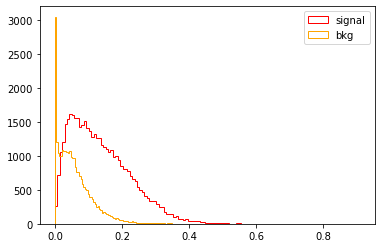

800GeV
transverse_mass


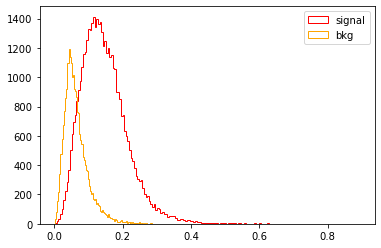

800GeV
dilep_mass


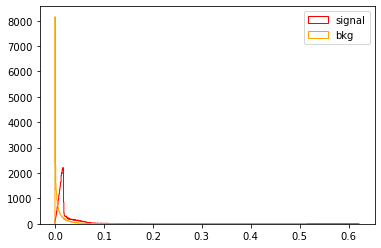

800GeV
dilep_DR


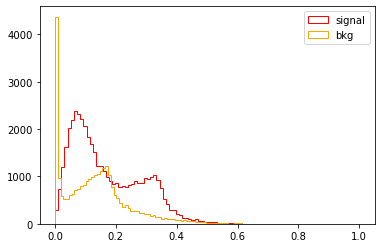

800GeV
signal


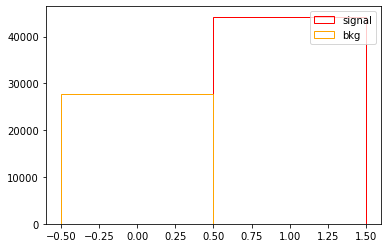

1000GeV
lepton1_pt


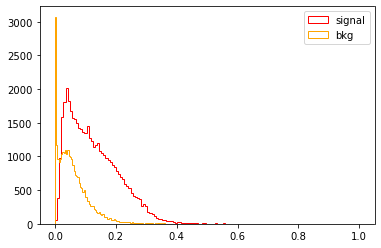

1000GeV
lepton2_pt


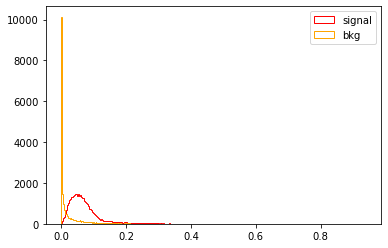

1000GeV
lepton3_pt


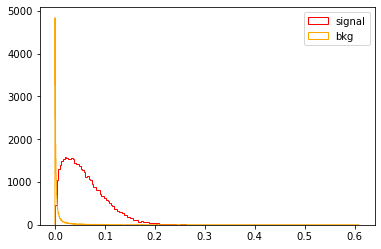

1000GeV
lepton1_eta


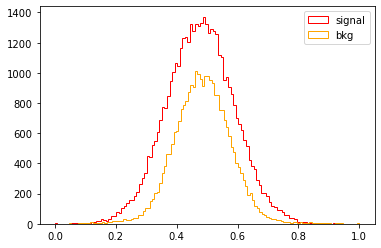

1000GeV
lepton2_eta


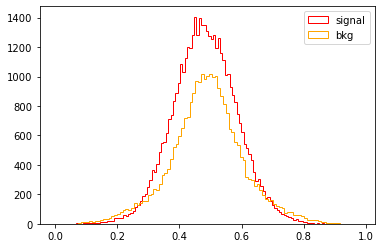

1000GeV
lepton3_eta


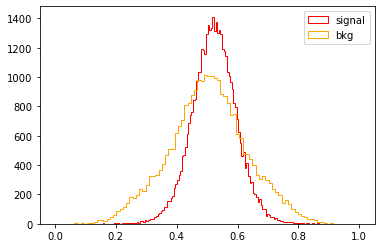

1000GeV
lepton1_phi


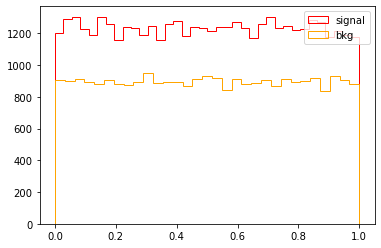

1000GeV
lepton2_phi


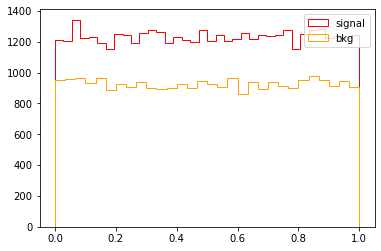

1000GeV
lepton3_phi


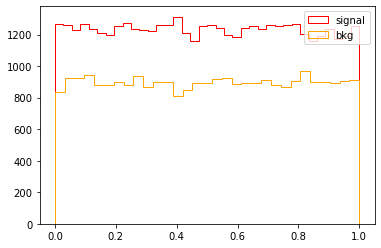

1000GeV
MET


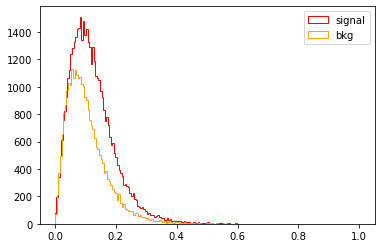

1000GeV
MET_phi


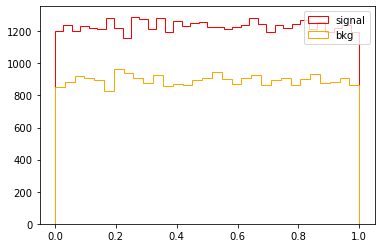

1000GeV
lepton1_flavor


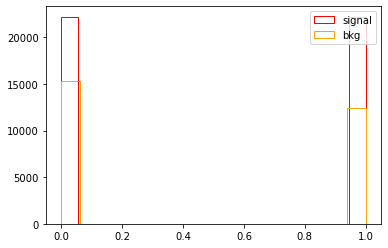

1000GeV
lepton2_flavor


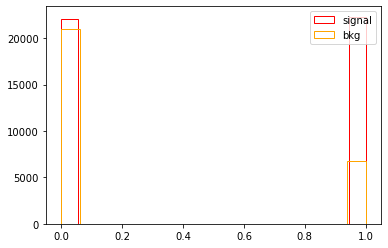

1000GeV
lepton3_flavor


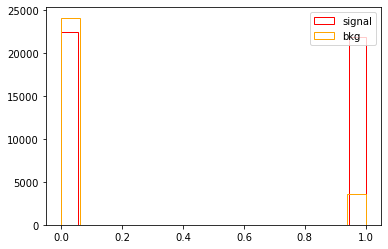

1000GeV
lepton1_charge


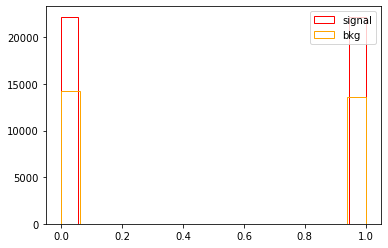

1000GeV
lepton2_charge


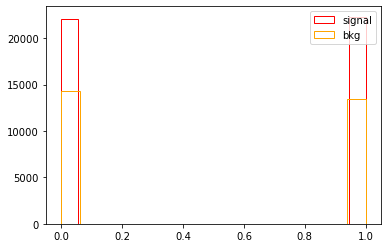

1000GeV
lepton3_charge


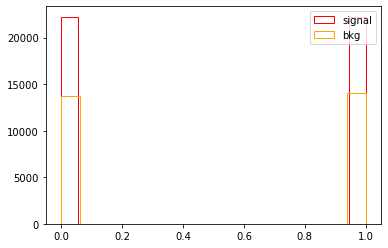

1000GeV
visible_pt


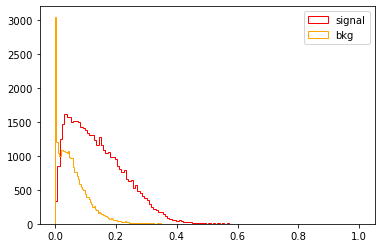

1000GeV
transverse_mass


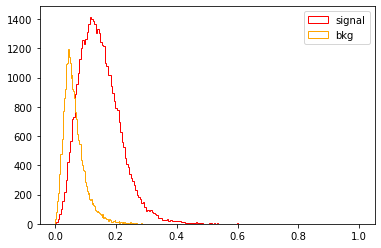

1000GeV
dilep_mass


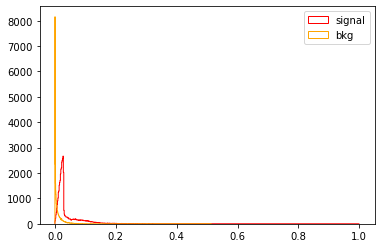

1000GeV
dilep_DR


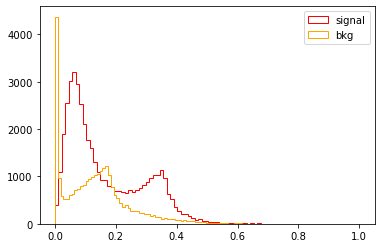

1000GeV
signal


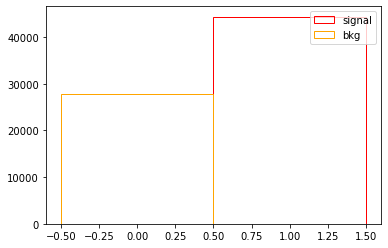

In [29]:
#Plot other 50% of df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[::2][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[1 ::2][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [30]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(71810, 17)
(71810,)
600GeV
(71866, 17)
(71866,)
700GeV
(71923, 17)
(71924,)
800GeV
(72026, 17)
(72026,)
1000GeV
(72171, 17)
(72172,)


In [31]:
x_train[0]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.077685    0.046007    0.028578     0.476173     0.484179   
1        0.104099    0.207954    0.168445     0.558085     0.575678   
2        0.094837    0.011884    0.018046     0.589079     0.563208   
3        0.235373    0.023087    0.044546     0.538934     0.414618   
4        0.116476    0.148123    0.000206     0.580054     0.639083   
...           ...         ...         ...          ...          ...   
71805    0.184657    0.045793    0.084609     0.566965     0.467368   
71806    0.030553    0.010378    0.020031     0.713099     0.343427   
71807    0.078407    0.006746    0.015021     0.448313     0.625462   
71808    0.075075    0.117276    0.016329     0.450816     0.512022   
71809    0.271258    0.102903    0.134908     0.464129     0.361543   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0         0.464731     0.483086     0.916299     0.321028  0.288642  0.977774   
1         0.582507     0.071739     0.028652     0.324254  0.078517  0.893814   
2         0.570851     0.192620     0.776948     0.776772  0.020157  0.472738   
3         0.480490     0.271382     0.159865     0.799351  0.038286  0.000080   
4         0.854060     0.465689     0.702939     0.045525  0.099863  0.235187   
...            ...          ...          ...          ...       ...       ...   
71805     0.312477     0.241332     0.204744     0.727123  0.121691  0.166808   
71806     0.445496     0.969394     0.702768     0.653476  0.096396  0.671116   
71807     0.577432     0.169875     0.564491     0.176274  0.088510  0.422539   
71808     0.480498     0.825959     0.796256     0.726414  0.013013  0.146828   
71809     0.467175     0.894626     0.938026     0.896683  0.400238  0.929180   

       lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                 1.0             0.0             1.0             0.0   
1                 1.0             1.0             1.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 1.0             1.0             1.0             1.0   
4                 1.0             1.0             0.0             0.0   
...               ...             ...             ...             ...   
71805             1.0             1.0             0.0             0.0   
71806             1.0             1.0             1.0             1.0   
71807             0.0             0.0             1.0             0.0   
71808             0.0             1.0             0.0             1.0   
71809             0.0             0.0             0.0             1.0   

       lepton2_charge  lepton3_charge  
0                 0.0             1.0  
1                 1.0             0.0  
2                 0.0             1.0  
3                 0.0             1.0  
4                 1.0             0.0  
...               ...             ...  
71805             1.0             0.0  
71806             0.0             0.0  
71807             1.0             1.0  
71808             0.0             0.0  
71809             0.0             0.0  

[71810 rows x 17 columns]

In [32]:
x_train[1]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.040538    0.020622    0.018036     0.558969     0.634878   
1        0.028939    0.010865    0.016413     0.535828     0.622498   
2        0.025075    0.001041    0.002056     0.463225     0.652475   
3        0.123298    0.026465    0.037187     0.655339     0.585949   
4        0.117350    0.030847    0.069434     0.603002     0.538567   
...           ...         ...         ...          ...          ...   
71861    0.039590    0.003887    0.001920     0.446272     0.528909   
71862    0.027591    0.019805    0.056086     0.478271     0.500804   
71863    0.046130    0.056081    0.010980     0.434981     0.340646   
71864    0.054044    0.034013    0.105215     0.577530     0.545311   
71865    0.022572    0.023741    0.028809     0.540597     0.484143   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0         0.430910     0.055179     0.355021     0.485040  0.192931  0.956363   
1         0.365711     0.025504     0.589158     0.075549  0.088800  0.806155   
2         0.653082     0.841661     0.807797     0.808302  0.151040  0.570916   
3         0.525326     0.557079     0.354842     0.871121  0.062753  0.446405   
4         0.514554     0.842476     0.475444     0.832616  0.336050  0.585385   
...            ...          ...          ...          ...       ...       ...   
71861     0.282554     0.906856     0.920138     0.516250  0.249251  0.882443   
71862     0.535290     0.252942     0.947188     0.549717  0.108869  0.505047   
71863     0.346678     0.013113     0.452241     0.880796  0.125642  0.592684   
71864     0.496434     0.067485     0.841268     0.557840  0.112149  0.636264   
71865     0.600404     0.530927     0.964388     0.183737  0.182872  0.674458   

       lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                 0.0             0.0             1.0             1.0   
1                 0.0             0.0             0.0             1.0   
2                 0.0             0.0             0.0             0.0   
3                 1.0             1.0             1.0             1.0   
4                 0.0             1.0             0.0             1.0   
...               ...             ...             ...             ...   
71861             0.0             0.0             0.0             1.0   
71862             0.0             0.0             0.0             0.0   
71863             0.0             1.0             0.0             0.0   
71864             1.0             1.0             1.0             1.0   
71865             1.0             1.0             1.0             1.0   

       lepton2_charge  lepton3_charge  
0                 0.0             1.0  
1                 0.0             0.0  
2                 1.0             0.0  
3                 0.0             0.0  
4                 1.0             0.0  
...               ...             ...  
71861             0.0             0.0  
71862             0.0             1.0  
71863             1.0             1.0  
71864             0.0             1.0  
71865             0.0             1.0  

[71866 rows x 17 columns]

In [33]:
x_train[2]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.098541    0.028945    0.034212     0.520322     0.588024   
1        0.007324    0.000386    0.000163     0.593833     0.696487   
2        0.096309    0.014571    0.012878     0.222657     0.364367   
3        0.204341    0.103621    0.209490     0.447803     0.617077   
4        0.011349    0.008886    0.013544     0.585044     0.513471   
...           ...         ...         ...          ...          ...   
71918    0.038818    0.066319    0.157840     0.283161     0.319582   
71919    0.229743    0.181309    0.123731     0.523403     0.803832   
71920    0.184107    0.141760    0.120555     0.593402     0.466598   
71921    0.123065    0.034998    0.078524     0.494525     0.537853   
71922    0.182844    0.032353    0.063231     0.385382     0.680028   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0         0.492649     0.748546     0.436119     0.744215  0.081930  0.922795   
1         0.694084     0.917233     0.162319     0.187174  0.301958  0.473782   
2         0.498354     0.919894     0.224378     0.095862  0.101612  0.813931   
3         0.451592     0.259580     0.217538     0.755350  0.194427  0.783572   
4         0.589048     0.225452     0.899051     0.256257  0.004102  0.933867   
...            ...          ...          ...          ...       ...       ...   
71918     0.442719     0.169028     0.903348     0.604344  0.108024  0.876940   
71919     0.498487     0.016980     0.343000     0.078805  0.053086  0.676635   
71920     0.528551     0.324082     0.710781     0.403493  0.143144  0.574612   
71921     0.392258     0.175891     0.290252     0.781053  0.103653  0.427998   
71922     0.423542     0.307271     0.655252     0.156654  0.224282  0.178479   

       lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                 1.0             1.0             1.0             1.0   
1                 0.0             0.0             0.0             1.0   
2                 1.0             1.0             1.0             0.0   
3                 1.0             0.0             0.0             0.0   
4                 1.0             0.0             1.0             1.0   
...               ...             ...             ...             ...   
71918             1.0             1.0             0.0             0.0   
71919             1.0             0.0             1.0             0.0   
71920             1.0             1.0             1.0             1.0   
71921             0.0             0.0             0.0             1.0   
71922             0.0             1.0             0.0             1.0   

       lepton2_charge  lepton3_charge  
0                 0.0             0.0  
1                 0.0             1.0  
2                 1.0             0.0  
3                 1.0             0.0  
4                 1.0             0.0  
...               ...             ...  
71918             1.0             1.0  
71919             1.0             1.0  
71920             1.0             0.0  
71921             0.0             0.0  
71922             1.0             0.0  

[71923 rows x 17 columns]

In [34]:
x_train[3]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.134586    0.000852    0.001328     0.535866     0.204767   
1        0.044186    0.000565    0.000305     0.544255     0.770199   
2        0.104064    0.000112    0.000139     0.537768     0.403054   
3        0.100498    0.025292    0.046730     0.766607     0.631585   
4        0.029210    0.055983    0.083069     0.519958     0.555681   
...           ...         ...         ...          ...          ...   
72021    0.145078    0.045748    0.053630     0.533736     0.375818   
72022    0.219853    0.045179    0.065196     0.496460     0.450671   
72023    0.184245    0.044032    0.042736     0.662769     0.397815   
72024    0.038932    0.028098    0.026629     0.547764     0.513423   
72025    0.001710    0.000801    0.000718     0.320133     0.483999   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0         0.238662     0.650853     0.245127     0.241349  0.177179  0.633554   
1         0.586050     0.560885     0.517396     0.017941  0.094446  0.919142   
2         0.380865     0.315479     0.596751     0.849352  0.058191  0.570262   
3         0.629351     0.753432     0.215099     0.788072  0.094470  0.156652   
4         0.566450     0.203247     0.645276     0.839755  0.107810  0.553426   
...            ...          ...          ...          ...       ...       ...   
72021     0.531572     0.736388     0.131977     0.645908  0.102134  0.043708   
72022     0.548996     0.503008     0.444785     0.863162  0.176012  0.883867   
72023     0.676830     0.851415     0.484146     0.931256  0.057353  0.378048   
72024     0.528127     0.522768     0.626760     0.636667  0.283965  0.422967   
72025     0.496798     0.973259     0.619027     0.620170  0.070139  0.309265   

       lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                 1.0             0.0             0.0             1.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 0.0             1.0             0.0             0.0   
4                 1.0             0.0             0.0             1.0   
...               ...             ...             ...             ...   
72021             0.0             1.0             0.0             1.0   
72022             0.0             0.0             0.0             1.0   
72023             1.0             0.0             1.0             0.0   
72024             1.0             0.0             1.0             1.0   
72025             0.0             0.0             0.0             0.0   

       lepton2_charge  lepton3_charge  
0                 1.0             0.0  
1                 1.0             0.0  
2                 1.0             0.0  
3                 1.0             1.0  
4                 1.0             0.0  
...               ...             ...  
72021             0.0             0.0  
72022             0.0             1.0  
72023             1.0             1.0  
72024             1.0             0.0  
72025             1.0             0.0  

[72026 rows x 17 columns]

In [35]:
x_train[4]

lepton1_pt  lepton2_pt  lepton3_pt  lepton1_eta  lepton2_eta  \
0        0.051286    0.117210    0.034278     0.553275     0.435468   
1        0.023082    0.000908    0.000330     0.461915     0.465936   
2        0.028940    0.000578    0.000445     0.357230     0.573734   
3        0.009678    0.000210    0.000392     0.582253     0.398940   
4        0.080361    0.154798    0.169702     0.180383     0.380622   
...           ...         ...         ...          ...          ...   
72166    0.178484    0.064873    0.092740     0.519745     0.551836   
72167    0.187481    0.053883    0.056462     0.416671     0.734670   
72168    0.124451    0.089712    0.022856     0.362789     0.377518   
72169    0.041208    0.070990    0.001308     0.436370     0.576965   
72170    0.001491    0.001591    0.002414     0.545196     0.554101   

       lepton3_eta  lepton1_phi  lepton2_phi  lepton3_phi       MET   MET_phi  \
0         0.452694     0.097840     0.442768     0.419874  0.051170  0.128255   
1         0.359418     0.644780     0.753905     0.473030  0.201729  0.515979   
2         0.571482     0.089486     0.792249     0.735303  0.075910  0.407945   
3         0.420008     0.985129     0.382958     0.391662  0.054155  0.414034   
4         0.525312     0.037975     0.975078     0.570517  0.073717  0.516584   
...            ...          ...          ...          ...       ...       ...   
72166     0.518616     0.335666     0.317054     0.875703  0.100881  0.883331   
72167     0.469884     0.621799     0.390894     0.521642  0.117965  0.178723   
72168     0.631311     0.843322     0.874466     0.396008  0.045752  0.607838   
72169     0.665176     0.052953     0.111356     0.588068  0.139691  0.454869   
72170     0.305740     0.346891     0.178245     0.299966  0.100251  0.873273   

       lepton1_flavor  lepton2_flavor  lepton3_flavor  lepton1_charge  \
0                 1.0             0.0             0.0             0.0   
1                 0.0             0.0             0.0             0.0   
2                 1.0             0.0             0.0             0.0   
3                 0.0             0.0             0.0             0.0   
4                 1.0             0.0             1.0             1.0   
...               ...             ...             ...             ...   
72166             0.0             0.0             0.0             0.0   
72167             1.0             1.0             1.0             1.0   
72168             1.0             1.0             1.0             1.0   
72169             1.0             1.0             0.0             1.0   
72170             0.0             0.0             0.0             1.0   

       lepton2_charge  lepton3_charge  
0                 0.0             1.0  
1                 0.0             1.0  
2                 0.0             1.0  
3                 1.0             0.0  
4                 1.0             0.0  
...               ...             ...  
72166             1.0             0.0  
72167             0.0             0.0  
72168             0.0             0.0  
72169             0.0             1.0  
72170             0.0             1.0  

[72171 rows x 17 columns]

In [36]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

In [37]:
model_500 = DefineModel(x_train[0])
model_600 = DefineModel(x_train[1])
model_700 = DefineModel(x_train[2])
model_800 = DefineModel(x_train[3])
model_1000 = DefineModel(x_train[4])

In [38]:
model = [model_500,model_600,model_700,model_800,model_1000]

In [39]:
for mod in range(len(model)):
    model[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                396       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                828       
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                2664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                2628      
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0

In [40]:
model[0].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[0].summary()

model[1].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[1].summary()

model[2].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[2].summary()

model[3].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[3].summary()

model[4].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[4].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                396       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                828       
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                2664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                2628      
_________________________________________________________________
dropout_2 (Dropout)          (None, 36)                0

In [41]:
history = ['history_500','history_600','history_700','history_800','history_1000']
epochs = [20,30,20,20,20]

In [42]:
for i in range(len(history)):
    history[i] = NetworkLoop(x_train[i], y_train[i], x_test[i], y_test[i], model[i],mass_points[i], epochs=20)


 500GeV 

Epoch 1/20
562/562 [==============================] - 3s 5ms/step - loss: 0.5265 - accuracy: 0.7781 - val_loss: 0.4217 - val_accuracy: 0.8650
Epoch 2/20
562/562 [==============================] - 2s 4ms/step - loss: 0.3944 - accuracy: 0.8738 - val_loss: 0.2979 - val_accuracy: 0.8957
Epoch 3/20
562/562 [==============================] - 2s 4ms/step - loss: 0.3263 - accuracy: 0.8933 - val_loss: 0.2869 - val_accuracy: 0.9040
Epoch 4/20
562/562 [==============================] - 2s 4ms/step - loss: 0.3098 - accuracy: 0.8975 - val_loss: 0.2714 - val_accuracy: 0.9011
Epoch 5/20
562/562 [==============================] - 2s 4ms/step - loss: 0.2973 - accuracy: 0.8989 - val_loss: 0.2415 - val_accuracy: 0.9114
Epoch 6/20
562/562 [==============================] - 2s 4ms/step - loss: 0.2885 - accuracy: 0.8999 - val_loss: 0.2429 - val_accuracy: 0.9114
Epoch 7/20
562/562 [==============================] - 2s 4ms/step - loss: 0.2834 - accuracy: 0.9007 - val_loss: 0.2364 - val_accuracy: 0.

562/562 [==============================] - 2s 4ms/step - loss: 0.2561 - accuracy: 0.9078 - val_loss: 0.2256 - val_accuracy: 0.9165
Epoch 19/20
562/562 [==============================] - 2s 4ms/step - loss: 0.2541 - accuracy: 0.9094 - val_loss: 0.2267 - val_accuracy: 0.9158
Epoch 20/20
562/562 [==============================] - 2s 4ms/step - loss: 0.2523 - accuracy: 0.9093 - val_loss: 0.2273 - val_accuracy: 0.9161

 800GeV 

Epoch 1/20
563/563 [==============================] - 3s 5ms/step - loss: 0.5208 - accuracy: 0.7749 - val_loss: 0.3878 - val_accuracy: 0.8611
Epoch 2/20
563/563 [==============================] - 2s 4ms/step - loss: 0.3867 - accuracy: 0.8673 - val_loss: 0.3164 - val_accuracy: 0.8851
Epoch 3/20
563/563 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.8800 - val_loss: 0.3154 - val_accuracy: 0.8790
Epoch 4/20
563/563 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.8826 - val_loss: 0.2852 - val_accuracy: 0.8956
Epoc

In [43]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV
2245/2245 [==============================] - 2s 1ms/step - loss: 0.2426 - accuracy: 0.9106
600GeV
2246/2246 [==============================] - 2s 1ms/step - loss: 0.2220 - accuracy: 0.9178
700GeV
2248/2248 [==============================] - 2s 1ms/step - loss: 0.2273 - accuracy: 0.9161
800GeV
2251/2251 [==============================] - 2s 1ms/step - loss: 0.2488 - accuracy: 0.9008
1000GeV
2256/2256 [==============================] - 2s 981us/step - loss: 0.2621 - accuracy: 0.9017


In [44]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [45]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

500GeV
44029.0
44029.0
[1. 0. 1. ... 1. 1. 1.]


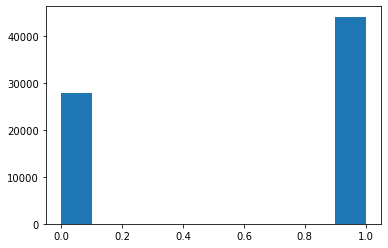

600GeV
44085.0
44085.0
[0. 0. 1. ... 1. 0. 1.]


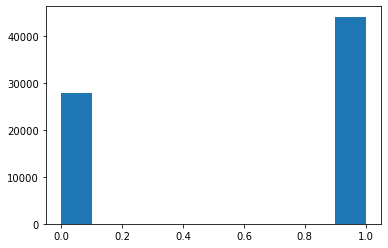

700GeV
44142.0
44143.0
[1. 1. 1. ... 0. 0. 1.]


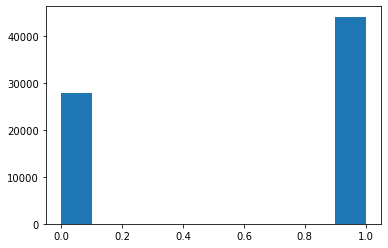

800GeV
44245.0
44245.0
[0. 1. 1. ... 0. 0. 0.]


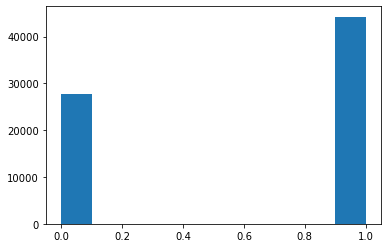

1000GeV
44390.0
44391.0
[1. 0. 1. ... 1. 1. 0.]


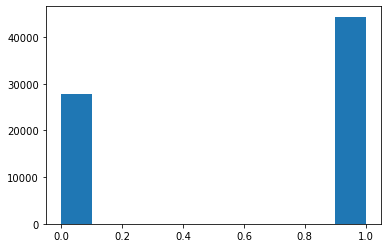

In [46]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    print (y_train[y].sum())
    print (y_test[y].sum())
    
    plt.figure()
    print (y_test[y].values)
    plt.hist(y_test[y])
    plt.show()

In [47]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

500GeV
[0.9986577  0.02360213 0.95515674 ... 0.99811757 0.99588263 0.9790096 ]


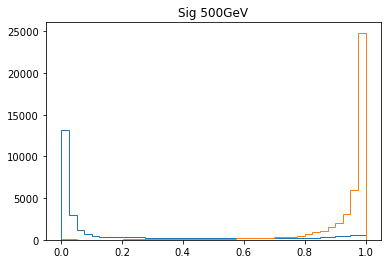

600GeV
[5.7715178e-04 6.9656742e-01 8.4746563e-01 ... 9.6165615e-01 5.9891927e-01
 9.7460479e-01]


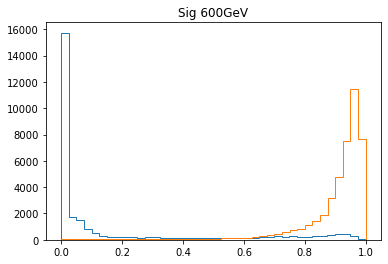

700GeV
[0.9896783  0.9183029  0.98292184 ... 0.00914142 0.01964286 0.86457646]


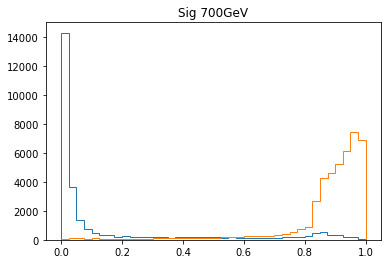

800GeV
[0.22273535 0.9148538  0.8049351  ... 0.00517923 0.00785524 0.03385004]


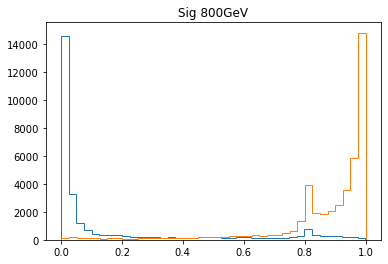

1000GeV
[8.78908575e-01 3.30538452e-02 9.75404739e-01 ... 9.58890736e-01
 9.97391343e-01 1.10210836e-04]


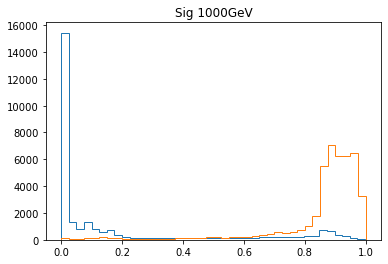

In [48]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

500GeV
[0.9986577  0.02360213 0.95515674 ... 0.99811757 0.99588263 0.9790096 ]


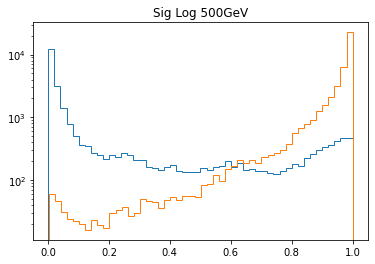

600GeV
[5.7715178e-04 6.9656742e-01 8.4746563e-01 ... 9.6165615e-01 5.9891927e-01
 9.7460479e-01]


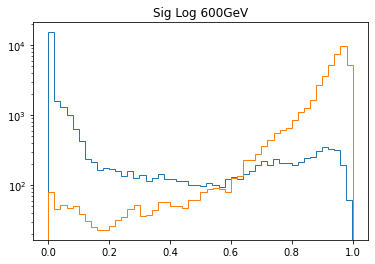

700GeV
[0.9896783  0.9183029  0.98292184 ... 0.00914142 0.01964286 0.86457646]


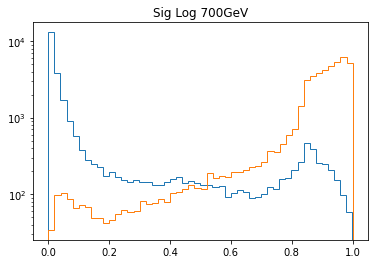

800GeV
[0.22273535 0.9148538  0.8049351  ... 0.00517923 0.00785524 0.03385004]


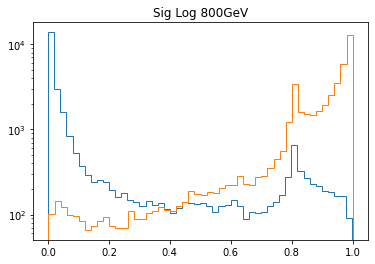

1000GeV
[8.78908575e-01 3.30538452e-02 9.75404739e-01 ... 9.58890736e-01
 9.97391343e-01 1.10210836e-04]


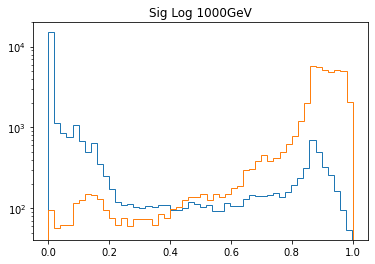

In [49]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()

In [50]:
import scipy.integrate
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])

500GeV
[0.9986577  0.02360213 0.95515674 ... 0.99811757 0.99588263 0.9790096 ]
600GeV
[5.7715178e-04 6.9656742e-01 8.4746563e-01 ... 9.6165615e-01 5.9891927e-01
 9.7460479e-01]
700GeV
[0.9896783  0.9183029  0.98292184 ... 0.00914142 0.01964286 0.86457646]
800GeV
[0.22273535 0.9148538  0.8049351  ... 0.00517923 0.00785524 0.03385004]
1000GeV
[8.78908575e-01 3.30538452e-02 9.75404739e-01 ... 9.58890736e-01
 9.97391343e-01 1.10210836e-04]


In [51]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [99990,99990,99992,99993,100000]
nevents_sig_passed = [88058,88170,88285,88490,88781]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (55562/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

74563223.13350497
1055
557
308
177
64


500GeV
[0.9986577  0.02360213 0.95515674 ... 0.99811757 0.99588263 0.9790096 ]


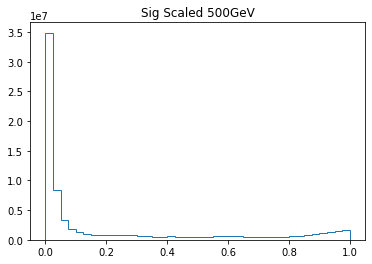

600GeV
[5.7715178e-04 6.9656742e-01 8.4746563e-01 ... 9.6165615e-01 5.9891927e-01
 9.7460479e-01]


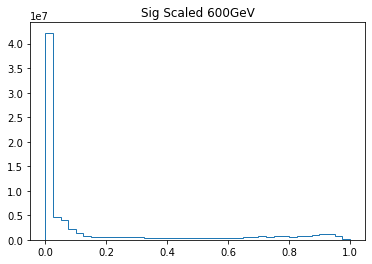

700GeV
[0.9896783  0.9183029  0.98292184 ... 0.00914142 0.01964286 0.86457646]


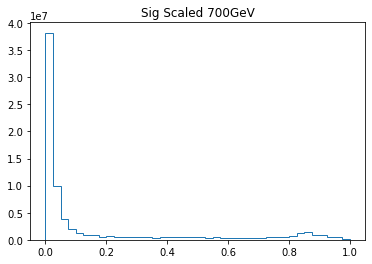

800GeV
[0.22273535 0.9148538  0.8049351  ... 0.00517923 0.00785524 0.03385004]


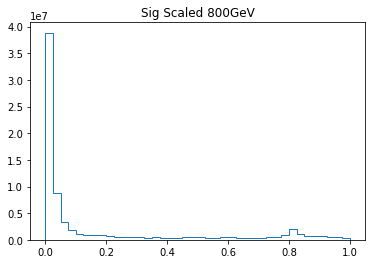

1000GeV
[8.78908575e-01 3.30538452e-02 9.75404739e-01 ... 9.58890736e-01
 9.97391343e-01 1.10210836e-04]


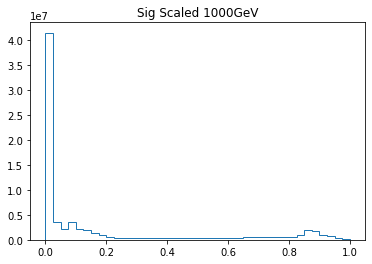

In [52]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig Scaled '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

500GeV
[0.9986577  0.02360213 0.95515674 ... 0.99811757 0.99588263 0.9790096 ]
1055 44029 0.023961479933680075 0.023961479933680075 1054.9999999990503


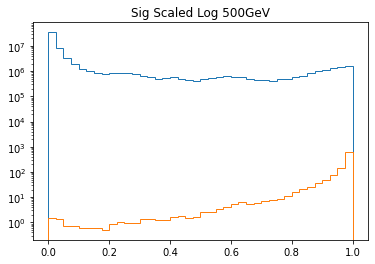

600GeV
[5.7715178e-04 6.9656742e-01 8.4746563e-01 ... 9.6165615e-01 5.9891927e-01
 9.7460479e-01]
557 44085 0.01263468299875241 0.01263468299875241 556.9999999997515


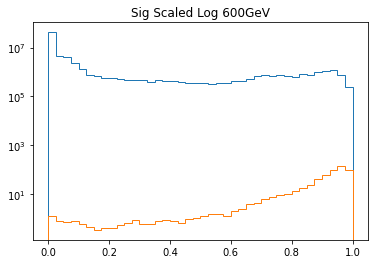

700GeV
[0.9896783  0.9183029  0.98292184 ... 0.00914142 0.01964286 0.86457646]
308 44143 0.00697732369798156 0.00697732369798156 307.9999999999896


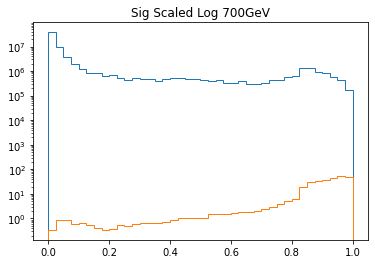

800GeV
[0.22273535 0.9148538  0.8049351  ... 0.00517923 0.00785524 0.03385004]
177 44245 0.004000452028477794 0.004000452028477794 176.9999999998438


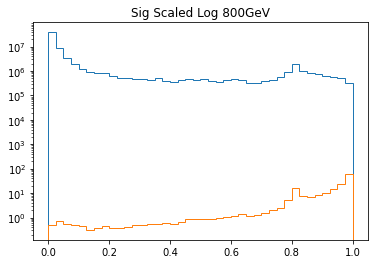

1000GeV
[8.78908575e-01 3.30538452e-02 9.75404739e-01 ... 9.58890736e-01
 9.97391343e-01 1.10210836e-04]
64 44391 0.001441733684755919 0.001441733684755919 64.00000000004069


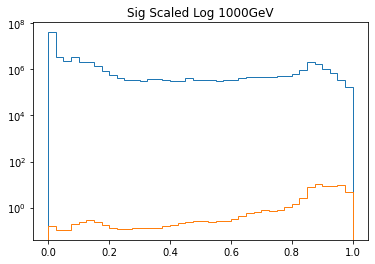

In [53]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.title('Sig Scaled Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [54]:
'''TO-DO: get nsig/srqt(bkg)
Select only events above .9 and throw everything else.'''

for y in range(len(y_predict)):
    print(mass_points[y])
#    Classifier_testing_S_sorted = []
    Classifier_testing_S_sorted = sorted(Classifier_testing_S[y])
    index90 = int(.1*len(Classifier_testing_S_sorted))
    print ('fraction of signal =', 1-float(index90)/len(Classifier_testing_S_sorted), '; 90% of Scaled Signal Events =',int((1-float(index90)/len(Classifier_testing_S_sorted))*n_sig_scaled[y]))
    cut90 = Classifier_testing_S_sorted[index90]
    print (cut90)
    count90 = 0
    for b in Classifier_testing_B[y]:
        if b > cut90:
            count90 += 1
    bkgeff90 = count90/len(Classifier_testing_B[y])
    print ('fraction of bkg =', bkgeff90, 'Scaled bkg events*bkg efficiency =', int(7476183*bkgeff90), '\n')

'''    index65 = int(.35*len(Classifier_testing_S_sorted))
    print ('fraction of signal =', 1-float(index65)/len(Classifier_testing_S_sorted), '; 65% of Scaled Signal Events =',int((1-float(index65)/len(Classifier_testing_S_sorted))*n_sig_scaled[y]))
    cut65 = Classifier_testing_S_sorted[index65]
    print (cut65)
    count65 = 0
    for b in Classifier_testing_B[y]:
        if b > cut65:
            count65 += 1
    bkgeff65 = count65/len(Classifier_testing_B[y])
    print ('fraction of bkg =', bkgeff65, 'Scaled bkg events*bkg efficiency =', int(7476183*bkgeff65), '\n')'''

500GeV
fraction of signal = 0.9000204410729292 ; 90% of Scaled Signal Events = 949
0.8205348
fraction of bkg = 0.10780749433065764 Scaled bkg events*bkg efficiency = 805988 

600GeV
fraction of signal = 0.9000113417262108 ; 90% of Scaled Signal Events = 501
0.7769624
fraction of bkg = 0.09697275116086534 Scaled bkg events*bkg efficiency = 724986 

700GeV
fraction of signal = 0.9000067960945111 ; 90% of Scaled Signal Events = 277
0.74064547
fraction of bkg = 0.09988841294409849 Scaled bkg events*bkg efficiency = 746784 

800GeV
fraction of signal = 0.9000113007119448 ; 90% of Scaled Signal Events = 159
0.66638374
fraction of bkg = 0.12501349843418164 Scaled bkg events*bkg efficiency = 934623 

1000GeV
fraction of signal = 0.9000022527088825 ; 90% of Scaled Signal Events = 57
0.7001324
fraction of bkg = 0.1285410892336489 Scaled bkg events*bkg efficiency = 960996 



"    index65 = int(.35*len(Classifier_testing_S_sorted))\n    print ('fraction of signal =', 1-float(index65)/len(Classifier_testing_S_sorted), '; 65% of Scaled Signal Events =',int((1-float(index65)/len(Classifier_testing_S_sorted))*n_sig_scaled[y]))\n    cut65 = Classifier_testing_S_sorted[index65]\n    print (cut65)\n    count65 = 0\n    for b in Classifier_testing_B[y]:\n        if b > cut65:\n            count65 += 1\n    bkgeff65 = count65/len(Classifier_testing_B[y])\n    print ('fraction of bkg =', bkgeff65, 'Scaled bkg events*bkg efficiency =', int(7476183*bkgeff65), '\n')"

In [55]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [56]:
'''def find_bin_idx_of_value(bins, value):
    """Finds the bin which the value corresponds to."""
    array = np.asarray(value)
    idx = np.digitize(array,bins)
    print (idx-1, value)
    return idx-1

def area_after_val(counts, bins, val):
    """Calculates the area of the hist after a certain value"""
    left_bin_edge_index = find_bin_idx_of_value(bins, val)
    bin_width = np.diff(bins)[0]
    area = sum(bin_width * counts[left_bin_edge_index:])
    print (area, val)
    return area

def add_area_line_to_plot(axes, counts, bins, val):
    """Adds a vertical line and labels it with the value and area after that line"""
    area = area_after_val(counts, bins, val)
    axes.axvline(val, color='r', label=f"val={val:.2f}, Area={area:.2f}")


def main():
    num_data_points, loc, scale = 1000, 40, 20
    for y in range(len(mass_points)):
        data = Classifier_testing_S[y]
        fig, ax = plt.subplots()
        counts, bins, _ = ax.hist(data, bins=20, alpha=0.3, density=True, label="Data")
        plt.yscale("log")
        add_area_line_to_plot(ax, counts, bins, val=cut90)
        add_area_line_to_plot(ax, counts, bins, val=cut65)
#        add_area_line_to_plot(ax, counts, bins, val=min(data))
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data))
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data)*2)
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data)*3)
        ax.legend()
        plt.show()

if __name__ == "__main__":
    main()'''
'''
for y in range(len(mass_points)):
    Classifier_testing_S_sorted = sorted(Classifier_testing_S[y])
    counts, bins, _ = ax.hist(Classifier_testing_S[y], bins=20, alpha=0.3, density=True, label="Data")
    idx = int(.1*len(Classifier_testing_S_sorted))
    fig, ax = plt.subplots()
    bin_width = np.diff(bins)[0]
    left_bin_edge_index = idx-1
    area = sum(bin_width * counts[left_bin_edge_index:])
    print (print, Classifier_testing_S_sorted[idx])
#    array = np.asarray(area)
    print (idx-1, Classifier_testing_S_sorted[idx])
    axes.axvline(Classifier_testing_S_sorted[idx], color='r', label=f"val={val:.2f}, Area={area:.2f}")
    plt.yscale("log")
    add_area_line_to_plot(ax, counts, bins, val=Classifier_testing_S_sorted[idx])
#    add_area_line_to_plot(ax, counts, bins, val=cut65)'''

'\nfor y in range(len(mass_points)):\n    Classifier_testing_S_sorted = sorted(Classifier_testing_S[y])\n    counts, bins, _ = ax.hist(Classifier_testing_S[y], bins=20, alpha=0.3, density=True, label="Data")\n    idx = int(.1*len(Classifier_testing_S_sorted))\n    fig, ax = plt.subplots()\n    bin_width = np.diff(bins)[0]\n    left_bin_edge_index = idx-1\n    area = sum(bin_width * counts[left_bin_edge_index:])\n    print (print, Classifier_testing_S_sorted[idx])\n#    array = np.asarray(area)\n    print (idx-1, Classifier_testing_S_sorted[idx])\n    axes.axvline(Classifier_testing_S_sorted[idx], color=\'r\', label=f"val={val:.2f}, Area={area:.2f}")\n    plt.yscale("log")\n    add_area_line_to_plot(ax, counts, bins, val=Classifier_testing_S_sorted[idx])\n#    add_area_line_to_plot(ax, counts, bins, val=cut65)'

In [57]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])
    
    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

500GeV


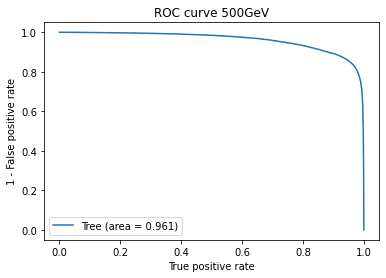

600GeV


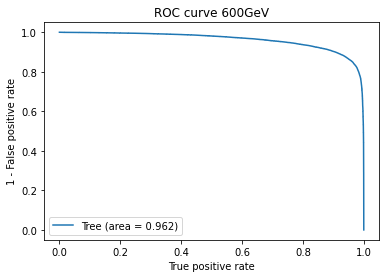

700GeV


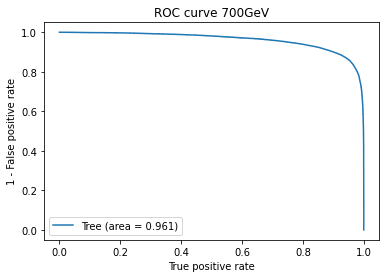

800GeV


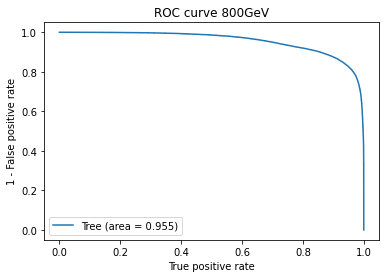

1000GeV


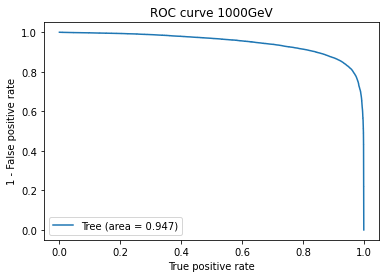

In [58]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve '+mass_points[a])
    plt.legend(loc='best')
    plt.show()

<ipython-input-59-527852927415>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


500GeV


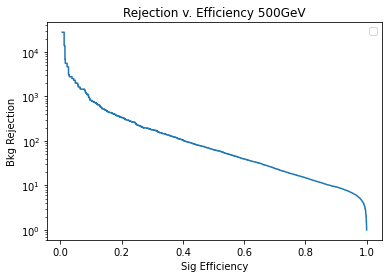

<ipython-input-59-527852927415>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


600GeV


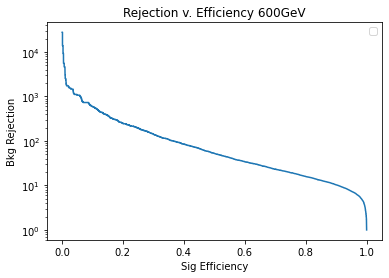

<ipython-input-59-527852927415>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


700GeV


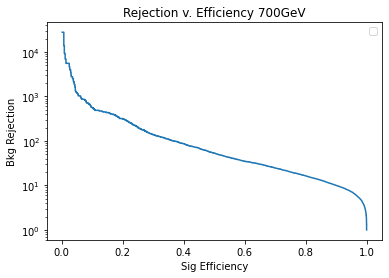

<ipython-input-59-527852927415>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


800GeV


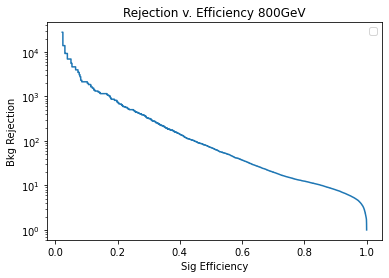

<ipython-input-59-527852927415>:8: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
No handles with labels found to put in legend.


1000GeV


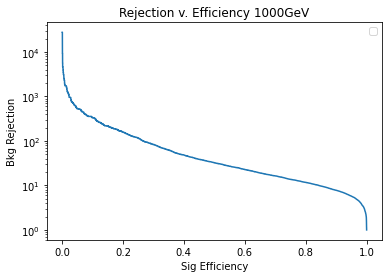

In [59]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency '+mass_points[a])
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [60]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

ROC curve


mass_{H+}      area
0    500GeV  0.960766
1    600GeV  0.961684
2    700GeV  0.961449
3    800GeV  0.955433
4   1000GeV  0.947253

In [61]:
print ('rejection vs efficiency')
area_table_rve = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model_rve})
area_table_rve

rejection vs efficiency


mass_{H+}                area
0    500GeV   auc_model_rve_500
1    600GeV   auc_model_rve_600
2    700GeV   auc_model_rve_700
3    800GeV   auc_model_rve_800
4   1000GeV  auc_model_rve_1000

In [62]:
#end of model

In [63]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [ ]:
test_array

In [ ]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_y_test

In [ ]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

In [ ]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
#end test predict for 50:50 test:train

In [ ]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [ ]:
y_test

In [ ]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

In [ ]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [ ]:
tree_2.fit(x_train,y_train)

In [ ]:
tree_2.score(x_test,y_test)

In [ ]:
#End of DT - Begin new model1 

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

In [ ]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

In [ ]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

In [ ]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

In [ ]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

In [ ]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

In [ ]:
y_test

In [ ]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)

auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()